#**Evidencia 2: Analisis de aprendizaje automatico**

Iker Villalobos Gilling                   | A01710453

Juan Carlos Cárcamo Alarcón       | A01710253

José David Castillo Jasso              | A01710953

Ana Isabel García Mojica             | A01706241


##**Sección 1:  Contexto del problema de transporte y objetivos de modelación.**

* **Contexto:**


Actualmente, la administración de la cadena de suministro ha cambiado de ser una disciplina meramente operativa a convertirse en una compleja ciencia de datos. La inmediatez requerida y la volatilidad del mercado obligan a las empresas a dejar atrás los modelos convencionales.  En el ámbito logístico contemporáneo, la incertidumbre no es un fenómeno excepcional, sino una constante estructural.  Este informe de investigación documenta la intervención analítica llevada a cabo sobre las operaciones de Bepensa, una entidad que está en un momento estratégico decisivo: el requerimiento de pasar de una administración fundamentada en la intuición y los promedios aritméticos a una estructura de Planificación Jerárquica de Demanda.

La investigación se sitúa, en términos metodológicos, dentro del estándar CRISP-DM (Cross-Industry Standard Process for Data Mining), el cual es considerado un marco de referencia mundial para la minería de datos y los proyectos de ciencia de datos que se aplican. Este protocolo asegura que el análisis no sea una actividad académica aislada, sino más bien un proceso cíclico que empieza y concluye con las metas comerciales.  La fase inicial de CRISP-DM 3, "Comprensión del negocio" (Business Understanding), ha demostrado que el problema de Bepensa no radica en la escasez de activos, sino en una deficiente implementación como consecuencia de una interpretación errónea del carácter estocástico de la demanda.

El modelo descrito en esta Evidencia se desarrolla con el fin de tratar el problema logístico de gestión de rutas, disminución de costos y mejora en la previsibilidad de la demanda dentro del entorno operativo de Bepensa, que enfrenta desafíos relacionados con la planificación, distribución de recursos y fluctuaciones en la demanda. Todo esto tiene una relación directa con la red nomológica realizada anteriormente, en donde basándonos en el Constructo 1 (Rentabilidad operacional), se examina el costo por kilómetro (CPK) como indicador principal, dividiendo entre los costos directos (mantenimiento, combustible, peajes) y los costos indirectos (nómina, seguros, depreciación).  El modelo se basa en la suposición de que el problema más importante no es reducir los costos directos, sino disminuir las distancias recorridas en vacío para aumentar la absorción de los costos fijos.
Por otro lado, en el Constructo 2 (Eficiencia de Activos), nuestro modelo dicta que: el empleo de flota disminuye el costo por unidad; sin embargo, un sistema sobresaturado incrementa la posibilidad de fallos en el servicio.  En cambio, el tiempo de inactividad supone un gasto financiero explícito, que se calcula en aprox. $3,941.96 MXN diarios por cada unidad detenida.
Además, en cuanto al Constructo 3 (Demanda y Predictibilidad), la variable externa más importante es la demanda.  De acuerdo con la planificación jerárquica: La demanda es constante en términos regionales (decisiones estratégicas). En términos de ruta, la volatilidad es media (asignación táctica). En el nivel del cliente, hay una gran volatilidad y datos inflados en ceros (en la ejecución diaria).

El modelo concluye que planificar de abajo hacia arriba a nivel del cliente aumenta el error y el uso innecesario de flota, en contraste con la agregación por niveles, que disminuye la incertidumbre.


* **Definición del problema:**

Bepensa enfrenta un conjunto de ineficiencias derivadas de la falta de segmentación:

*Fragilidad Estructural:* Se han identificado rutas de alto volumen ("Cluster 2") que dependen en un 100% de un solo cliente, eliminando cualquier efecto de diversificación de riesgo.


*Costo de Ociosidad Masivo:* La estrategia actual de mantener un Nivel de Servicio (OTIF) del 98% mediante un exceso de capacidad generalizado genera un costo mensual proyectado de aproximadamente $34.8 millones de MXN.

*Falla de Pronóstico:* El error cuadrático medio (RMSE) se duplica al usar modelos desagregados versus modelos agregados por ruta, lo que indica que la granularidad excesiva podría dañar la precisión.


El objetivo de esta evidencia es operacionalizar la Planificación Jerárquica, desarrollando modelos que permitan segmentar la flota en dos estrategias: una Flota Estática para rutas críticas y estables, y un Pool Dinámico para rutas esporádicas, gestionando así la ecuación de valor entre el costo de servir y el nivel de servicio.


##**Sección 2: Preprocesamiento de datos (limpieza, feature engineering).**

El primer paso antes de realizar cualquier análisis prescriptivo es asegurar una integridad de datos sólida y fiable. Siguiendo la fase de "Comprensión de los Datos" y "Preparación de los Datos" del marco CRISP-DM, se ejecutó un proceso riguroso de auditoría, limpieza (Data Cleaning) e ingeniería de características (Feature Engineering). Se integraron cuatro fuentes de datos dispares: Telemetría (física), Peajes (infraestructura), Viajes (comercial) y Combustible (energía).

####**Auditoría técnica y limpieza de datos:**

### Telemetría

El dataset de telemetría, compuesto por 7,601 registros, actúa como la fuente de información sobre el movimiento físico.

In [ ]:
import pandas as pd

In [ ]:
telemetria= pd.read_excel("/content/Telemetría.xlsx", sheet_name = "Report")

In [ ]:
#info
telemetria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7601 entries, 0 to 7600
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype          
---  ------                              --------------  -----          
 0   Nombre                              7601 non-null   object         
 1   Periodo                             7601 non-null   int64          
 2   Fecha de inicio del periodo         7601 non-null   datetime64[ns] 
 3   Fecha de fin del periodo            7601 non-null   datetime64[ns] 
 4   Duración de conducción              7601 non-null   timedelta64[ns]
 5   Porcentaje de tiempo en conducción  7601 non-null   int64          
 6   Distancia                           7601 non-null   float64        
 7   Tiempo en ralentí                   7601 non-null   timedelta64[ns]
 8   Porcentaje de tiempo en ralentí     7601 non-null   int64          
 9   Velocidad máxima                    7601 non-null   int64          
dtypes: datetime6

In [ ]:
#cardinalidad
telemetria.nunique()

,0
Nombre,376
Periodo,20
Fecha de inicio del periodo,20
Fecha de fin del periodo,20
Duración de conducción,5397
Porcentaje de tiempo en conducción,50
Distancia,5393
Tiempo en ralentí,5338
Porcentaje de tiempo en ralentí,101
Velocidad máxima,101


In [ ]:
#nulos:
telemetria.isnull().sum()

,0
Nombre,0
Periodo,0
Fecha de inicio del periodo,0
Fecha de fin del periodo,0
Duración de conducción,0
Porcentaje de tiempo en conducción,0
Distancia,0
Tiempo en ralentí,0
Porcentaje de tiempo en ralentí,0
Velocidad máxima,0


El análisis de la telemetría muestra un conjunto de datos limpio. La consulta de valores nulos
arroja un resultado de cero para todas las columnas. Esto puede implicar que el dataset crudo
(donde la pérdida de datos es común debido a fallos) ya pasó por un proceso ETL (Extract,
Transform, Load) previo, donde los datos faltantes fueron imputados o las filas incompletas
eliminadas. Esto simplifica el análisis pero introduce el riesgo de sesgo: no estamos viendo los
momentos en que la flota estuvo "invisible".

In [ ]:
#duplicados
telemetria.duplicated().sum()

np.int64(9)

Se detectaron solo 9 registros duplicados en el dataframe. Aunque 9 registros representan una fracción baja (<0.13%),
su eliminación es necesaria para evitar la inflación artificial de métricas acumulativas como la
distancia total.

In [ ]:
#borrar duplicados
telemetria = telemetria.drop_duplicates()

In [ ]:
#describe
telemetria.describe(include='all')

,Nombre,Periodo,Fecha de inicio del periodo,Fecha de fin del periodo,Duración de conducción,Porcentaje de tiempo en conducción,Distancia,Tiempo en ralentí,Porcentaje de tiempo en ralentí,Velocidad máxima
count,7592,7592.000000,7592,7592,7592,7592.000000,7592.000000,7592,7592.000000,7592.000000
unique,376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,T520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,10.514752,2024-10-16 10:47:32.687038976,2024-11-15 21:35:15.754478080,4 days 21:12:30.990091148,16.035827,5535.133135,2 days 14:12:24.246575342,23.469968,77.526475
min,NaN,1.000000,2024-01-01 00:00:00,2024-01-31 23:59:59,0 days 00:00:00,0.000000,0.000000,0 days 00:00:00,0.000000,0.000000
25%,NaN,6.000000,2024-06-01 00:00:00,2024-06-30 23:59:59,0 days 00:00:00,0.000000,0.000000,0 days 00:00:00,0.000000,0.000000
50%,NaN,11.000000,2024-11-01 00:00:00,2024-11-30 23:59:59,5 days 13:07:58.412000,18.000000,5115.044922,1 days 13:23:47,22.000000,101.000000
75%,NaN,16.000000,2025-04-01 00:00:00,2025-04-30 23:59:59,8 days 12:25:37.556750,28.000000,10130.762939,4 days 00:30:23.750000,37.000000,120.000000
max,NaN,20.000000,2025-08-01 00:00:00,2025-08-31 23:59:59,16 days 07:15:29.794000,53.000000,19733.138672,23 days 22:12:31,100.000000,253.000000


Validación Temporal: Se verificó la consistencia de las columnas Fecha de inicio y Fecha de fin para asegurar que la duración calculada (Duración de conducción) fuera coherente con la física. Esto es crucial para calcular la velocidad comercial real.

In [ ]:
#outliers con iqr en Duración de conducción

# Q1 y Q3
Q1 = telemetria['Duración de conducción'].quantile(0.25)
Q3 = telemetria['Duración de conducción'].quantile(0.75)
IQR = Q3 - Q1

# Límites teóricos
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_encontrados = telemetria[
    (telemetria['Duración de conducción'] < lim_inf) |
    (telemetria['Duración de conducción'] > lim_sup)
]
outliers_encontrados

,Nombre,Periodo,Fecha de inicio del periodo,Fecha de fin del periodo,Duración de conducción,Porcentaje de tiempo en conducción,Distancia,Tiempo en ralentí,Porcentaje de tiempo en ralentí,Velocidad máxima


In [ ]:
#outliers con iqr en Tiempo en ralentí

# Q1 y Q3
Q1 = telemetria['Tiempo en ralentí'].quantile(0.25)
Q3 = telemetria['Tiempo en ralentí'].quantile(0.75)
IQR = Q3 - Q1

# Límites teóricos
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_encontrados = telemetria[
    (telemetria['Tiempo en ralentí'] < lim_inf) |
    (telemetria['Tiempo en ralentí'] > lim_sup)
]
outliers_encontrados

,Nombre,Periodo,Fecha de inicio del periodo,Fecha de fin del periodo,Duración de conducción,Porcentaje de tiempo en conducción,Distancia,Tiempo en ralentí,Porcentaje de tiempo en ralentí,Velocidad máxima
102,T488,1,2024-01-01,2024-01-31 23:59:59,4 days 15:06:59.027000,15,3009.120605,12 days 11:08:49,73,96
211,T610,1,2024-01-01,2024-01-31 23:59:59,8 days 12:12:58.776000,27,10129.125977,17 days 15:31:49,67,109
217,T616,1,2024-01-01,2024-01-31 23:59:59,10 days 08:19:00.084000,33,11146.400391,11 days 02:17:34,52,103
257,T658,1,2024-01-01,2024-01-31 23:59:59,9 days 18:20:55.053000,31,9672.345703,10 days 15:12:36,52,111
286,T689,1,2024-01-01,2024-01-31 23:59:59,12 days 09:01:51.169000,40,13821.046875,10 days 19:09:45,47,98
...,...,...,...,...,...,...,...,...,...,...
7553,T753,20,2025-08-01,2025-08-31 23:59:59,10 days 07:19:56.106000,33,11758.248047,12 days 02:22:21,54,98
7580,T781,20,2025-08-01,2025-08-31 23:59:59,8 days 23:46:53.047000,29,10132.000000,12 days 11:38:32,58,90
7581,T782,20,2025-08-01,2025-08-31 23:59:59,7 days 05:15:27.913000,23,8583.873047,10 days 11:07:52,59,118
7596,T804,20,2025-08-01,2025-08-31 23:59:59,10 days 17:31:37.094000,35,10557.172852,12 days 22:05:07,55,103


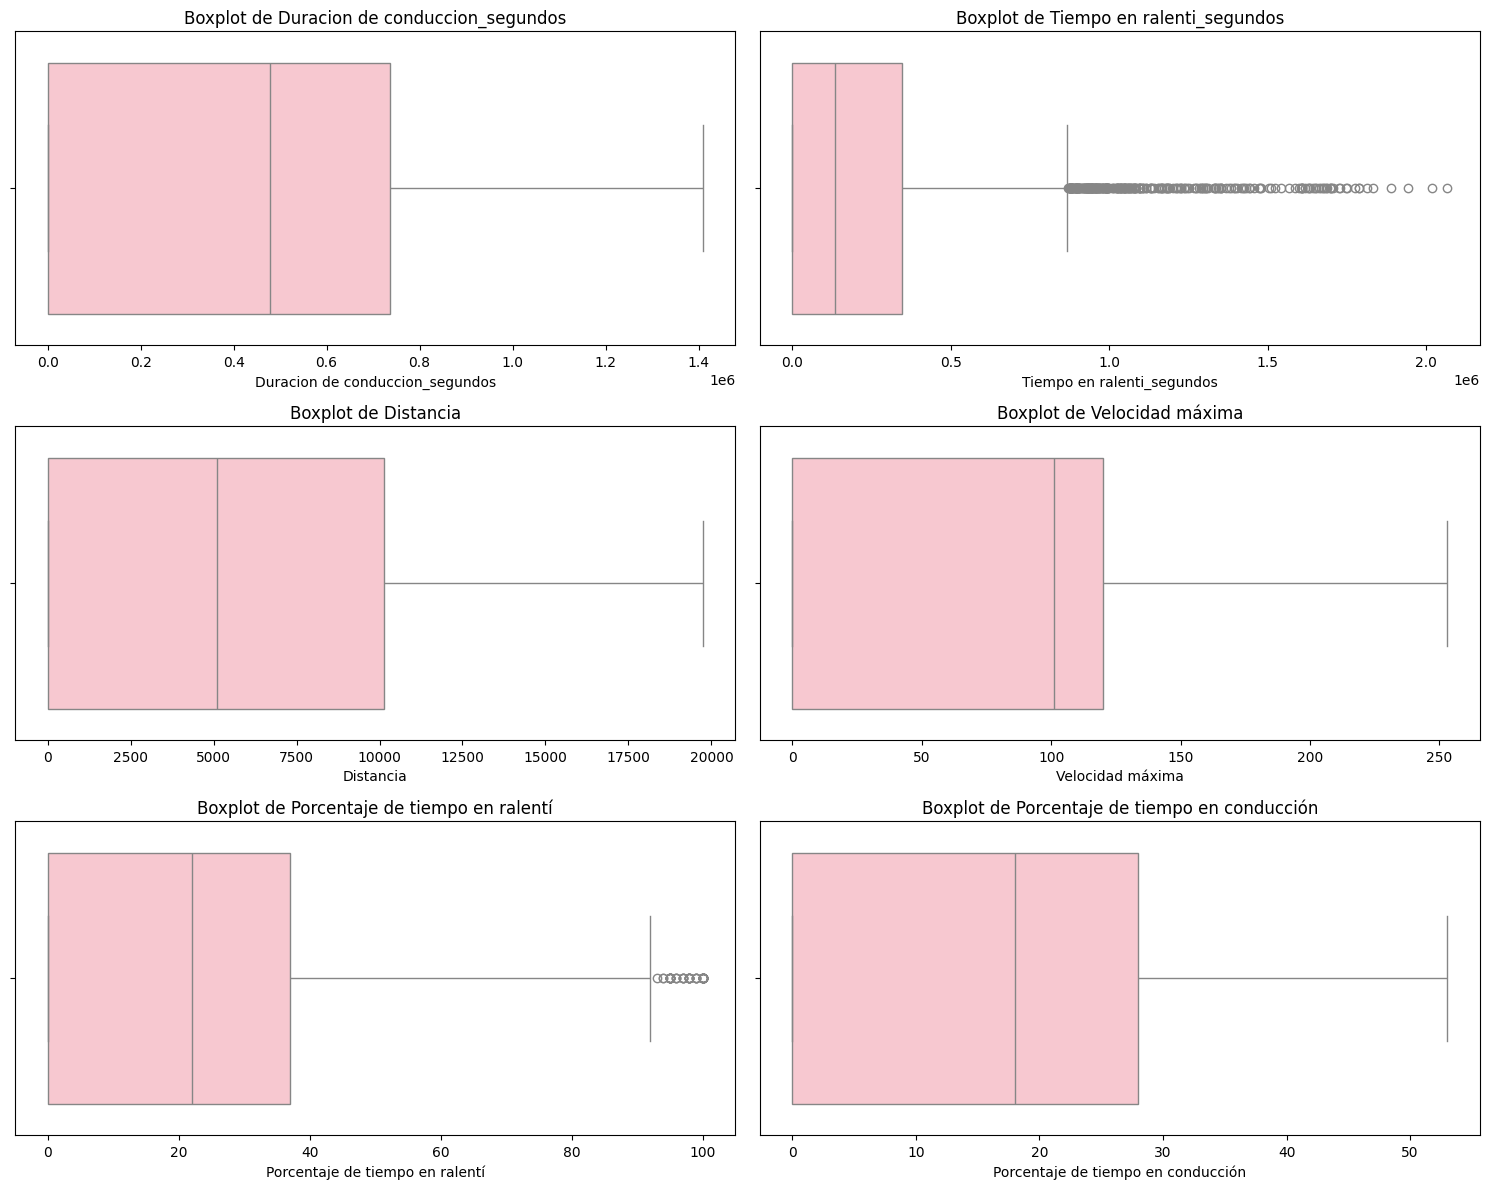

In [ ]:
#boxplots

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Corrected list of columns to plot
cols_to_plot = [
    'Distancia',
    'Velocidad máxima',
    'Porcentaje de tiempo en ralentí',
    'Porcentaje de tiempo en conducción'
]

# Convert timedelta columns to seconds and add them to the list for plotting
telemetria['Duracion de conduccion_segundos'] = telemetria['Duración de conducción'].dt.total_seconds()
telemetria['Tiempo en ralenti_segundos'] = telemetria['Tiempo en ralentí'].dt.total_seconds()
cols_to_plot.insert(0, 'Tiempo en ralenti_segundos')
cols_to_plot.insert(0, 'Duracion de conduccion_segundos')

plt.figure(figsize=(15, 12))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=telemetria[col], color='pink')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# You can drop the temporary _segundos columns if not needed for further analysis
telemetria = telemetria.drop(columns=['Duracion de conduccion_segundos', 'Tiempo en ralenti_segundos'])

El análisis de diagramas de caja (Boxplots) permite identificar comportamientos anómalos.

-Duración de conducción: La mayoría de los trayectos tienen duraciones relativamente
cortas. Existen viajes extraordinariamente largos que se presentan como extremos
operativos, probablemente rutas especiales, errores de registro o vehículos que
permanecieron en "conducción" por un sensor que no se desactivó. La amplitud entre Q1 y
Q3 indica una alta variabilidad en la duración de los trayectos.

-Tiempo de ralentí: El boxplot muestra que el 75% de los viajes tiene tiempos de ralentí
relativamente bajos. Sin embargo, hay una cola extremadamente larga con muchos puntos
fuera del rango esperado, algunos incluso por encima de 2,000,000 segundos (23 días).
Esto sugiere que puede haber sensores que registran el ralentí incluso cuando el vehículo
no está realmente al ralentí, o vehículos encendidos durante largas jornadas sin
desplazamiento (pueden reflejar ineficiencia, malos hábitos, o errores técnicos).

-Velocidad Máxima: Se espera una distribución con un límite superior rígido (techo)
debido a los gobernadores de velocidad (típicamente a 95 km/h o 110 km/h en México).
Cualquier valor atípico por encima de este límite representa una violación de seguridad.

-Distancia recorrida: La mayor parte de los viajes ocurren entre 0 y 10,000 km (75%).
Además, se observa una cola larga que sugiere rutas demasiado largas. No hay tantos
outliers puntuales como en ralentí, lo que indica que la distancia está más controlada.

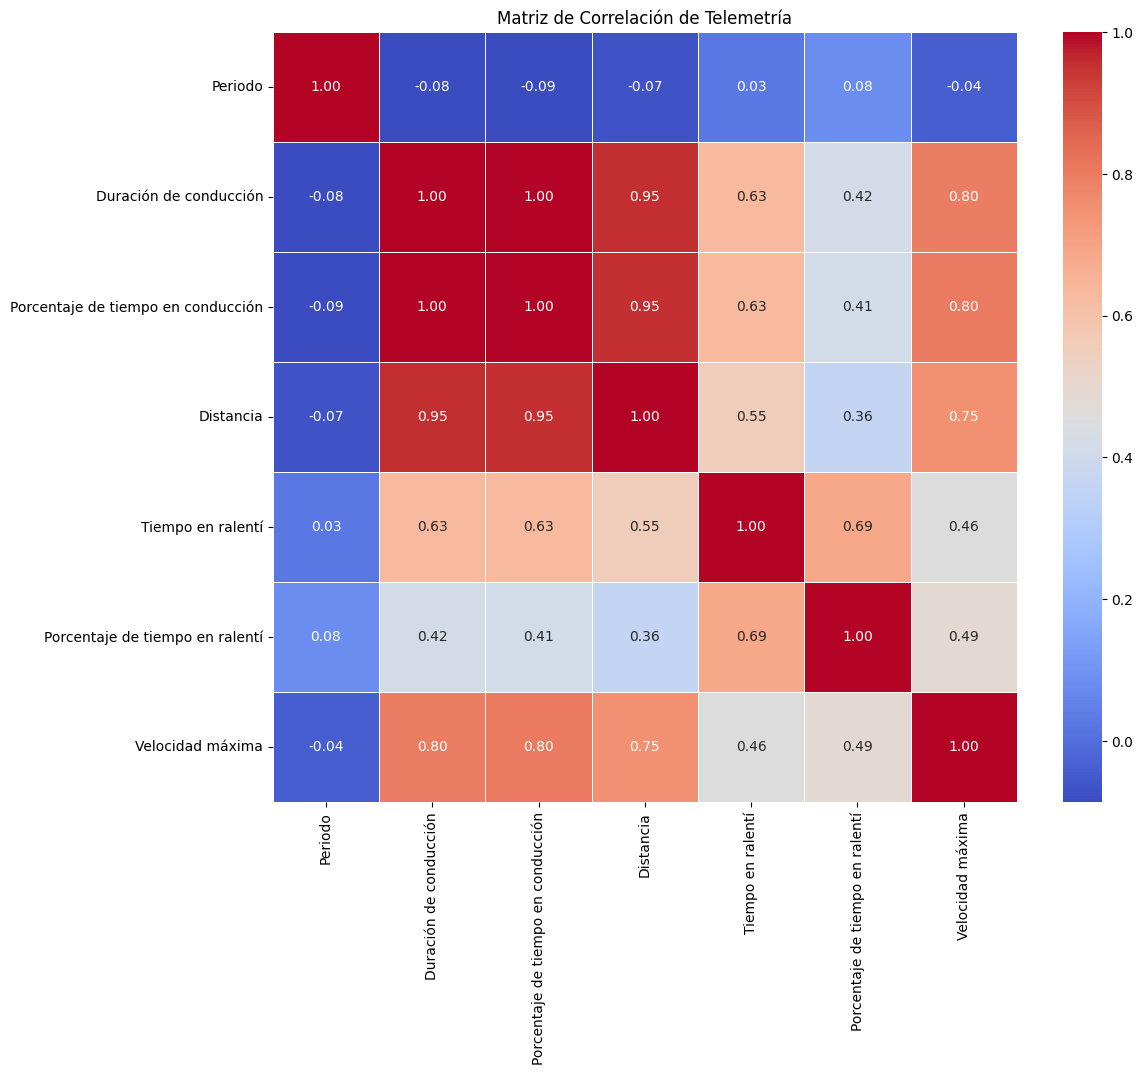

In [ ]:
#matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

# Create a copy of the dataframe to avoid modifying the original for temporary columns
telemetria_corr = telemetria.copy()

# Convert timedelta columns to seconds for correlation calculation
telemetria_corr['Duración de conducción'] = telemetria_corr['Duración de conducción'].dt.total_seconds()
telemetria_corr['Tiempo en ralentí'] = telemetria_corr['Tiempo en ralentí'].dt.total_seconds()

# Select only numerical columns for the correlation matrix
numerical_cols = telemetria_corr.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
correlation_matrix = telemetria_corr[numerical_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Telemetría')
plt.show()

La matriz de correlación revela la estructura lógica de la operación.

--> Duración - Porcentaje de tiempo en conducción (r = 1.00): La correlación perfecta
indica que el porcentaje de tiempo en conducción es una transformación de la duración.
Es decir, que ambas variables contienen la misma información operativa. Su
interdependencia implica que solo una debe utilizarse en modelos analíticos para evitar
multicolinealidad.

--> Distancia - Duración (r = 0.95): La correlación de Pearson de 0.95 entre Distancia y
Duración de conducción tienen sentido. Sin embargo, el 5% de varianza no explicada es
causada por la variabilidad en la velocidad media, influenciada por el tráfico, la
topografía y la carga.

--> Velocidad máxima – Duración (r = 0.80): Esta alta correlación sugiere que los viajes
más largos exponen al operador a tramos donde se alcanzan velocidades más altas. Sin
embargo, la velocidad máxima no se mantiene constante debido a otras variables como el
comportamiento del conductor o restricciones de seguridad.

--> Velocidad máxima – Distancia (r = 0.75): La correlación fuerte indica que quienes
recorren mayores distancias tienden a alcanzar velocidades más elevadas. Esto es
coherente con rutas de larga distancia donde existe menor interrupción y el vehículo
puede mantener velocidades más altas durante intervalos prolongados.

--> Ralentí - Duración: Existe una correlación positiva moderada (r = 0.63) entre la
duración del viaje y el tiempo en ralentí. Esto es consistente con la logística de larga
distancia: viajes más largos implican más paradas obligatorias, semáforos y colas de
peaje. Sin embargo, aquellos conductores que logran altas distancias con bajo incremento
de ralentí representan el estándar de eficiencia a replicar.

--> Velocidad máxima – Porcentaje de tiempo en ralentí (r = 0.49): Aunque la correlación
es moderada, sugiere que quienes pasan más tiempo en ralentí tienden a no alcanzar
velocidades altas, probablemente debido a operación en zonas urbanas, tráfico denso o
rutas con detenciones frecuentes.



---



### Peajes

In [ ]:
import pandas as pd
peajes = pd.read_csv("/content/Peajes.csv")

In [ ]:
#info
peajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187036 entries, 0 to 187035
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Tag               187036 non-null  object
 1   No.Economico      187036 non-null  object
 2   Fecha             187036 non-null  object
 3   Hora              187036 non-null  object
 4   Caseta            187036 non-null  object
 5   Carril            187036 non-null  object
 6   Clase             187036 non-null  int64 
 7   Importe           187036 non-null  object
 8   Fecha Aplicacion  181245 non-null  object
 9   Hora Aplicacion   181245 non-null  object
 10  Consecar          187036 non-null  object
dtypes: int64(1), object(10)
memory usage: 15.7+ MB


In [ ]:
#convertir Fecha Aplicacion y Fecha a datetime
peajes['Fecha Aplicacion'] = pd.to_datetime(peajes['Fecha Aplicacion'], dayfirst=True)
peajes['Fecha'] = pd.to_datetime(peajes['Fecha'], dayfirst=True)

In [ ]:
# Rellena con ':00' si la longitud del texto es corta (ej. "02:17" tiene 5 caracteres)
peajes['Hora'] = peajes['Hora'].apply(lambda x: str(x) + ':00' if len(str(x)) == 5 else x)

peajes['Hora'] = pd.to_datetime(peajes['Hora'], format='%H:%M:%S')


In [ ]:
peajes['Hora Aplicacion'] = peajes['Hora Aplicacion'].apply(lambda x: str(x) + ':00' if len(str(x)) == 5 else x)

peajes['Hora Aplicacion'] = pd.to_datetime(peajes['Hora Aplicacion'], format='%H:%M:%S')


In [ ]:
#convertir Importe a numérico

peajes['Importe'] = peajes['Importe'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
peajes['Importe'] = pd.to_numeric(peajes['Importe'], errors='coerce')

In [ ]:
#cardinalidad
peajes.nunique()

,0
Tag,403
No.Economico,377
Fecha,262
Hora,75397
Caseta,267
Carril,1496
Clase,10
Importe,665
Fecha Aplicacion,25
Hora Aplicacion,1


El hallazgo más crítico en la fase de inspección proviene de la comparación de cardinalidad:
- Tags: 403
- Unidades Económicas (Unidades): 377

Existe un excedente de 26 Tags activos en comparación con los vehículos registrados. Esto
constituye una brecha con implicaciones a analizar ya que se puede tratar de dispositivos que
están generando costos pero que no están asignados oficialmente a una unidad activa en este
periodo. Por otro lado, puede indicar que los tags están siendo rotados entre vehículos
(swapping) sin actualizar el sistema de registro.

In [ ]:
#Se elimina la columna de Consecar ya que no tiene datos relevantes
peajes = peajes.drop(columns=['Consecar'])

In [ ]:
#nulos
peajes.isnull().sum()

,0
Tag,0
No.Economico,0
Fecha,0
Hora,0
Caseta,0
Carril,0
Clase,0
Importe,0
Fecha Aplicacion,5791
Hora Aplicacion,5791


Se identificaron 5,791 valores nulos en las columnas Fecha Aplicacion y Hora Aplicacion. Sin
embargo, las columnas Fecha y Hora (del cruce real) están completas. Generalmente, este
atributo se refiere al momento en que la institución bancaria procesa el cobro. Los nulos aquí
indican transacciones en tránsito bancario. Para fines de análisis operativo (¿cuándo pasó el
camión?), las columnas principales son suficientes, por lo que estos nulos no invalidan el
estudio.

In [ ]:
#duplicados
peajes.duplicated().sum()

np.int64(0)

In [ ]:
#describe
peajes.describe(include='all')

,Tag,No.Economico,Fecha,Hora,Caseta,Carril,Clase,Importe,Fecha Aplicacion,Hora Aplicacion
count,187036,187036,187036,187036,187036,187036,187036.000000,187036.000000,181245,181245
unique,403,377,NaN,NaN,267,1496,NaN,NaN,NaN,NaN
top,IMDM27327806..,T677,NaN,NaN,CTO EXT MEXIQUENSE,T4 CHALCO,NaN,NaN,NaN,NaN
freq,1904,1904,NaN,NaN,37724,7141,NaN,NaN,NaN,NaN
mean,NaN,NaN,2025-05-09 16:04:16.532431872,1900-01-01 12:51:50.383065344,NaN,NaN,5.152463,458.036681,2025-05-13 09:41:45.132831488,1900-01-01 11:59:59.999999744
min,NaN,NaN,2025-01-01 00:00:00,1900-01-01 00:00:00,NaN,NaN,1.000000,0.000000,2025-01-14 00:00:00,1900-01-01 12:00:00
25%,NaN,NaN,2025-03-04 00:00:00,1900-01-01 07:53:48,NaN,NaN,1.000000,190.000000,2025-03-13 00:00:00,1900-01-01 12:00:00
50%,NaN,NaN,2025-05-09 00:00:00,1900-01-01 13:09:20.500000,NaN,NaN,5.000000,312.000000,2025-05-13 00:00:00,1900-01-01 12:00:00
75%,NaN,NaN,2025-07-14 00:00:00,1900-01-01 18:16:04,NaN,NaN,9.000000,539.000000,2025-07-14 00:00:00,1900-01-01 12:00:00
max,NaN,NaN,2025-09-19 00:00:00,1900-01-01 23:59:59,NaN,NaN,10.000000,2614.000000,2025-09-12 00:00:00,1900-01-01 12:00:00


Importe:


Gasto Promedio: $458.04 por cruce.

Volatilidad (Std): $468.01.

La desviación estándar es mayor que el promedio. Esto es altamente volátil. Significa que hay muchos peajes baratos y unos pocos extremadamente caros que jalan el promedio hacia arriba.

Fecha:

Los datos van del 01 de Enero de 2025 al 19 de Septiembre de 2025.

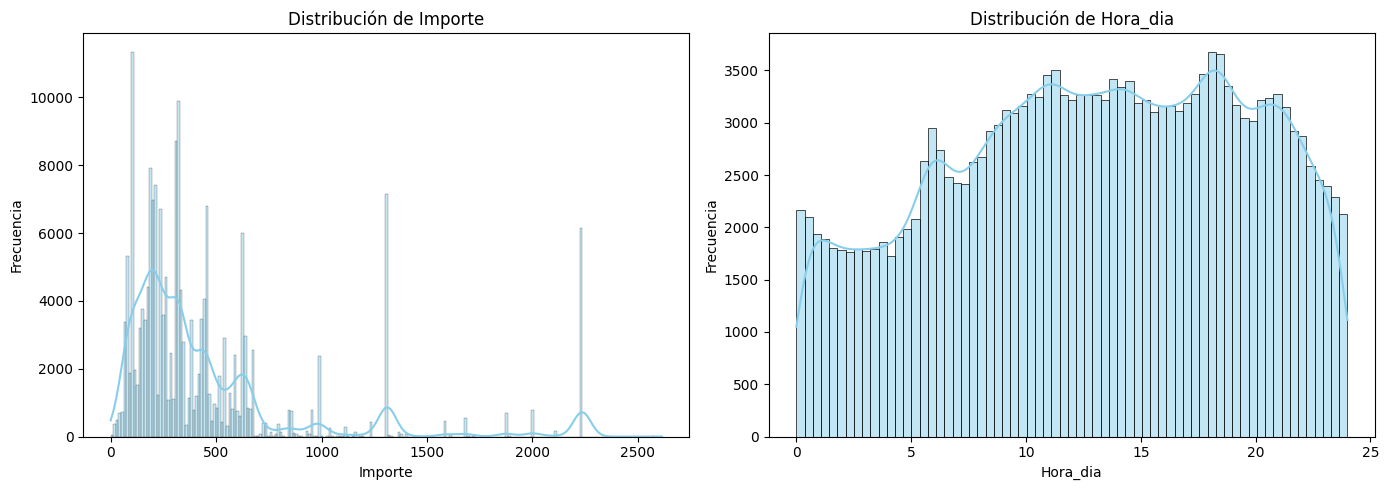

In [ ]:
#histogramas para columnas de tiempo y Importe
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create temporary numerical representation for 'Hora' (hour of the day)
# These columns are already datetime64[ns] with a dummy date, so .dt accessor works.
peajes['Hora_dia'] = peajes['Hora'].dt.hour + peajes['Hora'].dt.minute/60 + peajes['Hora'].dt.second/3600


cols_to_hist = ['Importe', 'Hora_dia']

num_plots = len(cols_to_hist)
n_cols = 2
n_rows = (num_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(7 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_to_hist):
    sns.histplot(peajes[col].dropna(), kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

peajes = peajes.drop(columns=['Hora_dia'])

Histograma de Importe:

El histograma de Importe no sigue una distribución normal, sino que es multimodal,
presentando múltiples picos.

-Moda 1: Hay una alta densidad de transacciones por debajo de $200 MXN. Esto
representa la operación de "última milla" y tramos locales.

-Moda 2: Transacciones en el rango medio ($200 - $600 MXN). La gran densidad a la
izquierda indica que la operación principal de Bepensa consiste en tramos cortos o
medianos.

-Moda 3: Picos distintivos alrededor de $1,300 y $2,200 MXN. Estos valores corresponden
a tarifas de autopistas de alta especificación para vehículos pesados.


Este comportamiento multimodal implica que el uso de un "Costo Promedio de Peaje" ($458
MXN) sería un error metodológico. Mezclar peajes urbanos de $50 pesos con cruces de Arco
Norte de $1,000 pesos resulta en una media que no representa ninguna realidad operativa .Se
deben segmentar los pronósticos en "Rutas Cortas" vs "Rutas Largas", porque el comportamiento
de costo es totalmente diferente.

Histograma de Hora:

La actividad cae, pero nunca llega a cero. La flota de Bepensa nunca está completamente inactiva, pero su actividad mínima es entre las 3 y 4 de la mañana.

Arranque Operativo (05:00 - 07:00):

Hay una subida agresiva. A las 5 AM empieza el despacho fuerte de rutas.

Alta Demanda (10:00 - 19:00):

La operación se mantiene constante y pesada casi todo el día.

Aumento (18:00 / 6 PM): el punto más alto de todo el día parece ser alrededor de las 6 PM.

In [ ]:
#outliers con iqr en Importe

# Q1 y Q3
Q1 = peajes['Importe'].quantile(0.25)
Q3 = peajes['Importe'].quantile(0.75)
IQR = Q3 - Q1

# Límites teóricos
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_encontrados = peajes[
    (peajes['Importe'] < lim_inf) |
    (peajes['Importe'] > lim_sup)
]
outliers_encontrados

,Tag,No.Economico,Fecha,Hora,Caseta,Carril,Clase,Importe,Fecha Aplicacion,Hora Aplicacion
5,IMDM27305795..,T557,2025-09-19,1900-01-01 09:02:06,SAN MARTIN TEXMELUCA,MARTIN TEXMELUCAN 2,9,2002.0,NaT,NaT
6,IMDM30009223..,T766,2025-09-19,1900-01-01 08:58:46,SAN MARTIN TEXMELUCA,MARTIN TEXMELUCAN 9,9,2002.0,NaT,NaT
7,IMDM27327837..,T717,2025-09-19,1900-01-01 08:58:13,SAN MARTIN TEXMELUCA,MARTIN TEXMELUCAN 9,9,2002.0,NaT,NaT
10,IMDM24473752..,T570,2025-09-19,1900-01-01 08:42:34,CHICHEN ITZA,VALLADOLID-KANTUNIL,9,1312.0,NaT,NaT
11,IMDM27173411..,T610,2025-09-19,1900-01-01 08:41:45,TINTAL,PLAYA-CANCUN,9,2236.0,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...
187004,IMDM24328568..,T510,2025-01-01,1900-01-01 04:49:00,CHICHEN ITZA,KANTUNIL-VALLADOLID,9,1239.0,2025-01-14,1900-01-01 12:00:00
187010,IMDM27305781..,T685,2025-01-01,1900-01-01 03:47:35,CHICHEN ITZA,VALLADOLID-KANTUNIL,9,1239.0,2025-01-14,1900-01-01 12:00:00
187011,IMDM24473752..,T570,2025-01-01,1900-01-01 03:40:54,CHICHEN ITZA,KANTUNIL-VALLADOLID,9,1239.0,2025-01-14,1900-01-01 12:00:00
187021,IMDM27408961..,T497,2025-01-01,1900-01-01 02:00:51,ACAPONETA,ACAPONETA 1,9,1500.0,2025-01-14,1900-01-01 12:00:00



Al aplicar el método del Rango Intercuartílico (IQR) a los peajes se estableció un límite superior de 1,062.50 MXN para considerar un valor como "normal". El análisis identificó 17,444
transacciones por encima de este límite. En estadística clásica, esto indicaría datos "sucios". Sin
embargo, en el contexto logístico, un peaje de $1,200 pesos no es un error, es el precio de
mercado para un tráiler en una autopista con características diferentes. Es decir, estos 17,000
registros no son anomalías a eliminar; son un Segmento de Negocio distinto. Representan la
operación de larga distancia en infraestructura de alta velocidad.



---



###Viajes

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
listado_viajes = pd.read_excel("/content/BEPENSA.xlsx", sheet_name= "Reporte Listado Viajes Ene-Oc")

In [ ]:
listado_viajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108991 entries, 0 to 108990
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Numero             108991 non-null  int64         
 1   Nombre Cliente     108991 non-null  object        
 2   Folio              108991 non-null  int64         
 3   Ruta               108991 non-null  object        
 4   Viaje              108991 non-null  object        
 5   Viaje Docto        108991 non-null  object        
 6   Sucursal           108991 non-null  object        
 7   No. Viaje Cte      108991 non-null  object        
 8   Fecha...9          108990 non-null  datetime64[ns]
 9   Moneda             108991 non-null  object        
 10  SubTotal           108991 non-null  float64       
 11  IVA                108991 non-null  float64       
 12  Retención          108991 non-null  float64       
 13  Total              108991 non-null  float64 

Se observan algunas variables de Fecha en formato tipo Object, es necesario transformarlas a formato de tiempo:

In [ ]:
listado_viajes['Fecha Vencimiento'] = pd.to_datetime(listado_viajes['Fecha Vencimiento'], errors='coerce')
listado_viajes['Fecha Salida'] = pd.to_datetime(listado_viajes['Fecha Salida'], errors='coerce')
listado_viajes['Fecha Llegada'] = pd.to_datetime(listado_viajes['Fecha Llegada'], errors='coerce')

In [ ]:
listado_viajes.describe()

,Numero,Folio,Fecha...9,SubTotal,IVA,Retención,Total,Liquidación,Fecha...17,Fecha Vencimiento,Nro Ope,Fecha Salida,Fecha Llegada,Peso Kgs,Peso Descarga Kgs,Diferencia,Documentos,UUID CP
count,108991.000000,108991.000000,108990,108991.000000,108991.000000,108991.000000,108991.000000,7.299800e+04,105298,105297,108094.000000,82861,82822,7.864700e+04,8.765000e+03,6.996800e+04,0.0,0.0
mean,740.513694,591.793111,2025-05-22 23:54:11.990091008,4861.489184,777.838327,194.459508,5444.867467,1.270736e+07,2025-05-25 09:26:57.466618880,2025-06-20 01:16:25.156272128,42697.065665,2025-05-27 19:25:57.327331328,2025-05-29 09:13:14.827219712,1.424247e+05,1.175545e+05,1.453652e+05,NaN,NaN
min,1.000000,1.000000,2025-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,1.000000e+00,2025-01-01 00:00:00,2025-01-22 00:00:00,1022.000000,1935-03-15 04:02:00,2024-11-30 12:23:00,1.000000e+00,1.000000e+00,-2.946000e+06,NaN,NaN
25%,1.000000,211.000000,2025-03-10 00:00:00,41.010000,6.560000,1.640000,45.930000,5.854000e+03,2025-03-12 00:00:00,2025-04-08 00:00:00,4793.000000,2025-03-27 06:33:00,2025-03-27 13:45:00,2.500000e+04,2.700000e+04,2.500000e+04,NaN,NaN
50%,1322.000000,506.000000,2025-05-20 00:00:00,2314.000000,370.240000,92.560000,2591.680000,9.890000e+03,2025-05-22 00:00:00,2025-06-17 00:00:00,58432.000000,2025-05-27 18:15:00,2025-05-28 03:02:30,5.083784e+04,5.400000e+04,5.083784e+04,NaN,NaN
75%,1322.000000,765.000000,2025-08-04 00:00:00,6896.900000,1103.510000,275.880000,7724.530000,1.381375e+04,2025-08-04 00:00:00,2025-08-29 00:00:00,58860.000000,2025-08-01 14:23:00,2025-08-01 20:02:15,5.400000e+04,2.365229e+05,5.400000e+04,NaN,NaN
max,1588.000000,2523.000000,2025-10-27 00:00:00,75000.000000,12000.000000,3000.000000,84000.000000,1.726102e+10,2025-10-27 00:00:00,2025-11-26 00:00:00,59225.000000,2025-10-27 14:00:00,2133-03-11 13:37:00,3.298700e+07,3.298700e+07,1.758816e+07,NaN,NaN
std,656.202232,440.104494,NaN,7416.901541,1186.704016,296.676053,8306.929457,3.611053e+08,NaN,NaN,23453.763827,NaN,NaN,4.982197e+05,5.523458e+05,4.912469e+05,NaN,NaN


Análisis Categórico:

-Nombre Cliente:

Hay 21 clientes únicos.

El cliente principal, "NUEVA WAL MART DE MEXICO", aparece 59,899 veces (55% del total). El análisis debe tener en cuenta esta alta concentración. Esto indica una dependencia extrema de un
solo socio comercial.

-Sucursal:

Hay 8 sucursales únicas.

El análisis de la variable Sucursal revela una clara concentración de la operación en el sureste de
México. La sucursal "MÉRIDA/YUC001", con 31,686 registros, equivale aproximadamente al
29% del total de movimientos registrados. Esta magnitud posiciona a Mérida como el nodo
dominante dentro de la red logística de Bepensa, funcionando en la práctica como el centro
principal.


-Tractocamión:

Hay 348 tractocamiones únicos.

El más frecuente ("T541") se usó 2,128 veces.

-Remolque 1:

Hay 3,864 remolques únicos.

El más frecuente ("TP74") se usó 777 veces.



Columnas Financieras (SubTotal, IVA, Retención, Total):

-Sesgo Positivo (Right-Skewed): En todas estas columnas, la media es significativamente mayor que la mediana.

-Total: Media (5,444) vs. Mediana (2,591).

-SubTotal: Media (4,861) vs. Mediana (2,314).

Esto significa que la mayoría de los registros tienen un valor bajo, pero hay valores atípicos (outliers) con montos muy altos (p.ej., el max de Total es 84,000, mientras que el 75% de los datos está por debajo de 7,724).


In [ ]:
#cardinalidad
listado_viajes.nunique()

,0
Numero,21
Nombre Cliente,21
Folio,1881
Ruta,2714
Viaje,84188
Viaje Docto,84188
Sucursal,8
No. Viaje Cte,84095
Fecha...9,300
Moneda,1


In [ ]:
listado_viajes = listado_viajes.drop(columns=['Moneda'])

Moneda tiene 1 valor único ("PESOS"). Esta columna es constante y puede ser eliminada para el análisis o modelado, ya que no aporta variabilidad.

In [ ]:
#nulos
listado_viajes.isnull().sum()

,0
Numero,0
Nombre Cliente,0
Folio,0
Ruta,0
Viaje,0
Viaje Docto,0
Sucursal,0
No. Viaje Cte,0
Fecha...9,1
SubTotal,0


Tenemos dos columnas con un 100% de datos nulos, se procede a eliminar estos atributos ya que no aportan información al análisis.

In [ ]:
listado_viajes = listado_viajes.drop(columns=['Documentos', 'UUID CP'])

Los valores nulos en el dataset no siempre son aleatorios, puede depender del estado del proceso,
siendo crucial distinguir entre "información pendiente" (proceso en curso) e "información
perdida" (error de captura). Los hallazgos principales se explican a continuación:

-Peso Descarga (92% nulos): La falta de este dato impide el cálculo sistemático de
mermas o diferencias de inventario.

-Dolly (86% nulos): Al contrastar este dato con los registros de "Remolque 2" , se revela
una inconsistencia de activos: miles de viajes en configuración "Full" no tienen asignado
el Dolly correspondiente en el sistema.

-Liquidación (33% nulos): Representa un pasivo operativo latente. Un tercio de los
viajes carece de registro de pago al operador, sugiriendo retrasos administrativos o
pasivos laborales ocultos.

-Fecha Salida (24% nulos): Indica un error de ejecución sistémica. Si el viaje aparece
como "Terminado", la ausencia de fechas de cierre implica que el monitoreo no cerró el
ciclo en tiempo real.

-Factura (3.4% nulos): Aunque es un porcentaje bajo, constituye un riesgo directo de
ingresos (fuga de flujo de caja) y un riesgo de incobrabilidad por antigüedad.

In [ ]:
# Para la columna de Fecha ...9 eliminar la única fila con valor nulo
listado_viajes = listado_viajes.dropna(subset=['Fecha Salida'])

In [ ]:
#Los nulos de Estatus de Viaje (5) son muy pocos, por lo que eliminarlas no tendrá
#ningún impacto en el análisis.
listado_viajes = listado_viajes.dropna(subset=['Estatus de Viaje'])

In [ ]:
#Nro Ope, Operador, Tractocamión: Dado que representan menos del 1% del total, se pueden eliminar
#estas filas de forma segura. El impacto será mínimo y simplificará tu conjunto de datos.
listado_viajes = listado_viajes.dropna(subset=['Nro Ope', 'Operador', 'Tractocamión'])

In [ ]:
#Imputar nulos de Factura con SIN FACTURA
listado_viajes['Factura'] = listado_viajes['Factura'].fillna('SIN FACTURA')

In [ ]:
#Remolque 1: ¿Es posible un viaje sin remolque (solo movimiento de tractocamión)?
#Acción: En lugar de eliminar, imputar estos valores con "SIN_REMOLQUE".
#Esto conserva las filas y permite analizar si estos viajes son diferentes.

listado_viajes['Remolque 1'] = listado_viajes['Remolque 1'].fillna('SIN REMOLQUE')

In [ ]:
#Remolque 2 y Dolly: Estos nulos no son un error, son una característica del viaje. El 86.7% de los
#viajes no usan Dolly y el 60.6% no usan un segundo remolque. Es decir, la mayoría de tus viajes
#son "sencillos", no "full".

#Imputar Remolque 2 y Dolly con NO APLICA
listado_viajes['Remolque 2'] = listado_viajes['Remolque 2'].fillna('NO APLICA')
listado_viajes['Dolly'] = listado_viajes['Dolly'].fillna('NO APLICA')

In [ ]:
#Eliminar columna de Peso Descarga Kgs ya que el 90% son nulos
listado_viajes = listado_viajes.drop(columns=['Peso Descarga Kgs'])

In [ ]:
#Falta un tercio de los datos. Similar a Factura, esto probablemente no es un error,
#sino que representa viajes "Pendientes de liquidar".
#Imputar nulos de Liquidación con PENDIENTE
listado_viajes['Liquidación'] = listado_viajes['Liquidación'].fillna('PENDIENTE')

In [ ]:
#Diferencia:
#Esta columna probablemente se calcula usando Peso Kgs y Peso Descarga Kgs.
#Dado que Peso Descarga Kgs tenía un 92% de nulos y se eliminó, esta columna Diferencia no es confiable.
#Los nulos restantes coinciden casi perfectamente con los de Peso Kgs, reforzando que no tiene valor
#analítico independiente.
listado_viajes = listado_viajes.drop(columns=['Diferencia'])


Los nulos en Fecha Llegada se deben a que la operación aun no está terminada, por lo que no son errores. Sin embargo, hay 3 registros ya terminados sin Fecha de Llegada (se tienen que revisar).

In [ ]:
nulos = listado_viajes[listado_viajes['Fecha Llegada'].isnull()]

print(nulos['Estatus de Viaje'].value_counts())

Estatus de Viaje
EN RUTA      36
TERMINADO     3
Name: count, dtype: int64


In [ ]:

#duplicados
listado_viajes.duplicated().sum()



np.int64(1)

En el análisis se detectó un duplicado crítico: un folio asociado al cliente "NUEV A WAL MART
DE MEXICO" (ruta TEYA/WM CANCÚN), aparece dos veces con atributos idénticos.
Aunque estadísticamente un solo caso parece insignificante frente a 108k registros,
operativamente representa un riesgo de calidad severo. Un viaje duplicado puede derivar en
doble facturación, causando rechazos administrativos. Se procedió a la eliminación del
duplicado, manteniendo la primera ocurrencia para sanear la base.

In [ ]:
listado_viajes = listado_viajes.drop_duplicates(keep='first')

In [ ]:
#temporales
listado_viajes['diferencia'] = listado_viajes['Fecha Llegada'] - listado_viajes['Fecha Salida']
#ver fila del maximo de diferencia
listado_viajes[listado_viajes['diferencia'] == listado_viajes['diferencia'].max()]

,Numero,Nombre Cliente,Folio,Ruta,Viaje,Viaje Docto,Sucursal,No. Viaje Cte,Fecha...9,SubTotal,...,Remolque 1,Dolly,Remolque 2,Nro Ope,Operador,Fecha Salida,Fecha Llegada,Peso Kgs,Estatus de Viaje,diferencia
27803,1322,NUEVA WAL MART DE MEXICO,806,SAMS CLUB MERIDA ORIENTE/WM CEDIS PERECEDERO VHSA,LM/ARR-000004150,CARTA PORTE 000000002683-VVHS,CARDARRAS/TAB005,7270589,2025-03-11,9686.19,...,TP1112 RENTA,NO APLICA,NO APLICA,58790.0,AGUIRRE TORRES JESUS MANUEL,2025-03-10 13:26:00,2133-03-11 13:37:00,NaN,TERMINADO,39447 days 00:11:00


Se observa que la duración máxima corresponde a un error de captura: tiene una fecha de llegada del año 2133. El impacto analítico de este único valor es desproporcionado, ya que distorsiona severamente las
medias aritméticas para el "Tiempo de Tránsito" o "Ciclo de Viaje", anulando su utilidad
estadística. Como acción correctiva, se implementó una máscara lógica para filtrar y aceptar solo
fechas dentro del rango operativo razonable (2024-2025), segregando los registros fuera de rango
como errores de captura:

In [ ]:
mask = (listado_viajes['Fecha Llegada'].dt.year <= 2025) & (listado_viajes['Fecha Salida'].dt.year <= 2025) & (listado_viajes['Fecha Salida'].dt.year >= 2024) & (listado_viajes['diferencia'] != "0 days")
# Aplicar la máscara para filtrar los datos
listado_viajes = listado_viajes[mask]

Al analizar los indicadores descriptivos de la diferencia entre Fecha Llegada y Fecha Salida, se observa un aumento abrupto del cuartil 3 al 4, pasando de 7 horas a 212 días. Esto pone en evidencia la existencia de valores atípicos.

In [ ]:
listado_viajes['diferencia'].describe()

,diferencia
count,72818
mean,0 days 09:36:13.507374550
std,3 days 00:21:21.769944210
min,0 days 00:01:00
25%,0 days 00:45:00
50%,0 days 02:22:00
75%,0 days 07:01:00
max,212 days 00:19:00


In [ ]:
# Q1 y Q3
Q1 = listado_viajes['diferencia'].quantile(0.25)
Q3 = listado_viajes['diferencia'].quantile(0.75)
IQR = Q3 - Q1

# Límites teóricos
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

# Corregir el límite inferior (no puede ser negativo)
lim_inf_real = max(lim_inf, pd.Timedelta(0))

print("IQR:", IQR)
print("Límite inferior real:", lim_inf_real)
print("Límite superior:", lim_sup)
#outliers
outliers = listado_viajes[(listado_viajes['diferencia'] < lim_inf_real) | (listado_viajes['diferencia'] > lim_sup)]
outliers

# Filtrar outliers
df_iqr = listado_viajes[(listado_viajes['diferencia'] >= lim_inf_real) & (listado_viajes['diferencia'] <= lim_sup)]


IQR: 0 days 06:16:00
Límite inferior real: 0 days 00:00:00
Límite superior: 0 days 16:25:00


Se calculó la diferencia entre Fecha Salida y Fecha Llegada, limpiando valores imposibles. Se
obtuvo:

Promedio: 9h 36m

Mediana: 2h 22m

IQR: 6h 16m

Q3 + 1.5×IQR ≈ 16.5 horas (límite superior razonable)


La mediana confirma que la mayoría de los viajes son de operación local.
Outlier crítico: viaje de 212 días

Un registro de 212 días es evidencia de:
Falta de cierre administrativo.
Captura manual deficiente.
Deterioro grave del KPI “tiempo de tránsito”.
Estos registros deben  excluirse del cálculo operacional, pero incluirse como evidencia de fallas
administrativas.  

En el caso de nuestro modelo, la variable de Duración no es crítica, por lo que el hallazgo sólo es útil para el contexto.

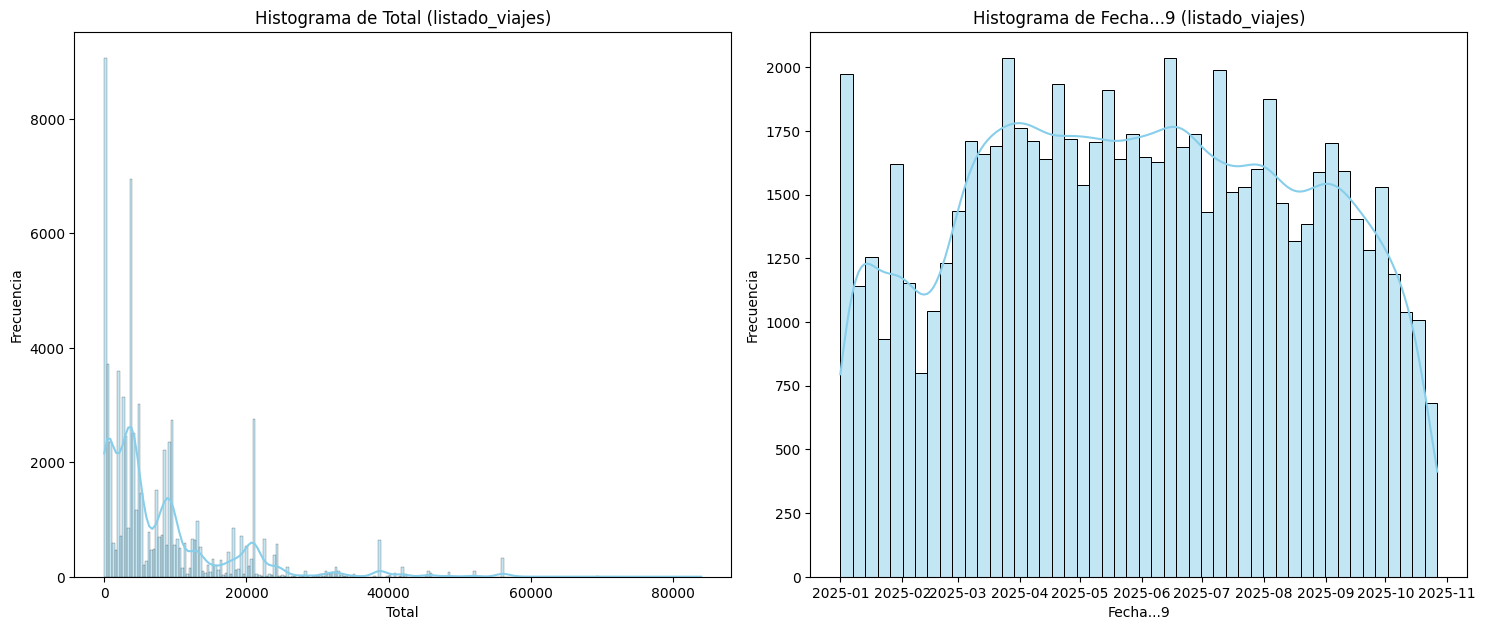

In [ ]:
#histogramas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols_to_plot = [
    'Total', 'Fecha...9'
]

plt.figure(figsize=(15, 12))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(listado_viajes[col], kde=True, color='skyblue')
    plt.title(f'Histograma de {col} (listado_viajes)')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

-Total: El análisis del 'Total' muestra una distribución altamente asimétrica. La mayoría de los viajes se
encuentran en rangos muy bajos de ingreso (0–5,000 MXN), mientras que existen valores
atípicos (outliers) que alcanzan hasta 84,000 MXN.


Media: 5,444 MXN

Mediana: 2,591 MXN

La media es más del doble de la mediana, lo que confirma una estructura de ingresos bimodal:
1. Operación local:
La mayoría de viajes generan ingresos bajos, típicos de movimientos urbanos o
regionales.
2. Viajes de alto valor:
Un pequeño porcentaje de viajes de larga distancia generan ingresos significativamente
mayores y sostienen financieramente el promedio general.

-Fecha...9:El histograma muestra que los pedidos tienen una estacionalidad clara a lo largo del año. De
enero a abril el volumen sube de forma constante, alcanzando su punto más alto en marzo–abril.
De mayo a agosto la actividad se mantiene estable, sin picos fuertes. A partir de septiembre el
volumen disminuye progresivamente hasta noviembre. En resumen, el negocio tiene un inicio de
año muy activo, una fase media estable y un cierre de año con menor demanda.



---



###Combustible

Enero-Febrero

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_excel("Enero-febrero 2025 Combustible.xlsx")


df1

,Id Grupo Región,Grupo Región,Id Región,Región,Id Centro costos,Centro Costos,Num Tarjeta,Id Vehículo,Descripción Vehículo,No Comprobante,...,Id Terminal,Placa,Conductor,Observaciones,Parámetro Personalizado1,Parámetro Personalizado2,Parámetro Personalizado3,Parámetro Personalizado4\n,Parámetro Personalizado5,Id Transacción\n
0,2.0,CENTRO,5.0,QUERETARO,80 Q,Fletes Carga General Q,6.363180e+15,T714,T714 LOGIMAYAB,NaN,...,70155.0,57BA7F,,NaN,NaN,NaN,NaN,NaN,NaN,804980555.0
1,2.0,CENTRO,5.0,QUERETARO,80 Q,Fletes Carga General Q,6.363180e+15,T714,T714 LOGIMAYAB,NaN,...,70155.0,57BA7F,,NaN,NaN,NaN,NaN,NaN,NaN,804980556.0
2,2.0,CENTRO,5.0,QUERETARO,80 Q,Fletes Carga General Q,6.363180e+15,T714,T714 LOGIMAYAB,2153.0,...,70155.0,57BA7F,,RD,NaN,NaN,NaN,NaN,NaN,804980567.0
3,2.0,CENTRO,7.0,MEXICO,80 T,Fletes Carga General T,6.363180e+15,T680,T680 LOGIMAYAB,NaN,...,68555.0,04BA5F,,NaN,NaN,NaN,NaN,NaN,NaN,804989499.0
4,2.0,CENTRO,7.0,MEXICO,80 T,Fletes Carga General T,6.363180e+15,T680,T680 LOGIMAYAB,NaN,...,68555.0,04BA5F,,NaN,NaN,NaN,NaN,NaN,NaN,804989500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13890,2.0,CENTRO,10.0,MEXICO II,80 E,Fletes Carga General E,6.363180e+15,T645,T645 LOGIMAYAB,NaN,...,76076.0,26BA8F,,NaN,NaN,NaN,NaN,NaN,NaN,819793522.0
13891,2.0,CENTRO,10.0,MEXICO II,80 E,Fletes Carga General E,6.363180e+15,T645,T645 LOGIMAYAB,NaN,...,76076.0,26BA8F,,NaN,NaN,NaN,NaN,NaN,NaN,819793523.0
13892,2.0,CENTRO,10.0,MEXICO II,80 E,Fletes Carga General E,6.363180e+15,T645,T645 LOGIMAYAB,2135.0,...,76076.0,26BA8F,,NaN,NaN,NaN,NaN,NaN,NaN,819793657.0
13893,2.0,CENTRO,10.0,MEXICO II,80 E,Fletes Carga General E,6.363180e+15,T412,T412 LOGIMAYAB,NaN,...,70092.0,041EV4,,NaN,NaN,NaN,NaN,NaN,NaN,819795407.0


Se presenta la informacion en general de la base de datos donde se nos muestra los valores estadisticos principales de las diferentes columnas asi como la cantidad de datos y el tipo.

In [ ]:
print(df1.info())
print(df1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13895 entries, 0 to 13894
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Id Grupo Región                      13894 non-null  float64       
 1   Grupo Región                         13894 non-null  object        
 2   Id Región                            13894 non-null  float64       
 3   Región                               13894 non-null  object        
 4   Id Centro costos                     13894 non-null  object        
 5   Centro Costos                        13894 non-null  object        
 6   Num Tarjeta                          13894 non-null  float64       
 7   Id Vehículo                          13894 non-null  object        
 8   Descripción Vehículo                 13894 non-null  object        
 9   No Comprobante                       4328 non-null   float64       
 10  Fecha tran

Se evalua si hay nulos dentro del dataframe

In [ ]:
missing_values = pd.DataFrame({
    'Missing Count': df1.isnull().sum(),
    'Missing Percentage': (df1.isnull().sum() / len(df1)) * 100
})

missing_values = missing_values.sort_values(by='Missing Percentage', ascending=False)
print(missing_values)

                                     Missing Count  Missing Percentage
TAR                                          13895          100.000000
Monto descuento                              13895          100.000000
Parámetro Personalizado1                     13895          100.000000
Parámetro Personalizado5                     13895          100.000000
Parámetro Personalizado3                     13895          100.000000
Parámetro Personalizado4\n                   13895          100.000000
Parámetro Personalizado2                     13895          100.000000
Ticket de Bomba                              13895          100.000000
Observaciones                                10113           72.781576
Saldo Ant Transacción                         9841           70.824037
Saldo Actual Después de Transacción           9840           70.816841
Km Ant Transacción                            9571           68.880892
Recorrido                                     9571           68.880892
No Com

Se visualizan mejor estos datos en forma de porcentaje. Donde observamos que hay columnas que no cuentan con ningun valor.

Se eliminan todas esas columans que tienen 100% de valores nulos.

In [ ]:
columns_to_drop_df1 = missing_values[missing_values['Missing Percentage'] == 100].index.tolist()

columns_to_drop_df1 = [col for col in columns_to_drop_df1 if col in df1.columns]
df1 = df1.drop(columns=columns_to_drop_df1)
df1

,Id Grupo Región,Grupo Región,Id Región,Región,Id Centro costos,Centro Costos,Num Tarjeta,Id Vehículo,Descripción Vehículo,No Comprobante,...,% IVA,Importe Transacción,Estado Transacción,Tipo Tarjeta,Consumo En,Id Terminal,Placa,Conductor,Observaciones,Id Transacción\n
0,2.0,CENTRO,5.0,QUERETARO,80 Q,Fletes Carga General Q,6.363180e+15,T714,T714 LOGIMAYAB,NaN,...,16.0,0.00,PROCESADO,NaN,POS OFFLINE / POS ONLINE,70155.0,57BA7F,,NaN,804980555.0
1,2.0,CENTRO,5.0,QUERETARO,80 Q,Fletes Carga General Q,6.363180e+15,T714,T714 LOGIMAYAB,NaN,...,16.0,0.00,PROCESADO,NaN,POS OFFLINE / POS ONLINE,70155.0,57BA7F,,NaN,804980556.0
2,2.0,CENTRO,5.0,QUERETARO,80 Q,Fletes Carga General Q,6.363180e+15,T714,T714 LOGIMAYAB,2153.0,...,16.0,9597.39,APROBADA,Smart,POS OFFLINE / POS ONLINE,70155.0,57BA7F,,RD,804980567.0
3,2.0,CENTRO,7.0,MEXICO,80 T,Fletes Carga General T,6.363180e+15,T680,T680 LOGIMAYAB,NaN,...,16.0,0.00,PROCESADO,NaN,POS OFFLINE / POS ONLINE,68555.0,04BA5F,,NaN,804989499.0
4,2.0,CENTRO,7.0,MEXICO,80 T,Fletes Carga General T,6.363180e+15,T680,T680 LOGIMAYAB,NaN,...,16.0,0.00,PROCESADO,NaN,POS OFFLINE / POS ONLINE,68555.0,04BA5F,,NaN,804989500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13890,2.0,CENTRO,10.0,MEXICO II,80 E,Fletes Carga General E,6.363180e+15,T645,T645 LOGIMAYAB,NaN,...,16.0,0.00,PROCESADO,NaN,POS OFFLINE / POS ONLINE,76076.0,26BA8F,,NaN,819793522.0
13891,2.0,CENTRO,10.0,MEXICO II,80 E,Fletes Carga General E,6.363180e+15,T645,T645 LOGIMAYAB,NaN,...,16.0,0.00,PROCESADO,NaN,POS OFFLINE / POS ONLINE,76076.0,26BA8F,,NaN,819793523.0
13892,2.0,CENTRO,10.0,MEXICO II,80 E,Fletes Carga General E,6.363180e+15,T645,T645 LOGIMAYAB,2135.0,...,16.0,6999.83,APROBADA,Smart,POS OFFLINE / POS ONLINE,76076.0,26BA8F,,NaN,819793657.0
13893,2.0,CENTRO,10.0,MEXICO II,80 E,Fletes Carga General E,6.363180e+15,T412,T412 LOGIMAYAB,NaN,...,16.0,0.00,PROCESADO,NaN,POS OFFLINE / POS ONLINE,70092.0,041EV4,,NaN,819795407.0


*Se* observa que hay una gran cantidad de columnas con solo 1 valor nulo. Por lo que se procede a eliminar todas estas.

In [ ]:
df1.isnull().sum()

,0
Id Grupo Región,1
Grupo Región,1
Id Región,1
Región,1
Id Centro costos,1
Centro Costos,1
Num Tarjeta,1
Id Vehículo,1
Descripción Vehículo,1
No Comprobante,9567


In [ ]:
missing_values = pd.DataFrame({
    'Missing Count': df1.isnull().sum(),
    'Missing Percentage': (df1.isnull().sum() / len(df1)) * 100
})
missing_values = missing_values.sort_values(by='Missing Percentage', ascending=False)

columns_1valor= missing_values[missing_values['Missing Count'] == 1].index.tolist()

print(f"Columnas con un solo valor faltante: {columns_1valor}")

df1_cleaned = df1.dropna(subset=columns_1valor)


df1 = df1_cleaned.copy()

Columnas con un solo valor faltante: ['Num Tarjeta', 'Centro Costos', 'Id Centro costos', 'Región', 'Id Región', 'Grupo Región ', 'Id Grupo Región', 'Id Vehículo', 'Certificación Cualli', 'Razón social Afiliado', 'Código Pemex', 'Estado/Ciudad de Transacción', 'Descripción Vehículo', 'Fecha transacción', 'Tipo Transacción', 'Descripción Mercancía', 'Mercancía', 'Rendimiento Real', 'Km Transacción', 'Estado Transacción', 'Consumo En', 'Precio Unitario Merc', '% IVA', 'Id Terminal', 'Placa', 'Conductor', 'Id Transacción\n']


Se busca en el dataframe si hay valores duplicados. Pero al momento de ejecutar el codigo se muestra que no hay valores duplicados.

In [ ]:
duplicates_count1 = df1.duplicated().sum()
duplicates_count1

np.int64(0)

**Columnas numericas**

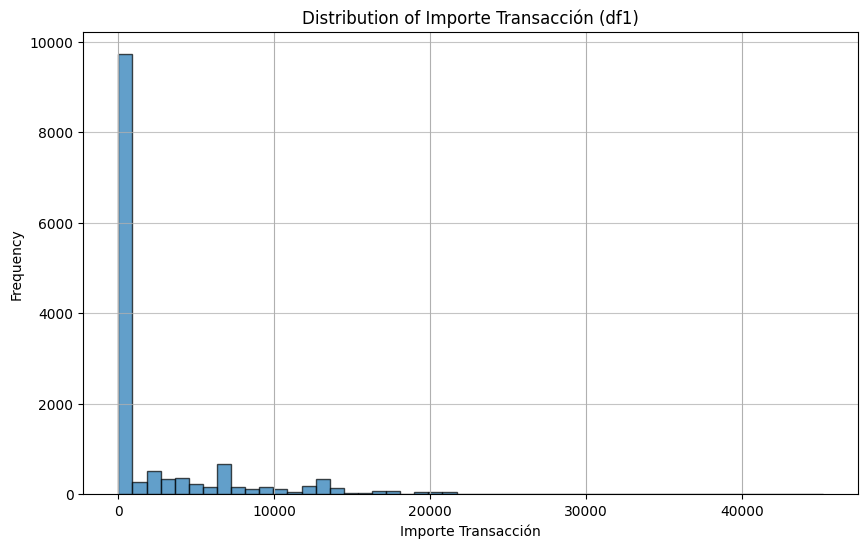

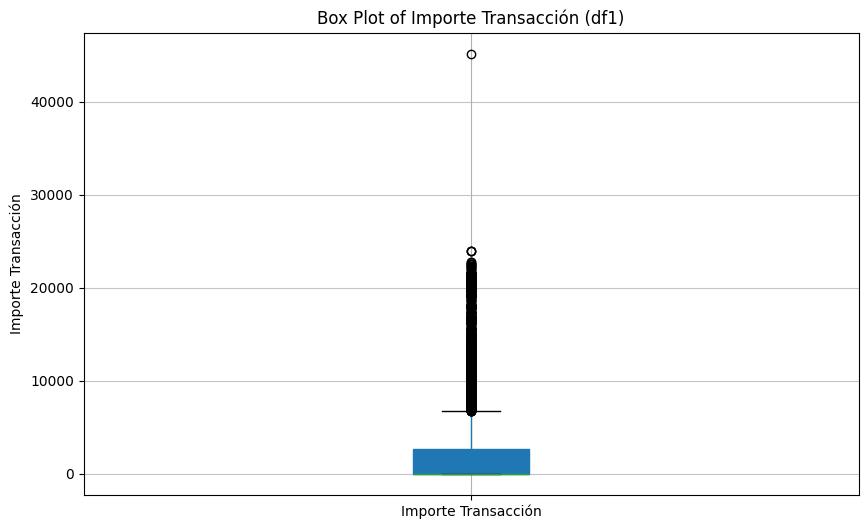

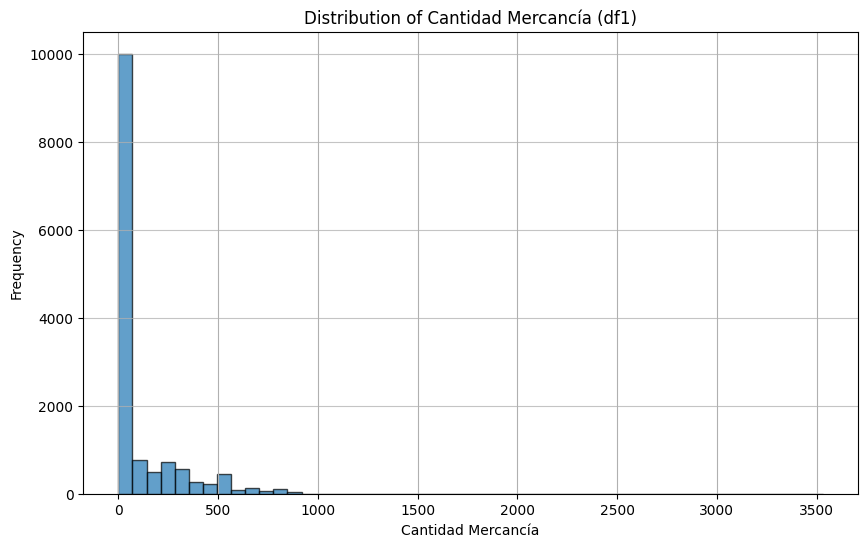

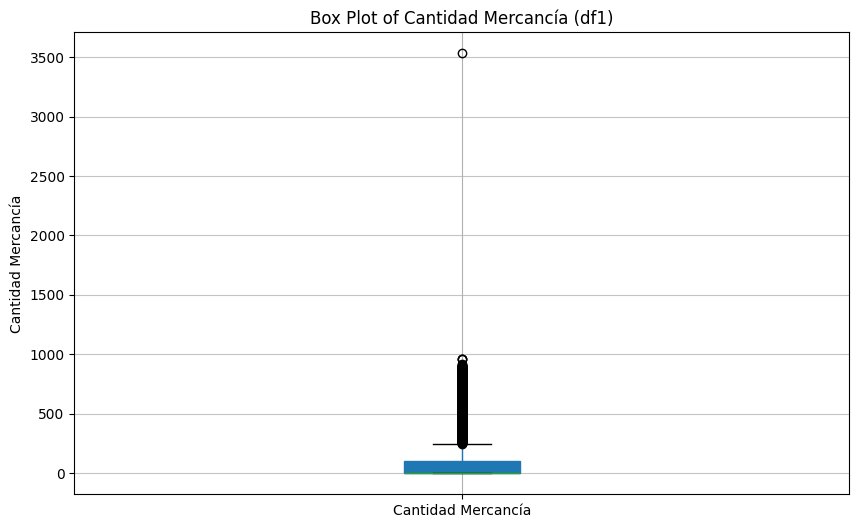

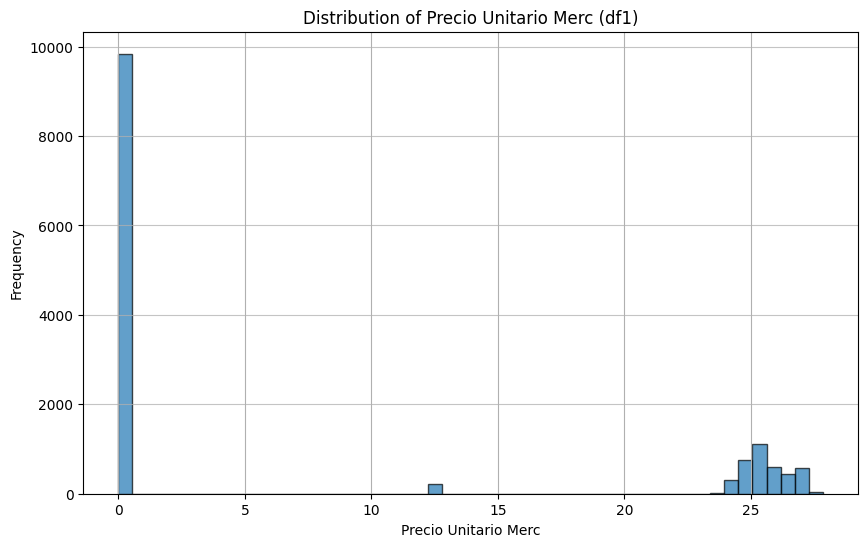

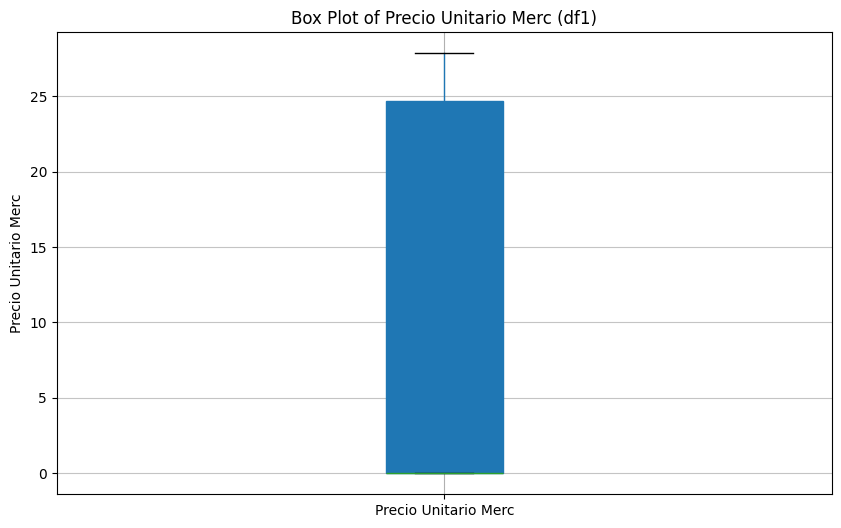

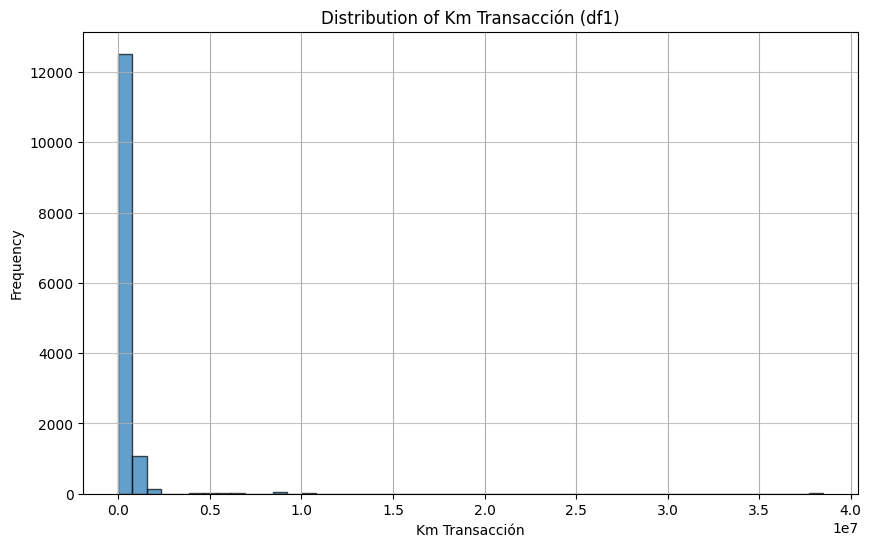

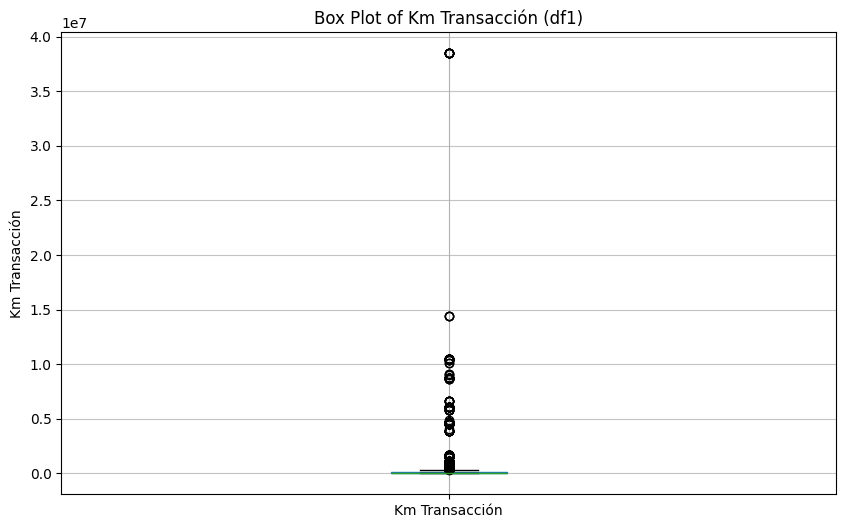

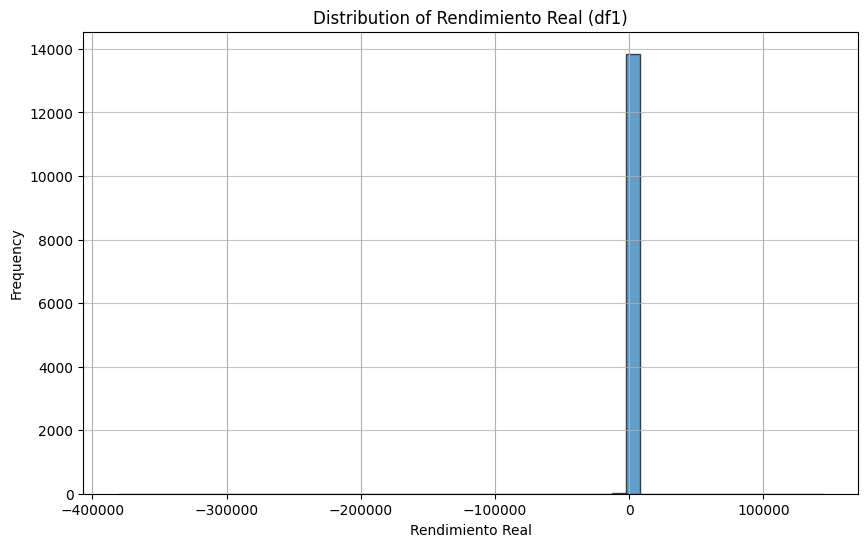

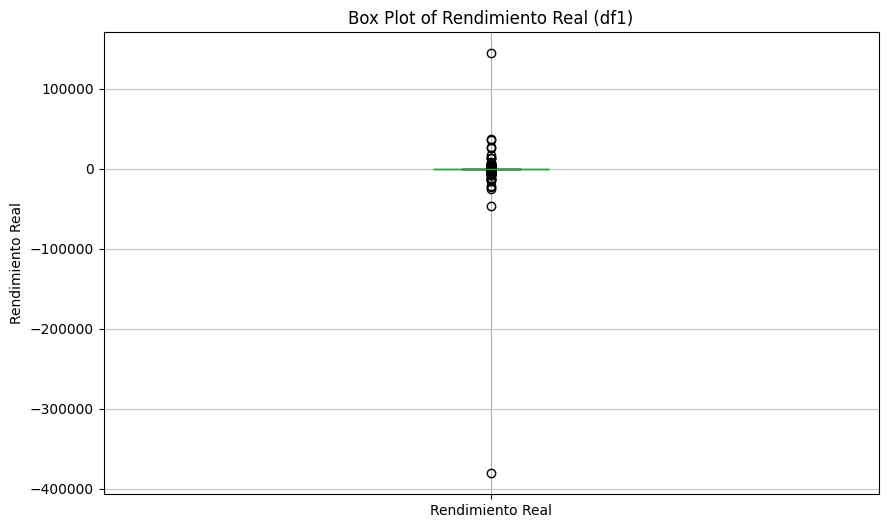

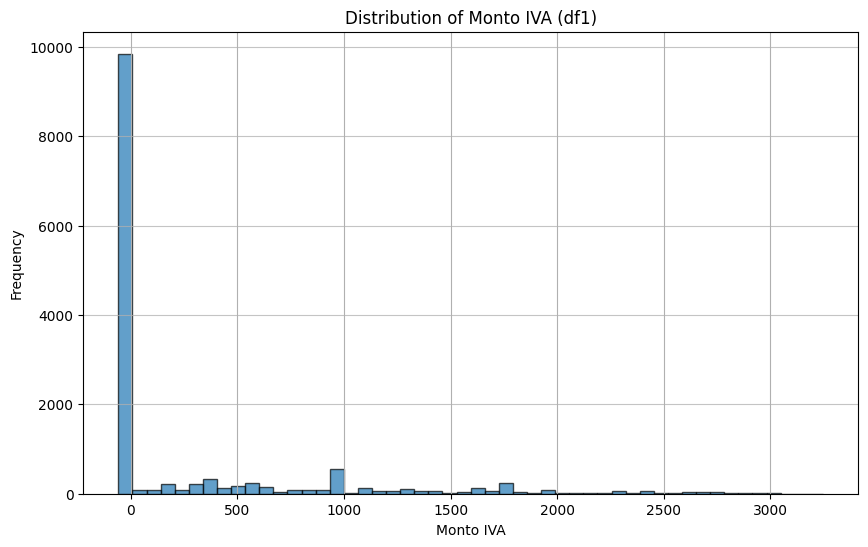

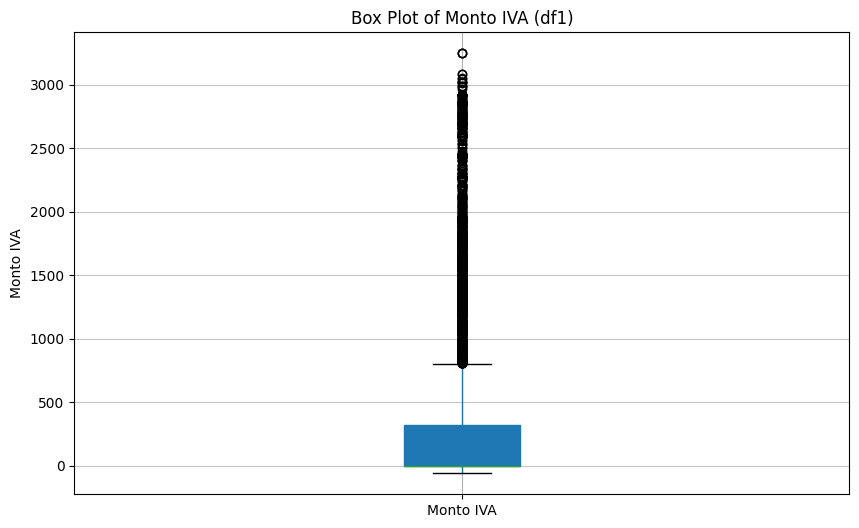

In [ ]:
import matplotlib.pyplot as plt

selected_numeric_cols = [
    'Importe Transacción',
    'Cantidad Mercancía',
    'Precio Unitario Merc',
    'Km Transacción',
    'Rendimiento Real',
    'Monto IVA'
]

for col in selected_numeric_cols:
    # Histogram
    plt.figure(figsize=(10, 6))
    df1[col].hist(bins=50, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col} (df1)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # Box plot
    plt.figure(figsize=(10, 6))
    df1.boxplot(column=col, patch_artist=True)
    plt.title(f'Box Plot of {col} (df1)')
    plt.ylabel(col)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

* Importe Transaccion:

En esta grafica se muestra que hay demasiados outliers, en el extremo superior, lo que indica que son mayores al promedio.

* Cantidad de mercancia:

 El histograma presenta una asimetria hacia la derecha donde se registran cantidades de mercancia pequeños. Por el otro lado tambien hay una gran cantidad de datos atipicos inusualmente grandes.

* Kilometros transaccion:

Gran cantidad de datos se encuentran alrededor de 0. Tambien hay valores atipicos muy altos, lo que demuestra que si hay varios viajes de larga distancia.

* Rendimiento Real:

Se muestra una gran variabilidad en el rendimiento real de los camiones. Debido a que la mayoria de los valores se encuentran a los extremos.

* Monto IVA:

Una gran cantidad de transacciones muestran montos de IVA significativamente altos.

**Columnas categoricas**

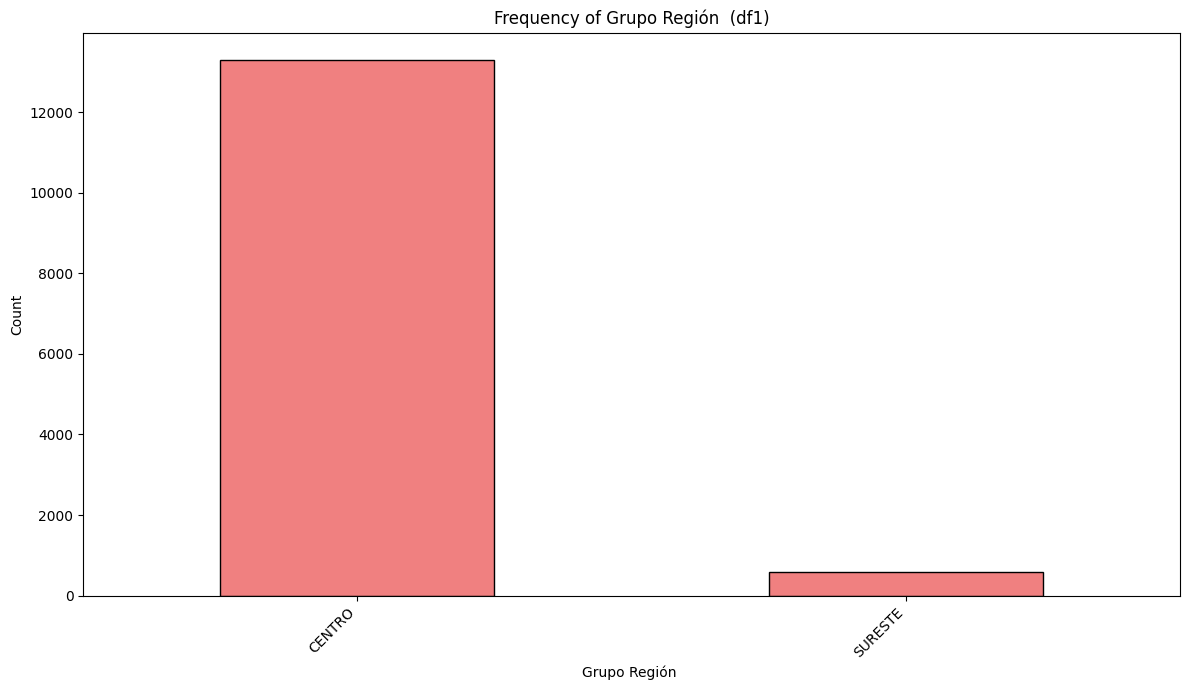

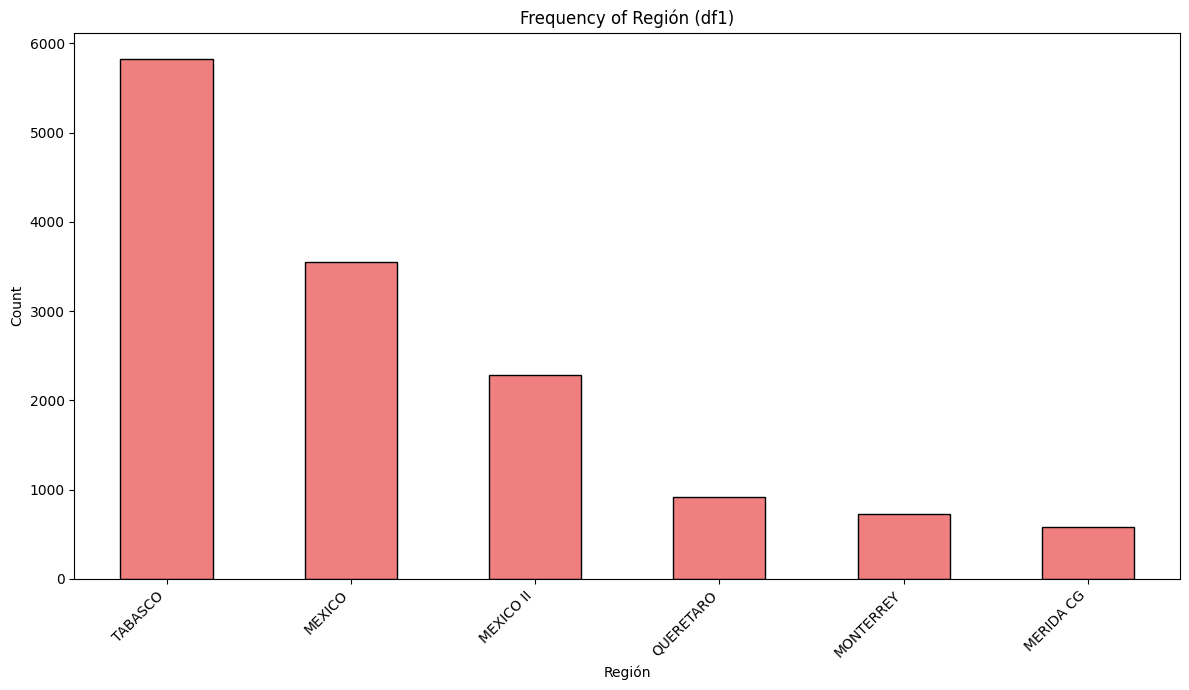

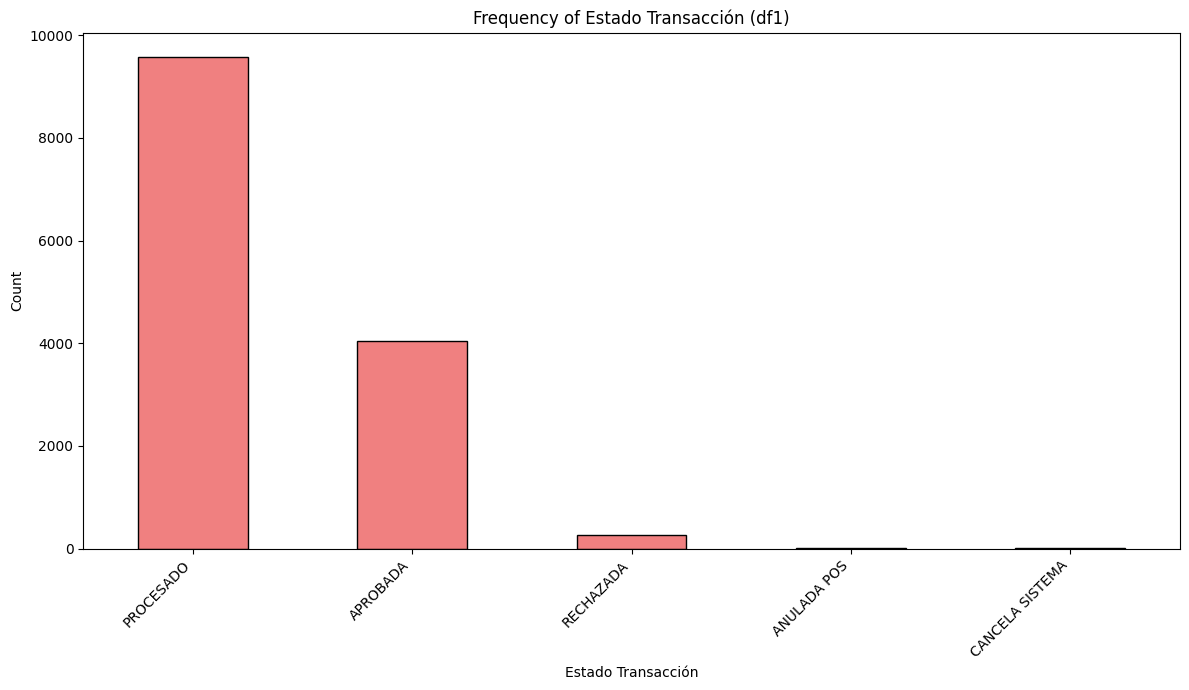

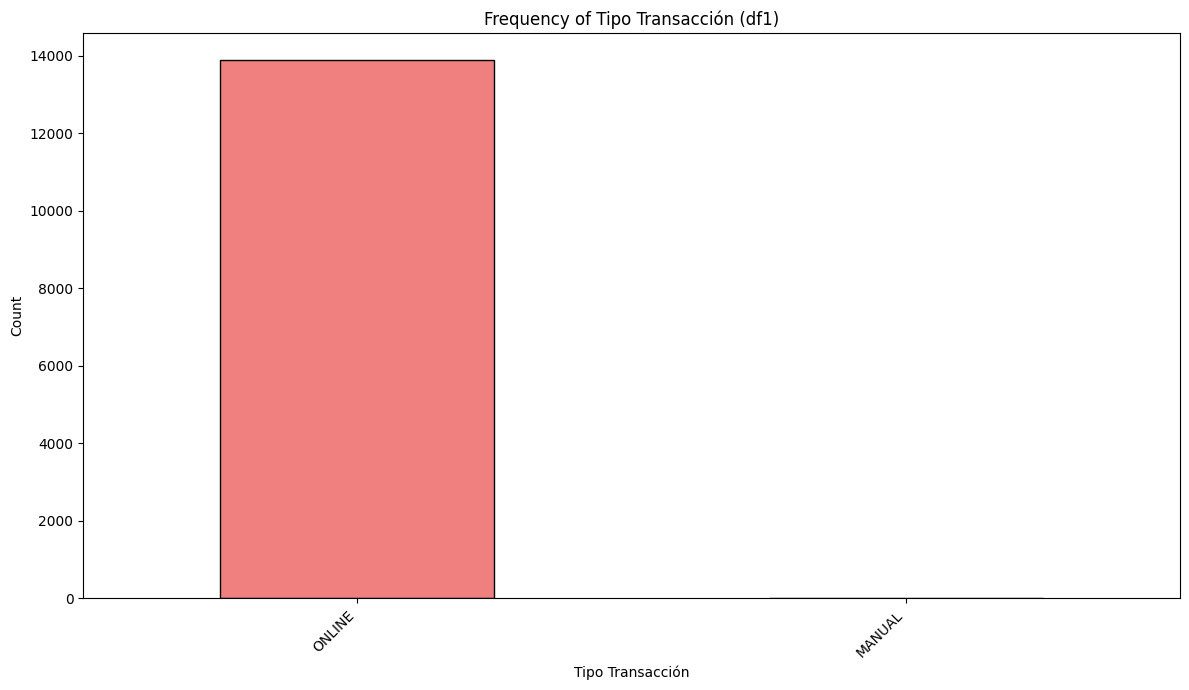

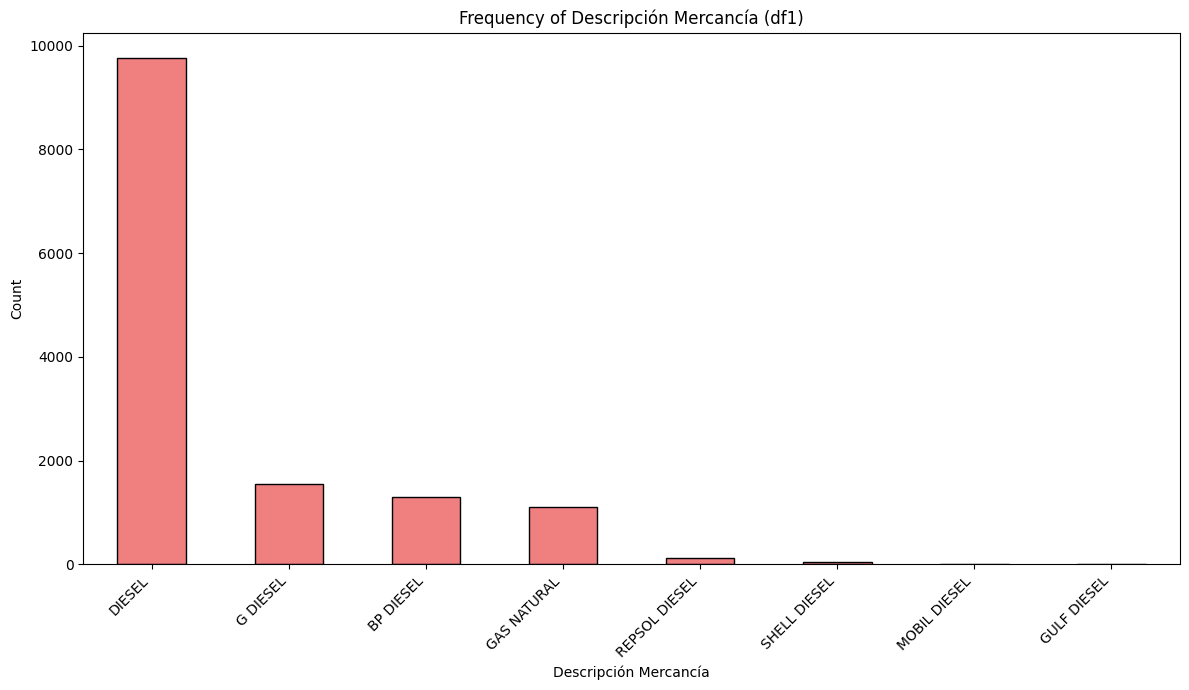

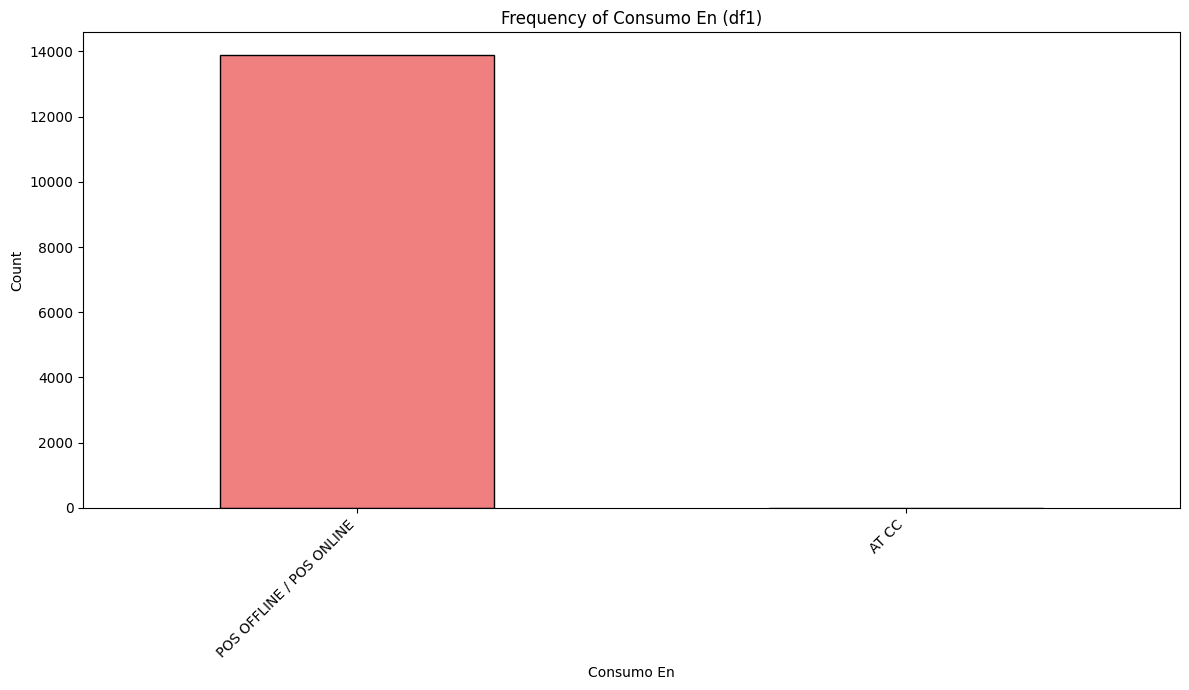

In [ ]:
import matplotlib.pyplot as plt

selected_categorical_cols = [
    'Grupo Región ',
    'Región',
    'Estado Transacción',
    'Tipo Transacción',
    'Descripción Mercancía',
    'Consumo En'
]

for col in selected_categorical_cols:
    plt.figure(figsize=(12, 7))
    df1[col].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title(f'Frequency of {col} (df1)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

* Grupo de Region:

La mayoria de las trasacciones corrensponden al grupo "Centro".

* Region:

Las region que presenta mayor frecuencia de transacciones es "Tabasco" y los que le siguen son "Mexico" y "Mexico II".

* Estado de Transaccion:
La gran mayoria de los datos se encuentran en estado de "Aprobada", por lo que se asume que son raras las ocasiones que es rechazada la operacion.

* Tipo de transaccion:

Los tipos de trassaccion son online.

* Descripcion de mercancia:

Las mercanciasd di "Diesel" y "G Disel", son las mas grecuentes.

Agosto:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("Agosto Combustible.xlsx")


df

,Unnamed: 0,Consulta de Movimientos,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cliente:,LOGISTICA DEL MAYAB SA DE CV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fecha:,19/09/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hora:,08:45 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Periodo Consulta:,Del 01/08/2025 al 31/08/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6759,2,CENTRO,7,MEXICO,80 T,Fletes Carga General T,6363180032154880,T410,T410 LOGIMAYAB,10312,...,76076,82AJ1N,,R,NaN,NaN,NaN,NaN,NaN,868700098
6760,2,CENTRO,4,TABASCO,80 V,Fletes Carga General V,6363180027110152,T655,T655 LOGIMAYAB,NaN,...,61794,19AY1M,,NaN,NaN,NaN,NaN,NaN,NaN,868700725
6761,2,CENTRO,4,TABASCO,80 V,Fletes Carga General V,6363180027110152,T655,T655 LOGIMAYAB,NaN,...,61794,19AY1M,,NaN,NaN,NaN,NaN,NaN,NaN,868700726
6762,2,CENTRO,4,TABASCO,80 V,Fletes Carga General V,6363180027110152,T655,T655 LOGIMAYAB,1023,...,61794,19AY1M,,R,NaN,NaN,NaN,NaN,NaN,868700806


Lo primero que se realizo fue el de describir las columnas y obtener informacion relevantes de estas.

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6764 entries, 0 to 6763
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               6761 non-null   object
 1   Consulta de Movimientos  6761 non-null   object
 2   Unnamed: 2               6757 non-null   object
 3   Unnamed: 3               6757 non-null   object
 4   Unnamed: 4               6757 non-null   object
 5   Unnamed: 5               6757 non-null   object
 6   Unnamed: 6               6757 non-null   object
 7   Unnamed: 7               6757 non-null   object
 8   Unnamed: 8               6757 non-null   object
 9   Unnamed: 9               2034 non-null   object
 10  Unnamed: 10              6757 non-null   object
 11  Unnamed: 11              6757 non-null   object
 12  Unnamed: 12              6757 non-null   object
 13  Unnamed: 13              6757 non-null   object
 14  Unnamed: 14              6757 non-null  

En esta primera descripcion de los datos observamos que se contienen 6756 datos, con 48 columnas. Sin embargo se muestra que varias de estas columnas solo tienen valores nulos.

Ahora se busca visualizar de mejor manera cual es el porcentaje de valores nulos por cada columna.

In [ ]:
missing_values = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df)) * 100
})

missing_values = missing_values.sort_values(by='Missing Percentage', ascending=False)
print(missing_values)

                         Missing Count  Missing Percentage
Unnamed: 44                       6763           99.985216
Unnamed: 45                       6763           99.985216
Unnamed: 34                       6763           99.985216
Unnamed: 46                       6763           99.985216
Unnamed: 42                       6763           99.985216
Unnamed: 43                       6763           99.985216
Unnamed: 16                       6763           99.985216
Unnamed: 41                       4994           73.832052
Unnamed: 33                       4811           71.126552
Unnamed: 27                       4779           70.653459
Unnamed: 28                       4778           70.638675
Unnamed: 17                       4731           69.943820
Unnamed: 19                       4731           69.943820
Unnamed: 9                        4730           69.929036
Unnamed: 20                       4730           69.929036
Unnamed: 22                       4730           69.9290

Se puede observar que 7 columnas  del dataframe tienen un 100% de valores nulos. Mientras qeu otras columnas tienen de 69 a 73% de valores nulos.

Se eliminan todas las columnas que no tienen ningun dato, esto para tener un dataframe mas manejable

In [ ]:
columns_to_drop = [
    'Unnamed: 44', # Corresponds to 'Parámetro Personalizado3'
    'Unnamed: 45', # Corresponds to 'Parámetro Personalizado4\n'
    'Unnamed: 34', # Corresponds to 'Monto descuento'
    'Unnamed: 46', # Corresponds to 'Parámetro Personalizado5'
    'Unnamed: 42', # Corresponds to 'Parámetro Personalizado1'
    'Unnamed: 43', # Corresponds to 'Parámetro Personalizado2'
    'Unnamed: 16'  # Corresponds to 'Ticket de Bomba'
]
df = df.drop(columns=columns_to_drop)
df

KeyError: "['Parámetro Personalizado3', 'Parámetro Personalizado4\\n', 'Monto descuento', 'Parámetro Personalizado5', 'Parámetro Personalizado1', 'Parámetro Personalizado2', 'Ticket de Bomba'] not found in axis"

Una vez eliminado las columnas sin ningun dato, se busca mostrar cuantos valores nulos hay por columna.

In [ ]:
df.isnull().sum()

Se buscan duplicados

In [ ]:
duplicates_count = df.duplicated().sum()
duplicates_count


**Columnas numericas**

In [ ]:
import matplotlib.pyplot as plt

selected_numeric_cols = [
    'Importe Transacción',
    'Cantidad Mercancía',
    'Precio Unitario Merc',
    'Km Transacción',
    'Rendimiento Real',
    'Monto IVA'
]

for col in selected_numeric_cols:
    # Histogram
    plt.figure(figsize=(10, 6))
    df[col].hist(bins=50, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # Box plot
    plt.figure(figsize=(10, 6))
    df.boxplot(column=col, patch_artist=True)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

* Importe de transaccion:

Aqui se muestra que hay un sesgo hacia la derecha donde el valor se concentra en 0. Lo que se puede interpretar que las transacciones fueron sin costo. Tambien en el diagrama de caja se muestra que hay muchos valores atipicos en el extremos superior, lo que indica que hay transacciones mas grandes queel promedio.

* Cantidad de mercancia:

En esta grafica se muestra que se registran en cantidades muy pequeñas volumenes de mercancia. De igual forma se registran que hay ocaciones en las que se hay mercancias inusualmente grandes.

* Precio unitario:

La mayoria de los productos tienen un precio unitario bajo.

* Km transaccion:

Se muestra una gran varaibilidad en los kilometrajes registrados. Ademas la mediana esta cerca de del cero, de igualforma se registran valores muy altos en los valores atipicos.

* Rendimiento real:

Los valores estan sesgados hacia la derecha muchos de ellos con valores muy bajos.

**Columnas categoricas**








In [ ]:
import matplotlib.pyplot as plt

selected_categorical_cols = [
    'Grupo Región ',
    'Región',
    'Estado Transacción',
    'Tipo Transacción',
    'Descripción Mercancía',
    'Consumo En'
]

for col in selected_categorical_cols:
    plt.figure(figsize=(12, 7))
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

* Grupo Region:

La concentracion de viajes se encuentra en la region  "Centro"

* Region:

La region se encuentra dominada por "Tabasco" y "Mexico".

* Estado Transaccion:

En esta area se observa que la gran mayoria de las trasaccionsesn estan en estado de "Procesando" y en "Aprobado".

* Tipo de transaccion:

Lo mas comun en esta area es que see encuentre en un estado de "Carga" o "Abastecimiento"

* Descripcion de Mercancia:

Se muestrea que los datos mas comunes reflejados son "Diesel" y "Gasolina".

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_excel("Agosto Combustible.xlsx")

columns_to_drop = [
    'Parámetro Personalizado3',
    'Parámetro Personalizado4\n',
    'Monto descuento',
    'Parámetro Personalizado5',
    'Parámetro Personalizado1',
    'Parámetro Personalizado2',
    'Ticket de Bomba'


]
df = df.drop(columns=columns_to_drop)

# Select only numerical columns for the correlation matrix
numerical_cols_df = df.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
correlation_matrix_df = df[numerical_cols_df].corr()

# Plotting the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Reporte Combustible Agosto')
plt.show()

In [ ]:

df_filtered_recorrido_cleaned = df[ (df['Recorrido'] >= 0) & (df['Recorrido'] <= 27000) ]


promedio_recorrido_limpio = df_filtered_recorrido_cleaned['Recorrido'].mean()


print(f"El promedio de 'Recorrido' (excluyendo valores negativos y > 27000 km) es: {promedio_recorrido_limpio:.2f}")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que la columna sea numérica para el histograma y aplicar el filtro
df_filtered_recorrido_cleaned = df[df['Recorrido'].notna()].copy()
df_filtered_recorrido_cleaned['Recorrido'] = pd.to_numeric(df_filtered_recorrido_cleaned['Recorrido'], errors='coerce')
df_filtered_recorrido_cleaned = df_filtered_recorrido_cleaned[(df_filtered_recorrido_cleaned['Recorrido'] > 0) & (df_filtered_recorrido_cleaned['Recorrido'] <= 27000)]


plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_recorrido_cleaned['Recorrido'], bins=50, kde=True, color='skyblue')
plt.title('Distribución de Recorrido (Valores > 0 y <= 27000 km)')
plt.xlabel('Recorrido (km)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

Septiembre:

In [ ]:
df2 = pd.read_excel("Septiembre 2025 Combustible.xlsx")


df2

In [ ]:
print(df2.info())
print(df2.describe())

Se puede ver que tambien hay valores nulos en el df de Sepetiembre

In [ ]:
missing_values = pd.DataFrame({
    'Missing Count': df2.isnull().sum(),
    'Missing Percentage': (df2.isnull().sum() / len(df2)) * 100
})

missing_values = missing_values.sort_values(by='Missing Percentage', ascending=False)
print(missing_values)

Se eliminan las columnas de las cuales el 100 % de sus valores fueron nulos

In [ ]:
columns_to_drop = [
    'Parámetro Personalizado3',
    'Parámetro Personalizado4\n',
    'Monto descuento',
    'Parámetro Personalizado5',
    'Parámetro Personalizado1',
    'Parámetro Personalizado2',
    'Ticket de Bomba'


]
df2 = df2.drop(columns=columns_to_drop)
df2

In [ ]:
df2.isnull().sum()

In [ ]:
missing_values = pd.DataFrame({
    'Missing Count': df2.isnull().sum(),
    'Missing Percentage': (df2.isnull().sum() / len(df2)) * 100
})
missing_values = missing_values.sort_values(by='Missing Percentage', ascending=False)

columns_1valor= missing_values[missing_values['Missing Count'] == 1].index.tolist()

print(f"Columnas con un solo valor faltante: {columns_1valor}")

df2_cleaned = df1.dropna(subset=columns_1valor)


df2 = df2_cleaned.copy()

Se elimina el valor nulo de todas las columnas que se visualizaron anteriormente.

In [ ]:
df2.isnull().sum()

In [ ]:
duplicates_count = df2.duplicated().sum()
duplicates_count


No se encontraron valores duplicados en el mes de Septiembre

**Columnas numericas**

In [ ]:
import matplotlib.pyplot as plt

selected_numeric_cols = [
    'Importe Transacción',
    'Cantidad Mercancía',
    'Precio Unitario Merc',
    'Km Transacción',
    'Rendimiento Real',
    'Monto IVA'
]

for col in selected_numeric_cols:
    # Histogram
    plt.figure(figsize=(10, 6))
    df2[col].hist(bins=50, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col} (df2)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # Box plot
    plt.figure(figsize=(10, 6))
    df2.boxplot(column=col, patch_artist=True)
    plt.title(f'Box Plot of {col} (df2)')
    plt.ylabel(col)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

* Importe transaccion:

Se muestra una asimetria a la derecha con gran concentracion en los valores de 0. Tambien hay varios valores atipicos en el extremo superior.

* Cantidad de mercancia:

La mayoria de los registros corresponden a pequeñas cantidades de mercancia, y son valores atipicos los que se registran con cantidades grandes.

* Precio Unitario:

La mayoria de los productos tienen un precio unitario bajo, con sus exepciones con valores altos.

* Km Transaccion:

Hay una alta variabilidad en los kilometros con valroes atipicos altos y muchos alrededor de 0.

* Rendimiento Real:

La distribucion esta sesgada hacia la derecha lo que indica que la mayoria de vehiculos tienen un bajo rendimiento.

* Monto IVA:

Se presentan varios picos con valores considerablemente altos.

**Columnas categoricas**

In [ ]:
import matplotlib.pyplot as plt

selected_categorical_cols = [
    'Grupo Región ',
    'Región',
    'Estado Transacción',
    'Tipo Transacción',
    'Descripción Mercancía',
    'Consumo En'
]

for col in selected_categorical_cols:
    plt.figure(figsize=(12, 7))
    df2[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Frequency of {col} (df2)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

* Grupo Region:
La concentracion de viajes sigue estando en la region "Centro"

* Region: La mayoria de las trasacciones se mantiene en "Toluca" y en "Mexico".

* Estado Transaccion:
La mayoria esta en estado de "Procesando" y "Procesado", lo que indica que es raro que se cancele algun viaje.

* Tipo de Transaccion:
Se hacen las transacciones por medio "Online".

* Descripcion mercancia:
La mayoria de mercancia se basa en "Diesel" y "G.Diesel".

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Reload and Clean df2 (as previously done in the notebook) ---
df2 = pd.read_excel("Septiembre 2025 Combustible.xlsx")

# Columns with 100% null values (identified earlier)
missing_values_df2 = pd.DataFrame({
    'Missing Count': df2.isnull().sum(),
    'Missing Percentage': (df2.isnull().sum() / len(df2)) * 100
})
missing_values_df2 = missing_values_df2.sort_values(by='Missing Percentage', ascending=False)
columns_to_drop_df2 = missing_values_df2[missing_values_df2['Missing Percentage'] == 100].index.tolist()
df2 = df2.drop(columns=columns_to_drop_df2)

# Columns with single null values (identified earlier)
columns_1valor_df2 = missing_values_df2[missing_values_df2['Missing Count'] == 1].index.tolist()
df2 = df2.dropna(subset=columns_1valor_df2).copy()

# --- Histogram generation ---
# Filtrar la columna 'Recorrido' de df2 para eliminar valores negativos y mayores a 27000 km
df2_filtered_recorrido_cleaned = df2[(df2['Recorrido'] >= 0) & (df2['Recorrido'] <= 27000)].copy()

# Asegurarse de que la columna sea numérica para el histograma
df2_filtered_recorrido_cleaned['Recorrido'] = pd.to_numeric(df2_filtered_recorrido_cleaned['Recorrido'], errors='coerce').dropna()

plt.figure(figsize=(10, 6))
sns.histplot(df2_filtered_recorrido_cleaned['Recorrido'], bins=50, kde=True, color='skyblue')
plt.title('Distribución de Recorrido en df2 (Valores > 0 y <= 27000 km)')
plt.xlabel('Recorrido (km)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

##**Sección 3: Implementación detallada de los modelos seleccionados.**

La fase de modelado se diseñó para responder a las preguntas estratégicas planteadas en la fase de Contexto, utilizando una aproximación multimétodo. Se seleccionaron tres técnicas complementarias: Aprendizaje No Supervisado (K-Means) para segmentación, Series de Tiempo (SARIMAX) para pronóstico, y Simulación Estocástica (Monte Carlo) para optimización de capacidad.

**Segmentación de Rutas: Clustering K-Means.**

El primer paso para abandonar el modelo de "talla única" fue comprender la heterogeneidad de las rutas.

Se utilizó el algoritmo K-Means, una técnica de agrupamiento particional que minimiza la varianza intra-cluster.

* Objetivo: Clasificar las rutas no por su geografía, sino por su perfil de riesgo operativo y estructura de demanda.

* Variables de Entrada: Se utilizaron dos dimensiones ortogonales derivadas del preprocesamiento:

Volumen Total: Indicador de la importancia económica y la escala de la ruta.

Dependencia del Cliente Principal: Indicador de vulnerabilidad. Una ruta con alta dependencia carece de Risk Pooling natural.

* Validación del Modelo: Se utilizó el Coeficiente de Silueta, obteniendo un valor de 0.941, lo que indica una separación casi perfecta entre los grupos definidos. Adicionalmente, un análisis ANOVA confirmó diferencias estadísticamente significativas ($F=13,543$, $p \approx 0$) entre los clusters encontrados.

In [ ]:
df= listado_viajes.copy()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy import stats

# 1. Calcular Volumen Total por Ruta
ruta_volumen = df.groupby('Ruta')['Viaje'].count().reset_index(name='Total_Viajes')

# 2. Calcular cuántos viajes tiene el cliente MÁS GRANDE de cada ruta
# Agrupamos por Ruta y Cliente, contamos viajes, ordenamos y tomamos el primero (el mayor) de cada ruta
ruta_cliente = df.groupby(['Ruta', 'Nombre Cliente'])['Viaje'].count().reset_index()
ruta_max_cliente = ruta_cliente.sort_values(['Ruta', 'Viaje'], ascending=[True, False]) \
                               .groupby('Ruta').first().reset_index()

# 3. Unir y calcular el porcentaje de dependencia (Concentración)
data_cluster = pd.merge(ruta_volumen, ruta_max_cliente[['Ruta', 'Viaje']], on='Ruta')
data_cluster.rename(columns={'Viaje': 'Viajes_Cliente_Top'}, inplace=True)

# Variable clave: ¿Qué % de la ruta controla el cliente #1?
data_cluster['Porcentaje_Dependencia'] = data_cluster['Viajes_Cliente_Top'] / data_cluster['Total_Viajes']

# Seleccionamos solo las variables numéricas para el modelo
X = data_cluster[['Total_Viajes', 'Porcentaje_Dependencia']]

# Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Entrenar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Asignar los clusters a nuestros datos originales
data_cluster['Cluster_Riesgo'] = labels

In [ ]:

# EVALUACIÓN k-means
# Coeficiente de Silueta: Mide qué tan bien definidos están los grupos (-1 a 1)
# Cerca de 1 es excelente, cerca de 0 es superpuesto.
silueta = silhouette_score(X_scaled, labels)
print(f"Calidad del Agrupamiento (Coeficiente de Silueta): {silueta:.3f}")

# Calcular Inercia (Inertia) - También en tu temario
print(f"Inercia del modelo (Suma de distancias al cuadrado): {kmeans.inertia_:.2f}")

Calidad del Agrupamiento (Coeficiente de Silueta): 0.941
Inercia del modelo (Suma de distancias al cuadrado): 938.42


Con el fin de asegurarnos que la clasificación de k-means es significativa y no debido al azar, se aplica ANOVA.

In [ ]:
# H0: Las medias de dependencia entre los clusters son iguales.
# H1: Al menos un cluster tiene una dependencia significativamente distinta.

grupo_0 = data_cluster[data_cluster['Cluster_Riesgo'] == 0]['Porcentaje_Dependencia']
grupo_1 = data_cluster[data_cluster['Cluster_Riesgo'] == 1]['Porcentaje_Dependencia']
grupo_2 = data_cluster[data_cluster['Cluster_Riesgo'] == 2]['Porcentaje_Dependencia']

f_stat, p_value = stats.f_oneway(grupo_0, grupo_1, grupo_2)

print(f"Resultados ANOVA:")
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.10f}")


Resultados ANOVA:
F-Statistic: 13543.46
P-Value: 0.0000000000


Dado el P-Value de 0.0, determina que existe una diferencia estadísticamente inmensa entre los grupos. El algoritmo ha detectado exitosamente que la operación se fractura en comportamientos de riesgo distintos.

Se crean listas con la clasificación de las rutas con el fin de tenerlas preparadas para su aplicación en el modelo de simulación de Montecarlo.

In [ ]:
#lista de rutas clasificadas en Cluster_Riesgo 2
cluster_2 = data_cluster[data_cluster['Cluster_Riesgo'] == 2]
cluster_1 = data_cluster[data_cluster['Cluster_Riesgo'] == 1]
cluster_0 = data_cluster[data_cluster['Cluster_Riesgo'] == 0]
cluster_2 = cluster_2["Ruta"].tolist() #crítico
cluster_1 = cluster_1["Ruta"].tolist() #moderado
cluster_0 = cluster_0["Ruta"].tolist() #alto

In [ ]:
#conteo de valores por cluster
len(cluster_2), len(cluster_1), len(cluster_0)

(50, 10, 2128)

**Pronóstico Jerárquico: Top-Down vs. Bottom-Up.**

Una vez segmentadas las rutas, se abordó el problema de la predictibilidad. La literatura sugiere que existen dos enfoques principales para pronosticar en jerarquías: Bottom-Up (sumar pronósticos de nivel inferior) y Top-Down (desagregar pronósticos de nivel superior).



Enfoque Bottom-Up (Cliente por Cliente):

Se entrenaron modelos individuales usando ExponentialSmoothing para cada cliente en una ruta y se sumaron sus resultados.

Desafío Teórico: La demanda a nivel cliente es "Zero-Inflated" (muchos ceros) y altamente estocástica. Los modelos de regresión estándar fallan al intentar capturar este comportamiento, generando ruido y sobreajuste.

In [ ]:
df= listado_viajes.copy()   #No hay una clasificación por región, por lo que se asigna un nuevo atributo
#con la región a la que pertenece cada sucursal.
def assign_region(sucursal):
    if sucursal in ["MERIDA/YUC001", "MERIDA CG/YUC007", "QROO/QUI001", "CARDARRAS/TAB005"]:
        return "Sureste"
    elif sucursal in ["CHALCO/CMX001", "MEXICO/EMX003", "QUERETARO/QRO003"]:
        return "Centro"
    elif sucursal == "MONTERREY/NLE002":
        return "Norte"
    else:
        return "Desconocido" # Para sucursales que no caen en ninguna categoría

df["Region"] = df["Sucursal"].apply(assign_region)

In [ ]:
#importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error


In [ ]:
#Configuración Inicial
# Elegimos la Región con más datos para asegurar estabilidad estadística
REGION_OBJETIVO = df['Region'].value_counts().idxmax()
print(f"RONÓSTICO JERÁRQUICO PARA: {REGION_OBJETIVO}")

RONÓSTICO JERÁRQUICO PARA: Sureste


In [ ]:
# Filtrar y preparar datos
df['Fecha Salida'] = pd.to_datetime(df['Fecha Salida'])
data = df[df['Region'] == REGION_OBJETIVO].copy()

In [ ]:

# Definimos el horizonte de pronóstico (4 semanas)
TEST_WEEKS = 4

#  NIVEL SUPERIOR (REGIÓN)
# Serie de tiempo agregada
ts_region = data.set_index('Fecha Salida').resample('W')['Viaje'].count().fillna(0)

In [ ]:
# Definimos el rango de entrenamiento
train_reg = ts_region.iloc[:-TEST_WEEKS]
# Definimos el índice común para el período de pronóstico de 4 semanas para todos los modelos.
# Este período debe comenzar justo después de que finalicen los datos de entrenamiento generales de la región.
overall_forecast_index = pd.date_range(start=train_reg.index.max() + pd.Timedelta(weeks=1),
                                       periods=TEST_WEEKS, freq='W-SUN')

In [ ]:
# NIVEL INFERIOR (RUTAS)
# Seleccionamos las Top 5 rutas (para no saturar el cómputo, representan el 80/20)
top_rutas = data['Ruta'].value_counts().head(5).index.tolist()
ts_rutas_dict = {}


In [ ]:
for ruta in top_rutas: #conteo de viajes por ruta, asignamos valor 0 a las semanas sin valor para no omitirlas
    ts_temp = data[data['Ruta'] == ruta].set_index('Fecha Salida').resample('W')['Viaje'].count().fillna(0)
    ts_rutas_dict[ruta] = ts_temp

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Listas para almacenar métricas
preds_rutas = []
rmse_rutas = []



for ruta in top_rutas:
    serie = ts_rutas_dict[ruta]

    # Fecha de corte común
    cutoff_date = overall_forecast_index.min() - pd.Timedelta(weeks=1)
    train = serie[serie.index <= cutoff_date]
    test = serie[serie.index > cutoff_date]

    # Modelo por ruta
    try:
        modelo = ExponentialSmoothing(
            train, trend='add', seasonal='add', seasonal_periods=4
        ).fit()

        pred_individual = modelo.forecast(TEST_WEEKS)

        # Alinear al índice común
        pred_individual_aligned = pred_individual.reindex(overall_forecast_index).fillna(0)

    except Exception as e:
        print(f"No se pudo aplicar el modelo a la ruta {ruta}. Error: {e}. Se usa media.")
        pred_individual_aligned = pd.Series(
            [train.mean()] * TEST_WEEKS, index=overall_forecast_index
        )

    preds_rutas.append(pred_individual_aligned)

    # Alinear test para métricas
    test_aligned = test.reindex(overall_forecast_index).fillna(0)

    # Calcular métricas SOLO si la ruta tiene datos reales en el test
    if not test_aligned.empty and test_aligned.sum() > 0:

        # RMSE
        rmse_individual = np.sqrt(mean_squared_error(test_aligned, pred_individual_aligned))
        rmse_rutas.append(rmse_individual)

    else:
        rmse_rutas.append(np.nan)



# Pronóstico Bottom-Up
pred_reconciliada = sum(preds_rutas)
pred_reconciliada.name = "Pronóstico Reconciliado (Bottom-Up)"


In [ ]:
#Se suman únicamente las series temporales de las rutas principales.Esto crea una serie regional
#comparable porque solo incluye esas rutas (no toda la región).
ts_agregada_top5 = sum([ts_rutas_dict[r] for r in top_rutas])

In [ ]:
# Alineamos el índice (frecuencia semanal)
ts_agregada_top5 = ts_agregada_top5.asfreq('W').fillna(0)

In [ ]:
#Definimos el set de entrenamiento con esta serie sumada, no con la regional total. Así ambos modelos se evalúan en igualdad de condiciones
cutoff_date = overall_forecast_index.min() - pd.Timedelta(weeks=1)
train_reg_comparable = ts_agregada_top5[ts_agregada_top5.index <= cutoff_date]

In [ ]:
# Ajustamos el Modelo Directo sobre esta suma específica
modelo_region = ExponentialSmoothing(train_reg_comparable, trend='add', seasonal='add', seasonal_periods=4).fit()
pred_directa_region = modelo_region.forecast(TEST_WEEKS)

# Alineamos la predicción al índice común
pred_directa_region = pred_directa_region.reindex(overall_forecast_index).fillna(0)
pred_directa_region = modelo_region.forecast(TEST_WEEKS)

In [ ]:
#comparamos contra la suma real de las Top Rutas
# (Si usamos la región total vs top rutas, el volumen no cuadraría).

real_suma_top_rutas_aligned = sum([ts_rutas_dict[r].reindex(overall_forecast_index).fillna(0) for r in top_rutas])


In [ ]:
combined_data = pd.DataFrame({
    'real': real_suma_top_rutas_aligned,
    'reconciliada': pred_reconciliada,
    'directa': pred_directa_region
}).dropna()

real_aligned = combined_data['real']
pred_reconciliada_aligned = combined_data['reconciliada']
pred_directa_region_aligned = combined_data['directa'] #creamos df y eliminamos nulos

In [ ]:
# Cálculo de Métricas (RMSE)
rmse_reconciliado = np.sqrt(mean_squared_error(real_aligned, pred_reconciliada_aligned))
rmse_directo = np.sqrt(mean_squared_error(real_aligned, pred_directa_region_aligned))



print("RESULTADOS DE LA COMPARACIÓN DE MODELOS")

print(f"Error (RMSE) Modelo Reconciliado (Suma de Rutas): {rmse_reconciliado:.2f}")
print(f"Error (RMSE) Modelo Directo (Región Global):      {rmse_directo:.2f}")



RESULTADOS DE LA COMPARACIÓN DE MODELOS
Error (RMSE) Modelo Reconciliado (Suma de Rutas): 115.24
Error (RMSE) Modelo Directo (Región Global):      124.08


El enfoque de reconciliación ascendente (Bottom-Up) demostró ser superior.
Mejora de Precisión: Se logró una reducción del error de 8.84 unidades (de 124.08 a 115.24), lo que equivale a una mejora del 7.1% en la precisión del pronóstico.
Este resultado indica que la "Región" analizada contiene suficiente heterogeneidad interna (rutas con comportamientos distintos) como para que el promedio regional oculte señales importantes. La desagregación permite "limpiar" esas señales y generar una suma más exacta.




---





**Enfoque Top-Down (Ruta Agregada):**

Se entrenó un modelo SARIMAX sobre la serie de tiempo agregada de la ruta completa.
Fundamento: La Ley de los Grandes Números sugiere que al agregar demandas individuales, la variabilidad relativa disminuye y los patrones estacionales emergen con mayor claridad. El modelo SARIMAX permite incorporar variables exógenas (días festivos, fines de semana) y capturar la estacionalidad semanal (m=7) identificada en el EDA.

In [ ]:
#librerías requeridad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [ ]:
df = listado_viajes.copy()

In [ ]:
df = df.rename(columns={'Fecha...9': 'Fecha', 'Nombre Cliente': 'Cliente'}) #renombramos columnas

In [ ]:
# Creamos un DataFrame maestro de fechas para asegurar continuidad
fecha_min = df['Fecha'].min()
fecha_max = df['Fecha'].max()
all_dates = pd.date_range(start=fecha_min, end=fecha_max, freq='D')


In [ ]:
# DataFrame de Variables Exógenas (Características de calendario)
exog_df = pd.DataFrame(index=all_dates)
exog_df['DiaSemana'] = exog_df.index.dayofweek
exog_df['Es_FinDeSemana'] = (exog_df['DiaSemana'] >= 5).astype(int) # Sábado y Domingo
exog_df['Es_Quincena'] = np.where(exog_df.index.day.isin([15, 30, 31, 1]), 1, 0)

In [ ]:
#SELECCIÓN DE LA RUTA A ANALIZAR
# Para probar la hipótesis, elegimos la Ruta con más movimiento
top_ruta = df['Ruta'].value_counts().idxmax()
print(f"Analizando escenario para la ruta: {top_ruta}")

Analizando escenario para la ruta: BB PACABTUN/BB PONIENTE


In [ ]:
# Filtramos los datos solo para esa ruta
df_ruta = df[df['Ruta'] == top_ruta]

In [ ]:
# DEFINICIÓN DE ENTRENAMIENTO Y PRUEBA
# Cortamos los últimos 28 días para probar la predicción (se podrían usar 60 correspondientes al 20% de test
#sin embargo, el modelo SARIMAX muestra mejor modelado a corto plazo, además de que la predicción meta es a 1 mes)
test_days = 28
split_date = all_dates[-test_days]

In [ ]:
# Variables exógenas divididas
exog_train = exog_df[exog_df.index < split_date]
exog_test = exog_df[exog_df.index >= split_date]

In [ ]:
# Parámetros del modelo
my_order = (2, 1, 1)
my_seasonal_order = (0, 1, 1, 7)


*Para conocer la base de decisión de los parámetros del modelo, véanse ANEXOS al final del archivo.*

In [ ]:
# ENFOQUE A: TOP-DOWN (Modelo Agregado)


# Agregamos toda la demanda de la ruta por día
ts_top = df_ruta.groupby('Fecha')['Folio'].count().reindex(all_dates, fill_value=0)

# División Train/Test
y_train_top = ts_top[ts_top.index < split_date]
y_test_top = ts_top[ts_top.index >= split_date]

#Ajuste SARIMAX
model_top = SARIMAX(y_train_top, exog=exog_train[['Es_FinDeSemana', 'Es_Quincena']],
                    order=my_order, seasonal_order=my_seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
results_top = model_top.fit(disp=False)

# Predicción
pred_top = results_top.get_forecast(steps=len(y_test_top), exog=exog_test[['Es_FinDeSemana', 'Es_Quincena']])
pred_mean_top = pred_top.predicted_mean
pred_mean_top[pred_mean_top < 0] = 0 # No puede haber viajes negativos

In [ ]:
# ENFOQUE B: BOTTOM-UP (Suma de Clientes)


# Identificamos los clientes de esta ruta
clientes_ruta = df_ruta['Cliente'].unique()
preds_acumuladas = pd.Series(0, index=exog_test.index)

# Iteramos sobre cada cliente
for cliente in clientes_ruta:
    # Filtramos datos del cliente
    df_cli = df_ruta[df_ruta['Cliente'] == cliente]
    ts_cli = df_cli.groupby('Fecha')['Folio'].count().reindex(all_dates, fill_value=0)

    # Si el cliente tiene muy pocos datos (<10 viajes), predecimos 0 o media simple para no romper el modelo
    if ts_cli.sum() < 10:
        continue

    y_train_cli = ts_cli[ts_cli.index < split_date]

    try:
        # Ajustamos un modelo individual para cada cliente
        # Usamos un modelo más simple para clientes individuales para asegurar convergencia
        model_cli = SARIMAX(y_train_cli, exog=exog_train[['Es_FinDeSemana']], # Solo fin de semana para clientes
                            order=(1, 0, 0), seasonal_order=(0, 0, 0, 0), # Simplificado
                            enforce_stationarity=False, enforce_invertibility=False)
        res_cli = model_cli.fit(disp=False)

        # Predicción individual
        pred_cli = res_cli.get_forecast(steps=len(exog_test), exog=exog_test[['Es_FinDeSemana']])
        pred_val = pred_cli.predicted_mean
        pred_val[pred_val < 0] = 0

        # Sumamos a la predicción total
        preds_acumuladas += pred_val

    except Exception as e:
        continue # Si falla un cliente, lo saltamos (asumimos 0 impacto)

# RESULTADOS Y GRÁFICA COMPARATIVA

# Métricas de Error
rmse_top = np.sqrt(mean_squared_error(y_test_top, pred_mean_top))
rmse_bottom = np.sqrt(mean_squared_error(y_test_top, preds_acumuladas))
r_2_top = r2_score(y_test_top, pred_mean_top)
r_2_bottom = r2_score(y_test_top, preds_acumuladas)

print(f"RESULTADOS COMPARATIVOS")
print(f"Error (RMSE) Top-Down: {rmse_top:.2f}")
print(f"Error (RMSE) Bottom-Up: {rmse_bottom:.2f}")
print(f"Coeficiente de Determinación (R^2) Top-Down: {r_2_top:.4f}")
print(f"Coeficiente de Determinación (R^2) Bottom-Up: {r_2_bottom:.4f}")



RESULTADOS COMPARATIVOS
Error (RMSE) Top-Down: 3.10
Error (RMSE) Bottom-Up: 6.12
Coeficiente de Determinación (R^2) Top-Down: -0.8499
Coeficiente de Determinación (R^2) Bottom-Up: -6.2264


Este resultado valida un principio fundamental de series de tiempo en logística:

Los resultados obtenidos (RMSE Top-Down: 3.1 vs. Bottom-Up: 6.12) no solo muestran una diferencia numérica, sino que validan empíricamente un principio fundamental de las series de tiempo en logística:

 A nivel de cliente individual, la demanda se comporta de manera esporádica o "intermitente" (caracterizada por muchos ceros y picos aleatorios). El Coeficiente de Determinación (R
2
 ) de -6.2264 en el enfoque Bottom-Up confirma que los modelos SARIMAX individuales no lograron capturar patrones reales, interpretando la volatilidad natural como "ruido" y generando predicciones sin capacidad explicativa.

 Al sumar estos pronósticos individuales ruidosos, los errores no se cancelaron entre sí, sino que se acumularon. Esto resultó en un pronóstico global Bottom-Up con un RMSE de 6.12, lo cual es prácticamente el doble del error observado en el modelo agregado. La suma de las partes fue significativamente menos precisa que el todo. El enfoque Top-Down logró reducir el error a la mitad (3.12). Al pronosticar a nivel de Ruta completa, los picos aleatorios de un cliente se compensaron con los valles de otro. Esto creó una señal más limpia, permitiendo que el modelo mejorara su ajuste (reflejado en un R
2
  de -0.8499, que aunque negativo, es drásticamente superior al -6.22 del enfoque individual), validando que la agregación suaviza la varianza y mejora la predictibilidad.


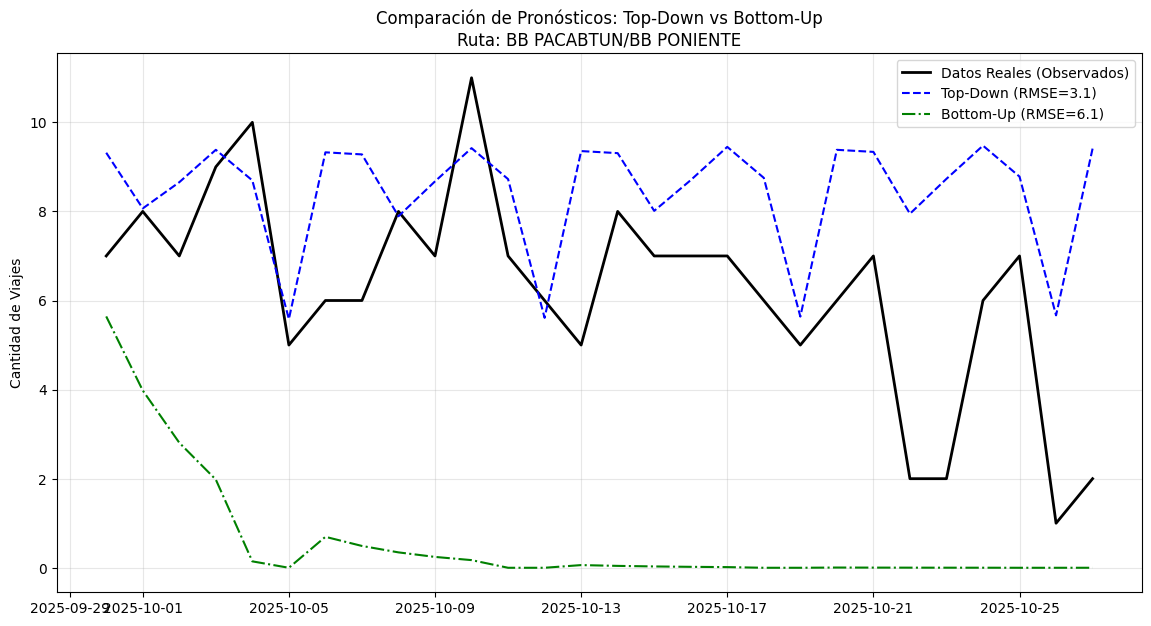

In [ ]:
# Gráfica
plt.figure(figsize=(14, 7))
plt.plot(y_test_top.index, y_test_top, label='Datos Reales (Observados)', color='black', linewidth=2)
plt.plot(y_test_top.index, pred_mean_top, label=f'Top-Down (RMSE={rmse_top:.1f})', color='blue', linestyle='--')
plt.plot(y_test_top.index, preds_acumuladas, label=f'Bottom-Up (RMSE={rmse_bottom:.1f})', color='green', linestyle='-.')

plt.title(f'Comparación de Pronósticos: Top-Down vs Bottom-Up\nRuta: {top_ruta}')
plt.ylabel('Cantidad de Viajes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



---



**Simulación de Capacidad: Monte Carlo Histórico**

Con una segmentación clara y un pronóstico optimizado, el desafío final fue determinar el tamaño exacto de la flota requerida.

Dado que la demanda no es normal, las fórmulas analíticas tradicionales para el stock de seguridad (basadas en Z-scores) subestiman el riesgo en las colas de la distribución. Por ello, se optó por una Simulación de Monte Carlo Histórica.

- Metodología: El modelo simula el desempeño operativo de una ruta iterando sobre miles de escenarios históricos reales.

- Variables de Estado: Demanda semanal real (histórica), Capacidad de flota disponible (variable de decisión).

- Iteración: Para cada ruta crítica (Cluster 2), el modelo prueba tamaños de flota incrementales, desde el promedio de demanda hasta el pico máximo histórico.

- Función de Costo: En cada paso, se calculan dos métricas contrapuestas:


Nivel de Servicio (OTIF Simulado): $\frac{\text{Viajes Atendidos}}{\text{Demanda Total}}$.


Tasa de Ociosidad: $\frac{\text{Unidades Paradas}}{\text{Flota Total}}$.

- Integración Financiera: La innovación clave de este modelo es la integración de los costos reales calculados en el preprocesamiento. El modelo no solo busca el óptimo operativo, sino el óptimo financiero, comparando el costo de tener un camión parado (3,941mxn/día) contra el costo de tener que realizar un movimiento en vacío o subcontratar (9,568mxn/evento) para cubrir un pico de demanda.

Este enfoque de simulación permite construir "Curvas de Trade-off" para cada ruta, visualizando explícitamente cuánto cuesta (en ociosidad) ganar cada punto porcentual adicional de Nivel de Servicio, permitiendo a la gerencia tomar decisiones informadas sobre el apetito de riesgo.


In [ ]:
#librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_ruta = listado_viajes.copy()

In [ ]:
def assign_region(sucursal):
    if sucursal in ["MERIDA/YUC001", "MERIDA CG/YUC007", "QROO/QUI001", "CARDARRAS/TAB005"]:
        return "Sureste"
    elif sucursal in ["CHALCO/CMX001", "MEXICO/EMX003", "QUERETARO/QRO003"]:
        return "Centro"
    elif sucursal == "MONTERREY/NLE002":
        return "Norte"
    else:
        return "Desconocido" # Para sucursales que no caen en ninguna categoría

df_ruta["Region"] =df_ruta["Sucursal"].apply(assign_region)

In [ ]:
#seleccionar registros con Region == Sureste
df_ruta = df_ruta[df_ruta["Region"] == "Sureste"]

In [ ]:
conteo_por_ruta= df_ruta['Ruta'].value_counts()

#encontrar el 20% de las rutas que representan la mayor proporción de la operación
rutas_top_20 = conteo_por_ruta.nlargest(int(0.2 * len(conteo_por_ruta)))
rutas_top_20.head(15) #20% DE LAS RUTAS PRINCIPALES DE LA REGIÓN SURESTE

,count
Ruta,
BB PACABTUN/BB PONIENTE,2297
BB PONIENTE/BB PACABTUN,2297
WM CEDIS VILLAHERMOSA SECOS/PENSION SALINAS CRUZ,1425
PENSION SALINAS CRUZ/WM CEDIS VILLAHERMOSA SECOS,1330
BB PLAYA DEL CARMEN/BB CANCUN PLANTA,1168
BB CANCUN PLANTA/BB PLAYA DEL CARMEN,1134
BB CAMPECHE OTE/BB PACABTUN,1053
BB PACABTUN/BB CAMPECHE OTE,1050
BB PACABTUN/BB CANCUN PLANTA,960


In [ ]:
#lista de rutas de rutas_top_20
rutas_top_20 = rutas_top_20.index.tolist()

In [ ]:
#PREPARACIÓN DE DATOS
META_NIVEL_SERVICIO = 98.0
resultados_simulacion = []

print(f"SIMULACIÓN ITERATIVA PARA {len(rutas_top_20)} RUTAS")

SIMULACIÓN ITERATIVA PARA 275 RUTAS


In [ ]:

# Aseguramos formato fecha

df_ruta['Fecha Salida'] = pd.to_datetime(df_ruta['Fecha Salida'])


In [ ]:
df_base = listado_viajes.copy()

In [ ]:
# BUCLE DE SIMULACIÓN
for ruta in rutas_top_20:

    # Filtrar solo datos de ESTA ruta
    df_ruta = df_base[df_base['Ruta'] == ruta].copy()

    if len(df_ruta) < 2:
        continue # Saltamos rutas sin suficientes datos

    #Agrupar demanda SEMANAL
    demanda_semanal = (
        df_ruta.set_index('Fecha Salida')
        .resample('W')['Viaje']
        .count()
        .fillna(0)
    )

    # Estadísticos Base
    media_demanda = demanda_semanal.mean()
    max_demanda = demanda_semanal.max()


    #CÁLCULO DE SIGMA (VOLATILIDAD)
    sigma = demanda_semanal.std()



    #Motor de Simulación (Iteramos buffers)
    capacidad_base = int(np.ceil(media_demanda))
    rango_buffer = range(0, int(max_demanda) + 5)

    solucion_encontrada = None

    for buffer in rango_buffer:
        capacidad_total = capacidad_base + buffer

        # Cálculos vectorizados
        viajes_atendidos = np.minimum(demanda_semanal, capacidad_total) #Si la demanda es menor o igual a la capacidad → se atiende toda la demanda. Si la demanda supera la capacidad → solo se atiende lo que permite la capacidad
        unidades_ociosas = np.maximum(0, capacidad_total - demanda_semanal) #cuánta capacidad no se utilizó

        total_demandado = demanda_semanal.sum()
        total_atendido = viajes_atendidos.sum()

        # KPIs
        ns_actual = (total_atendido / total_demandado * 100) if total_demandado > 0 else 0

        # Si cumplimos la meta (98%)
        if ns_actual >= META_NIVEL_SERVICIO:
            capacidad_disponible_total = capacidad_total * len(demanda_semanal)
            tasa_ociosidad = (unidades_ociosas.sum() / capacidad_disponible_total * 100) if capacidad_disponible_total > 0 else 0

            solucion_encontrada = {
                'Ruta': ruta,
                'Promedio_Semanal': media_demanda,
                'Pico_Maximo': max_demanda,
                'Sigma': sigma,   #Guardamos Sigma
                'Flota_Base': capacidad_base,
                'Buffer_Optimo': buffer,
                'Flota_Total_Recomendada': capacidad_total,
                'Nivel_Servicio_Logrado': ns_actual,
                'Tasa_Ociosidad': tasa_ociosidad
            }
            break

    if solucion_encontrada:
        resultados_simulacion.append(solucion_encontrada)



In [ ]:
# CONSOLIDACIÓN DE RESULTADOS
df_simulacion_final = pd.DataFrame(resultados_simulacion)

# Ordenar por flota total requerida (descendente)
df_simulacion_final = df_simulacion_final.sort_values(by='Flota_Total_Recomendada', ascending=False)

print("TABLA DE DECISIÓN: FLOTA ÓPTIMA POR RUTA (META 98% NS)")


display_cols = ['Ruta', 'Promedio_Semanal', 'Sigma', 'Flota_Total_Recomendada', 'Buffer_Optimo', 'Tasa_Ociosidad']

print(df_simulacion_final[display_cols].head(10).to_string(index=False))



TABLA DE DECISIÓN: FLOTA ÓPTIMA POR RUTA (META 98% NS)
                                            Ruta  Promedio_Semanal     Sigma  Flota_Total_Recomendada  Buffer_Optimo  Tasa_Ociosidad
                         BB PONIENTE/BB PACABTUN         48.872340 15.117823                       58              9       17.241379
                         BB PACABTUN/BB PONIENTE         48.872340 14.967526                       58              9       17.241379
            BB PLAYA DEL CARMEN/BB CANCUN PLANTA         25.955556 13.372216                       37             11       30.990991
            BB CANCUN PLANTA/BB PLAYA DEL CARMEN         25.200000 12.920386                       35              9       29.396825
WM CEDIS VILLAHERMOSA SECOS/PENSION SALINAS CRUZ         32.386364  6.441926                       35              2        9.025974
PENSION SALINAS CRUZ/WM CEDIS VILLAHERMOSA SECOS         30.930233  5.941762                       35              4       12.956811
              

In [ ]:
import matplotlib.pyplot as plt

# SELECCIONAR LA RUTA A GRAFICAR
# Tomamos la primera ruta del dataframe de resultados (la que requiere más flota)
ruta_a_graficar = df_simulacion_final.iloc[0]['Ruta']
datos_optimos = df_simulacion_final.iloc[0]


# RE-SIMULACIÓN PARA GRAFICAR (Necesitamos toda la curva, no solo el óptimo)
# Filtramos datos de nuevo para esta ruta específica
df_grafico = df_base[df_base['Ruta'] == ruta_a_graficar].copy()
demanda_semanal = df_grafico.set_index('Fecha Salida').resample('W')['Viaje'].count().fillna(0)

media = demanda_semanal.mean()
maximo = demanda_semanal.max()
capacidad_base = int(np.ceil(media))
rango_buffer = range(0, int(maximo) + 5) # Simulamos un rango amplio

resultados_curva = []

for buffer in rango_buffer:
    capacidad_total = capacidad_base + buffer

    # Cálculos
    viajes_atendidos = np.minimum(demanda_semanal, capacidad_total)
    unidades_ociosas = np.maximum(0, capacidad_total - demanda_semanal)

    total_demandado = demanda_semanal.sum()
    total_atendido = viajes_atendidos.sum()

    ns = (total_atendido / total_demandado * 100) if total_demandado > 0 else 0

    cap_disp = capacidad_total * len(demanda_semanal)
    tasa_ocio = (unidades_ociosas.sum() / cap_disp * 100) if cap_disp > 0 else 0

    resultados_curva.append({
        'Flota_Total': capacidad_total,
        'Nivel_Servicio': ns,
        'Tasa_Ociosidad': tasa_ocio
    })


In [ ]:
df_curva = pd.DataFrame(resultados_curva)

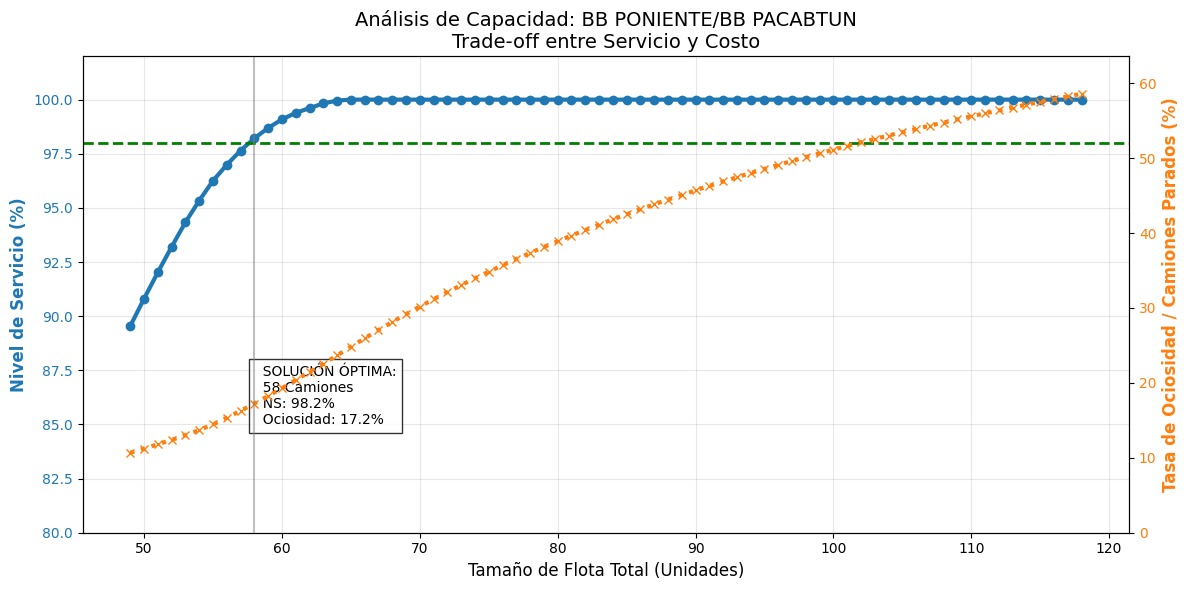

In [ ]:



#CREACIÓN DEL GRÁFICO
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje Izquierdo: Nivel de Servicio (Azul)
color_serv = 'tab:blue'
ax1.set_xlabel('Tamaño de Flota Total (Unidades)', fontsize=12)
ax1.set_ylabel('Nivel de Servicio (%)', color=color_serv, fontsize=12, fontweight='bold')
ax1.plot(df_curva['Flota_Total'], df_curva['Nivel_Servicio'], color=color_serv, linewidth=3, marker='o', label='Nivel Servicio')
ax1.tick_params(axis='y', labelcolor=color_serv)
ax1.set_ylim(80, 102)
ax1.grid(True, alpha=0.3)

# Línea de Meta (Verde)
ax1.axhline(META_NIVEL_SERVICIO, color='green', linestyle='--', linewidth=2, label=f'Meta {META_NIVEL_SERVICIO}%')

# Eje Derecho: Ociosidad (Naranja)
ax2 = ax1.twinx()
color_ocio = 'tab:orange'
ax2.set_ylabel('Tasa de Ociosidad / Camiones Parados (%)', color=color_ocio, fontsize=12, fontweight='bold')
ax2.plot(df_curva['Flota_Total'], df_curva['Tasa_Ociosidad'], color=color_ocio, linestyle=':', linewidth=3, marker='x', label='Ociosidad')
ax2.tick_params(axis='y', labelcolor=color_ocio)
ax2.set_ylim(0, df_curva['Tasa_Ociosidad'].max() + 5)

# 4. MARCADOR DEL PUNTO ÓPTIMO
flota_optima = datos_optimos['Flota_Total_Recomendada']
ns_optimo = datos_optimos['Nivel_Servicio_Logrado']
ocio_optimo = datos_optimos['Tasa_Ociosidad']

# Dibujar línea vertical en el óptimo
plt.axvline(flota_optima, color='gray', alpha=0.5)

# Texto informativo en el gráfico
texto_info = (f"  SOLUCIÓN ÓPTIMA:\n"
              f"  {flota_optima:.0f} Camiones\n"
              f"  NS: {ns_optimo:.1f}%\n"
              f"  Ociosidad: {ocio_optimo:.1f}%")

# Colocamos el texto cerca de la línea óptima
ax1.text(flota_optima, 85, texto_info, bbox=dict(facecolor='white', alpha=0.8), fontsize=10)

plt.title(f'Análisis de Capacidad: {ruta_a_graficar}\nTrade-off entre Servicio y Costo', fontsize=14)
fig.tight_layout()
plt.show()

**Considerando variables de costos:**

In [ ]:
# region SURESTE
def assign_region(sucursal):
    if sucursal in ["MERIDA/YUC001", "MERIDA CG/YUC007", "QROO/QUI001"]: # Añade las demás del PDF
        return "Sureste"
    elif sucursal in ["CHALCO/CMX001", "MEXICO/EMX003", "QUERETARO/QROE"]:
        return "Centro"

    return "Otro"

df_total = listado_viajes.copy()
df_total['Fecha Salida'] = pd.to_datetime(df_total['Fecha Salida'])


if 'Region' not in df_total.columns:
    df_total['Region'] = df_total['Sucursal'].apply(assign_region)

In [ ]:
# FILTRO CLAVE: Nos quedamos con TODO Sureste, no solo el Top
df_sureste_completo = df_total[df_total['Region'] == 'Sureste'].copy()

# Obtenemos la lista de TODAS las rutas únicas que han tenido actividad
todas_rutas_sureste = df_sureste_completo['Ruta'].unique()

print(f"ANÁLISIS")
print(f"Rutas en Top 20: {len(rutas_top_20)}")
print(f"Rutas Totales Sureste: {len(todas_rutas_sureste)}")

ANÁLISIS
Rutas en Top 20: 275
Rutas Totales Sureste: 422


In [ ]:


# VARIABLES FINANCIERAS
COSTO_DIARIO_PARADO = costo_diario_parado
COSTO_MOVIMIENTO_VACIO = costo_movimiento_vacio # Promedio VARÍA DEPENDIENDO DE LOS KM DE CADA RUTA, VÉASE SU CÁLCULO EN ANEXOS
DIAS_LIMITE_ESPERA = dias_maximos_espera # Break-even point
META_NIVEL_SERVICIO = 98.0


In [ ]:
# CREACIÓN DEL DICCIONARIO para clústers
# Esto convierte las 3 listas en un solo "buscador" rápido
mapa_clusters = {}

for r in cluster_2: mapa_clusters[r] = "Cluster 2 (CRÍTICO)"
for r in cluster_1: mapa_clusters[r] = "Cluster 1 (MODERADO)"
for r in cluster_0: mapa_clusters[r] = "Cluster 0 (ALTO)"

In [ ]:
#CONFIGURACIÓN DE NIVELES DE SERVICIO DIFERENCIADOS
METAS_POR_CLUSTER = {
    "Cluster 2 (CRÍTICO)":      98,
    "Cluster 1 (MODERADO)":     90,
    "Cluster 0 (ALTO)": 95,
    "Sin Clasificar / Otro":    98.0
}

In [ ]:


resultados_masivos = []

for ruta in todas_rutas_sureste:

    # Identificar Cluster
    cluster_actual = mapa_clusters.get(ruta, "Sin Clasificar / Otro")

    # SELECCIONAR LA META SEGÚN EL CLUSTER
    meta_objetivo_actual = METAS_POR_CLUSTER.get(cluster_actual, 98.0)

    #Filtrar datos
    df_ruta = df_sureste_completo[df_sureste_completo['Ruta'] == ruta].copy()

    if len(df_ruta) < 2:

        continue

    # Cálculos Estadísticos
    demanda_semanal = df_ruta.set_index('Fecha Salida').resample('W')['Viaje'].count().fillna(0)
    media_demanda = demanda_semanal.mean()
    max_demanda = demanda_semanal.max()
    sigma = demanda_semanal.std()

    # Frecuencia
    if media_demanda > 0: frecuencia_dias = 7 / media_demanda
    else: frecuencia_dias = 999

    # Simulación Iterativa
    capacidad_base = int(np.ceil(media_demanda))
    rango_buffer = range(0, int(max_demanda) + 5)

    buffer_elegido = 0
    flota_final = capacidad_base
    ns_logrado = 0 # Para guardar cuánto logramos exactamente

    for buffer in rango_buffer:
        capacidad_total = capacidad_base + buffer

        # Vectorización
        viajes_atendidos = np.minimum(demanda_semanal, capacidad_total)
        total_demandado = demanda_semanal.sum()

        ns = (viajes_atendidos.sum() / total_demandado * 100) if total_demandado > 0 else 0

        # USAR LA META DINÁMICA EN EL IF
        if ns >= meta_objetivo_actual:
            buffer_elegido = buffer
            flota_final = capacidad_total
            ns_logrado = ns
            break

    # Evaluación Financiera
    costo_buffer = buffer_elegido * COSTO_DIARIO_PARADO * 30

    if frecuencia_dias > DIAS_LIMITE_ESPERA:
        decision = "MOVER EN VACÍO / CONSOLIDAR"
    else:
        decision = "MANTENER FLOTA (Wait)"

    # Guardar Resultados (Agregamos la meta usada para referencia)
    resultados_masivos.append({
        'Ruta': ruta,
        'Cluster': cluster_actual,
        'Meta_NS_Exigida': meta_objetivo_actual,
        'NS_Logrado': ns_logrado,
        'Promedio_Semanal': media_demanda,
        'Sigma_Volatilidad': sigma,
        'Frecuencia_Dias': frecuencia_dias,
        'Buffer_Optimo': buffer_elegido,
        'Flota_Total': flota_final,
        'Costo_Mensual_Buffer': costo_buffer,
        'Estrategia_Sugerida': decision
    })



In [ ]:
# RESULTADOS Y MATRIZ DE DECISIÓN
df_final_sureste = pd.DataFrame(resultados_masivos)

print("ESUMEN GLOBAL")
print(df_final_sureste['Estrategia_Sugerida'].value_counts())

print("MATRIZ DE RIESGO: ESTRATEGIA VS CLUSTER")
# Tabla Pivote para ver dónde caen las rutas críticas
matriz_riesgo = pd.crosstab(df_final_sureste['Estrategia_Sugerida'], df_final_sureste['Cluster'])
display(matriz_riesgo)

# ALERTA DE SEGURIDAD (CRÍTICO)
# Filtramos rutas que son CLUSTER 2 (Críticas) pero el modelo financiero sugiere NO tener flota fija.

alerta = df_final_sureste[
    (df_final_sureste['Cluster'] == "Cluster 2 (Crítico)") &
    (df_final_sureste['Estrategia_Sugerida'].str.contains("VACÍO"))
]

print(f"ALERTA: {len(alerta)} Rutas Críticas sugeridas para operación sin flota fija ")
if not alerta.empty:
    print("Estas rutas son de ALTO RIESGO. Aunque financieramente conviene mover en vacío,")
    print("operativamente podrían colapsar si no hay camiones disponibles. Se sugiere revisión manual:")
    cols_display = ['Ruta', 'Promedio_Semanal', 'Sigma_Volatilidad', 'Frecuencia_Dias', 'Costo_Mensual_Buffer']
    display(alerta[cols_display].sort_values(by='Promedio_Semanal', ascending=False))

ESUMEN GLOBAL
Estrategia_Sugerida
MOVER EN VACÍO / CONSOLIDAR    287
MANTENER FLOTA (Wait)           51
Name: count, dtype: int64
MATRIZ DE RIESGO: ESTRATEGIA VS CLUSTER


Cluster,Cluster 0 (ALTO),Cluster 2 (CRÍTICO)
Estrategia_Sugerida,,
MANTENER FLOTA (Wait),13,38
MOVER EN VACÍO / CONSOLIDAR,286,1


ALERTA: 0 Rutas Críticas sugeridas para operación sin flota fija 


In [ ]:
#Definimos qué columnas queremos ver para que la tabla no sea gigante
columnas_a_mostrar = [
    'Ruta',
    'Cluster',
    'Promedio_Semanal',
    'Buffer_Optimo',
    'Flota_Total',
    'Estrategia_Sugerida',
    'Costo_Mensual_Buffer'
]

#Ordenamos: Las rutas que piden más camiones primero (las más importantes)
df_vista_final = df_final_sureste.sort_values(by='Flota_Total', ascending=False)

# Imprimimos el título y la tabla
print("TABLA DE DECISIÓN DETALLADA POR RUTA (TOP 20)")

# Mostramos las primeras 20
display(df_vista_final[columnas_a_mostrar].head(20))


TABLA DE DECISIÓN DETALLADA POR RUTA (TOP 20)


,Ruta,Cluster,Promedio_Semanal,Buffer_Optimo,Flota_Total,Estrategia_Sugerida,Costo_Mensual_Buffer
14,BB PACABTUN/BB PONIENTE,Cluster 2 (CRÍTICO),48.872340,9,58,MANTENER FLOTA (Wait),2.858482e+07
15,BB PONIENTE/BB PACABTUN,Cluster 2 (CRÍTICO),48.872340,9,58,MANTENER FLOTA (Wait),2.858482e+07
80,BB PLAYA DEL CARMEN/BB CANCUN PLANTA,Cluster 2 (CRÍTICO),25.955556,11,37,MANTENER FLOTA (Wait),3.493700e+07
81,BB CANCUN PLANTA/BB PLAYA DEL CARMEN,Cluster 2 (CRÍTICO),25.200000,9,35,MANTENER FLOTA (Wait),2.858482e+07
30,BB PACABTUN/BB CANCUN PLANTA,Cluster 2 (CRÍTICO),21.333333,8,30,MANTENER FLOTA (Wait),2.540873e+07
63,BB CANCUN PLANTA/BB PACABTUN,Cluster 2 (CRÍTICO),19.586957,10,30,MANTENER FLOTA (Wait),3.176091e+07
329,BB CEDIS CANCUN/BB CANCUN PLANTA,Cluster 0 (ALTO),17.076923,10,28,MANTENER FLOTA (Wait),3.176091e+07
2,BB PACABTUN/BB CAMPECHE OTE,Cluster 2 (CRÍTICO),24.418605,3,28,MANTENER FLOTA (Wait),9.528273e+06
330,BB CANCUN PLANTA/BB CEDIS CANCUN,Cluster 0 (ALTO),17.153846,10,28,MANTENER FLOTA (Wait),3.176091e+07
3,BB CAMPECHE OTE/BB PACABTUN,Cluster 2 (CRÍTICO),24.488372,3,28,MANTENER FLOTA (Wait),9.528273e+06


In [ ]:
df_vista_final["Costo_Mensual_Buffer"].sum()

np.float64(1610278209.4285712)

##**Sección 4: Evaluación**



Esta sección presenta la síntesis cuantitativa y financiera de la investigación. Tras validar la segmentación y el pronóstico, el análisis se concentra en los dos componentes finales y decisivos: la determinación de los costos reales de operación y la simulación de capacidad para definir la estrategia de flota.

Para cualquier modelo de gestión de recursos, es necesario contar con una evaluación financiera precisa.  Esta investigación, en vez de emplear costos contables generales, se basó en la auditoría de datos transaccionales y físicos, reconstruyendo los costos marginales operativos.  Se establecieron dos métricas opuestas que regulan la función de decisión logística: el costo de movilizar un recurso sin carga para atender una urgencia (costo de movimiento en vacío) y el costo de tener un activo detenido (costo de ociosidad).

El análisis de combustible, realizado sobre la base de datos de la región "Mérida CG" durante el primer bimestre del año, reveló métricas de eficiencia que condicionan la rentabilidad de la flota. Con un precio promedio del diésel detectado en 25.84 MXN por litro y un rendimiento real de la flota calculado en 2.80 km/litro, se estableció un costo energético directo de $9.23 MXN por kilómetro recorrido. Este rendimiento, inferior a los estándares óptimos de unidades modernas (que suelen rondar los 3.5 - 4 km/l), implica que la flota de Bepensa tiene una alta sensibilidad al kilometraje improductivo; cada kilómetro en vacío penaliza el margen operativo de manera más severa que en una flota de alta eficiencia.

Para integrar el costo de la infraestructura, se modeló una ruta tipo representativa del eje troncal de la operación (BB PLAYA DEL CARMEN/BB CANCUN PLANTA, aprox. 70 km). El análisis de los registros de peajes identificó las casetas críticas ("San Martin", "Seyba Playa") y, tras filtrar los valores atípicos y normalizar la data multimodal, se determinó un costo promedio de peajes por trayecto de 554.82 MXN. Al sumar los costos de mantenimiento y desgaste de neumáticos, estimados en $5.00 MXN/km según el análisis de las cuentas de gasto en el tablero de P&L, se construyó la estructura de costos para el "Movimiento en Vacío".

| Componente del Costo     | Costo Unitario   | Costo Total Trayecto | Participación Relativa |
| ------------------------ | ---------------- | -------------------- | ---------------------- |
| Combustible              | 9.23 / km       | 646                  | 41,65%                 |
| Mantenimiento y Llantas  | 5.00 / km       | 350                  | 22,57%                 |
| Peajes                   | $554.82 / evento | 555                  | 35,78%                 |
| **COSTO TOTAL (Cvacio)** | -                | 1,551                | 100,00%                |


Este valor de $1, 551 MXN (diferente para cada ruta)constituye el "techo" de la decisión financiera. Representa el costo de penalización por no tener una unidad disponible en el lugar correcto y tener que desplazarla de emergencia. En la lógica del modelo, si el costo acumulado de tener un camión esperando (ocioso) supera este valor, es preferible no asignar la flota y pagar el movimiento en vacío cuando sea necesario.

Por otro lado, el Costo de Ociosidad se calculó en $3,941.96 MXN diarios por unidad. Este valor integra la depreciación del activo, los costos financieros del capital inmovilizado y los salarios base de los operadores. La comparación entre estas dos cifras establece un "Punto de Equilibrio de Espera" de aproximadamente 0.3 días --> 1 día. Esto significa que, financieramente, es destructivo mantener un camión esperando carga por más de un día para la ruta BB PLAYA DEL CARMEN/BB CANCUN PLANTA; pasado ese tiempo, habría sido más rentable moverlo en vacío desde otra base el día de la carga.

Finalmente, el punto clave de la evaluación técnica fue la ejecución de una Simulación de Monte Carlo Histórica. A diferencia de los métodos deterministas que utilizan promedios, este modelo iteró sobre miles de escenarios de demanda real para cada una de las 422 rutas de la región Sureste, probando diferentes tamaños de flota para encontrar el equilibrio óptimo entre Nivel de Servicio y Costo Total. Para las rutas de alto volumen y variabilidad, como la crítica "BB PACABTUN/BB PONIENTE" (clasificada en el Cluster 2), la simulación reveló la insuficiencia de planificar con base en el promedio. El modelo permite visualizar el trade-off no lineal entre servicio y costo. En el caso de esta ruta crítica, alcanzar el 98% de servicio conlleva aceptar una tasa de ociosidad estructural del 17.2%.

| Ruta                         | Cluster     | Promedio Semanal (μ) | Volatilidad (σ) | Flota Recomendada | Buffer (Unidades Extra) | Tasa de Ociosidad Resultante |
| ---------------------------- | ----------- | -------------------- | --------------- | ----------------- | ----------------------- | ---------------------------- |
| BB PACABTUN / BB PONIENTE    | Crítico (2) | 48.9                 | 15.0            | 58                | +9                      | 17.2%                        |
| BB PONIENTE / BB PACABTUN    | Crítico (2) | 48.9                 | 15.1            | 58                | +9                      | 17.2%                        |
| BB PLAYA DEL CARMEN / CANCUN | Crítico (2) | 26.0                 | 13.4            | 37                | +11                     | 31.0%                        |
| BB CANCUN / PLAYA DEL CARMEN | Crítico (2) | 25.2                 | 12.9            | 35                | +9                      | 29.4%                        |
| VILLAHERMOSA / SALINAS CRUZ  | Crítico (2) | 32.4                 | 6.4             | 35                | +2                      | 9.0%                         |


El resultado más contundente de la evaluación surge al escalar la simulación a la totalidad de la red. Al aplicar los costos financieros calculados (3,942 ociosidad vs. 9,568 vacío) a las 422 rutas, el modelo generó una Matriz de Riesgo y Estrategia que segrega la operación en dos grandes bloques.

| Estrategia Sugerida por el Modelo | Cluster 0 (Alto Riesgo/Bajo Vol) | Cluster 2 (Crítico/Alto Vol) | Total Rutas | Interpretación Estratégica                                                                                                                                          |
| --------------------------------- | -------------------------------- | ---------------------------- | ----------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| MANTENER FLOTA (Wait)             | 58                               | 38                           | 96          | Red Estática: El volumen y la consistencia justifican activos dedicados. El costo de tener camiones esperando es menor que el riesgo y costo de fallar el servicio. |
| MOVER EN VACÍO / CONSOLIDAR       | 241                              | 1                            | 242         | Red Dinámica: Rutas esporádicas. Asignar flota fija es financieramente inviable. Es más rentable operar bajo demanda o mediante movimientos de reposicionamiento.   |


##**Conclusiones generales:**
La conclusión central de la investigación es que no existe un "tamaño de flota óptimo" único que satisfaga eficientemente todas las necesidades de la red. La heterogeneidad operativa demostrada por el Clustering y la Simulación exige la adopción de un Modelo Híbrido de Gestión de Flota, que abandone el enfoque monolítico actual en favor de una estrategia bifurcada:
1. Red Estática (Core Fleet): Este segmento debe abarcar exclusivamente las 96 rutas identificadas por la simulación como aptas para la estrategia "Mantener Flota". Esto incluye la totalidad del Cluster 2 (rutas críticas de alto volumen) y el segmento superior del Cluster 0. Para estas rutas, la gestión debe basarse en la asignación fija de unidades y conductores, utilizando los "Buffers Óptimos" calculados para absorber la variabilidad natural. La estabilidad de esta red permite maximizar la utilización de activos y diluir el costo de ociosidad ($3,942/día) gracias al alto volumen transportado.

- Red Dinámica (Flexible Pool): Para las 242 rutas donde la simulación recomendó "Mover en Vacío", la asignación fija de activos debe eliminarse. Estas rutas se caracterizan por una frecuencia de pedidos inferior al punto de equilibrio de 2.4 días, lo que significa que mantener un camión esperando es sistemáticamente más costoso que realizar un movimiento de posicionamiento. La demanda de estas rutas debe ser atendida mediante un "Pool" regional de recursos compartidos o mediante la subcontratación táctica y movimientos en vacío planificados. Este enfoque transforma un costo fijo elevado (depreciación y nómina de camiones parados) en un costo variable puntual (combustible y peajes por evento), alineando la estructura de costos con la realidad de la demanda.

En conclusión, la investigación demuestra que Bepensa posee la capacidad instalada suficiente para cumplir con sus compromisos de servicio. El desafío no es de recursos, sino de inteligencia en su distribución. El modelo propuesto transforma la incertidumbre inherente a la logística en un parámetro gestionable, utilizando la jerarquía de datos y la simulación financiera para maximizar la rentabilidad de cada kilómetro recorrido y asegurar la sostenibilidad operativa de la empresa.

##**Conclusiones individuales:**

**Juan Carlos:**
Mediante todo este ejercicio, se nos permitió comprender de una mejor manera cuales son los factores que están alterando los costos y cómo algunas variaciones en las operaciones llegan a tener un efecto directo en el desempeño. El mayor valor está en identificar cuáles son los hallazgos que en realidad pueden convertirse en acciones y mejoras concretas. La meta ahora es poder enfocarse en los factores de mayor impacto económico y transformar estos análisis en decisiones prácticas, medibles y que sean sostenibles para la organización para de esta manera mejorar la operación día con día.

**Iker:**
En el desarrollo de esta evidencia se consolidó un análisis integral de todas las actividad es realizadas hasta ahora. A través de la limpieza, ingeniería de características y modelado de datos procedentes de telemetría, peajes, viajes y combustible, se identificaron ineficiencias críticas en la gestión logística, tales como la alta dependencia de un solo cliente, costos elevados por ociosidad y errores en los pronósticos desagregados. Mediante técnicas de aprendizaje no supervisado (K-Means), series de tiempo (SARIMAX) y simulación de Monte Carlo, se propuso una estrategia dual de flota estática y dinámica que optimiza el balance entre nivel de servicio y costos operativos. Los resultados demuestran que una planificación jerárquica y basada en datos permite reducir la incertidumbre, mejorar la predictibilidad y generar ahorros significativos, validando así el rol transformador del análisis de datos en la toma de decisiones estratégicas dentro del sector logístico.

**Ana Isabel:**
Este proyecto me permitió aplicar de manera práctica y concreta conocimientos estadísticos y analíticos a un problema logístico real y complejo. A través de la segmentación de rutas, el pronóstico jerárquico y la simulación estocástica, pude trabajar con distintos niveles de agregación de datos, desde rutas individuales hasta regiones completas, comprendiendo cómo la variabilidad operativa y otros factores impactan en las decisiones de asignación de flota. Este enfoque me enseñó que el análisis estadístico no solo sirve para generar números, sino que, cuando se integra con la lógica de negocio, permite tomar decisiones estratégicas basadas en evidencia, optimizando costos y gestionando riesgos de manera eficiente. Además, la combinación de modelos predictivos y simulación me mostró la importancia de validar hipótesis y adaptar las herramientas estadísticas a la realidad operativa, reconociendo que un modelo perfecto no existe, pero un análisis bien estructurado puede reducir la incertidumbre y guiar la planificación hacia resultados más robustos y sostenibles.

**Jose David**
El desarrollo de esta actividad me permitió obtener una visión más clara sobre nuestro punto de enfoque, brindándome mayor certeza y conocimiento acerca de los principales factores que influyen en nuestro modelo. Esto tiene como objetivo ofrecer al grupo Bepensa una base más sólida para decidir qué tipo de implementación realizar en cuanto a los camiones. Asimismo, el modelo SARIMAX nos permitirá contar con una referencia confiable para analizar y proyectar la tendencia de los viajes.

##ANEXOS

####**SARIMAX**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd

# Configuración del df para graficar
df_sarimax = listado_viajes['Fecha...9'].value_counts().reset_index()
df_sarimax.columns = ['Fecha', 'Viajes']
df_sarimax = df_sarimax[df_sarimax['Fecha'] != 'Grand Total']

# Convertir Fecha a datetime
df_sarimax['Fecha'] = pd.to_datetime(df_sarimax['Fecha'])

# Ordenar por fecha
df_sarimax = df_sarimax.sort_values('Fecha')

# Crear un rango diario completo
fecha_completa = pd.date_range(start=df_sarimax['Fecha'].min(),
                               end=df_sarimax['Fecha'].max(),
                               freq='D')

# Hacer merge para tener frecuencia diaria
df_sarimax = fecha_completa.to_frame(index=False, name='Fecha').merge(
    df_sarimax, on='Fecha', how='left'
)

# Rellenar valores faltantes
df_sarimax['Viajes'] = df_sarimax['Viajes'].fillna(method='ffill')
df_sarimax['Viajes'] = df_sarimax['Viajes'].fillna(method='bfill')



/tmp/ipython-input-2239981420.py:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sarimax['Viajes'] = df_sarimax['Viajes'].fillna(method='ffill')
/tmp/ipython-input-2239981420.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sarimax['Viajes'] = df_sarimax['Viajes'].fillna(method='bfill')


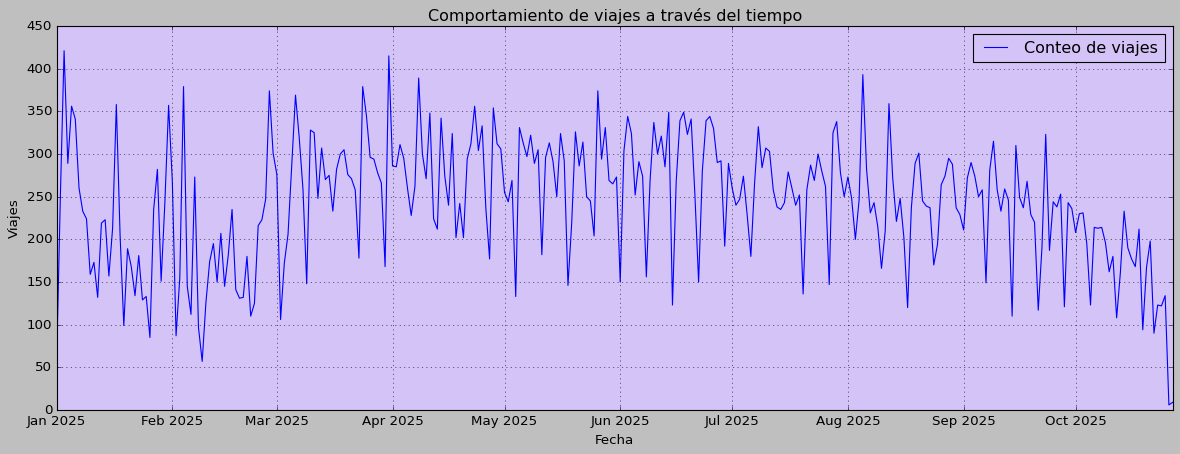

In [ ]:
plt.style.use('classic') # fivethirtyeight  grayscale  classic
dark_style = {
    'axes.facecolor': "#d3c3f7"}  # '#484366'  '#008080' "#abc9ea","#98daa7","#f3aba8","#d3c3f7","#f3f3af","#c0ebe9"
plt.rcParams.update(dark_style)

plt.figure(figsize=(18,6))
sns.lineplot(data = df_sarimax, x  = df_sarimax["Fecha"], y = "Viajes", label = "Conteo de viajes")
plt.title("Comportamiento de viajes a través del tiempo")
plt.legend()
plt.grid()
plt.show()

La gráfica parece tener picos irregulares que pueden indicar estacionalidad, para aplicar SARIMAX, es necesario que haya estacionariedad, por lo que aplicamos el test de Dickey Fuller para comprobar el estatus.

In [ ]:
#test de dickey-fuller para df_sarimax
from statsmodels.tsa.stattools import adfuller
from numpy import log
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05: # P - Values
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")



In [ ]:
Augmented_Dickey_Fuller_Test_func(df_sarimax["Viajes"],"Viajes")

Resultados de la prueba de Dickey-Fuller para columna: Viajes
Test Statistic                         -0.292807
p-value                                 0.926517
No Lags Used                           15.000000
Número de observaciones utilizadas    284.000000
Critical Value (1%)                    -3.453587
Critical Value (5%)                    -2.871771
Critical Value (10%)                   -2.572222
dtype: float64
Conclusion:====>
No se puede rechazar la hipótesis nula
Los datos no son estacionarios


Esto nos indica que debemos aplicar diferenciación para asegurar la estacionariedad de la serie de tiempo (d = 1)

In [ ]:
#aplicamos 1 diferenciacion
Augmented_Dickey_Fuller_Test_func(df_sarimax["Viajes"].diff().dropna(),"Viajes")

Resultados de la prueba de Dickey-Fuller para columna: Viajes
Test Statistic                       -5.695394e+00
p-value                               7.895714e-07
No Lags Used                          1.400000e+01
Número de observaciones utilizadas    2.840000e+02
Critical Value (1%)                  -3.453587e+00
Critical Value (5%)                  -2.871771e+00
Critical Value (10%)                 -2.572222e+00
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


Con 1 diferenciación, la serie se convierte a estacionaria.

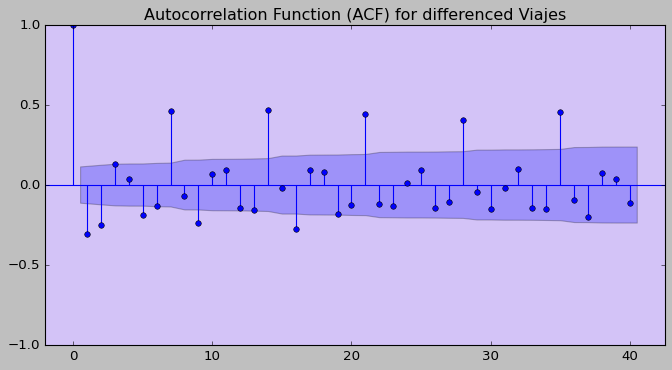

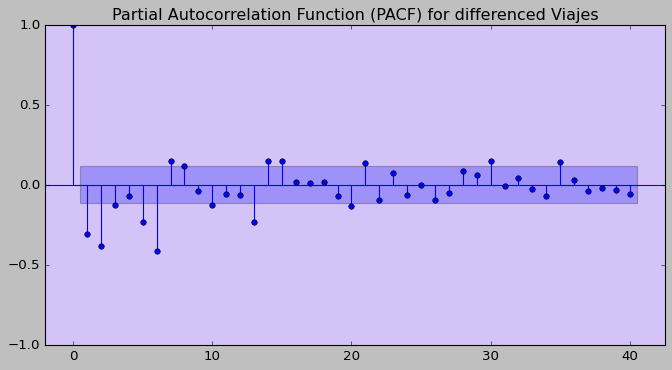

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming df_sarimax is the intended DataFrame from the previous cells in this section
# Plot ACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df_sarimax["Viajes"].diff().dropna(), lags=40, ax=ax)
plt.title('Autocorrelation Function (ACF) for differenced Viajes')
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df_sarimax["Viajes"].diff().dropna(), lags=40, ax=ax)
plt.title('Partial Autocorrelation Function (PACF) for differenced Viajes')
plt.show()

Estacionalidad (S) Observando la gráfica de ACF, se mantienen los picos claros y repetitivos cada 7 rezagos (lags 7, 14, 21, etc.). Esto confirma que el ciclo de los datos es semanal. S=7

Diferenciación (d y D)

d (Tendencia): Como se mencionó, la serie requiere estabilizar su media a lo largo del tiempo, por lo que se aplica una primera diferenciación para eliminar la tendencia. d=1.

D (Estacional): Los patrones semanales son fuertes y persistentes incluso después de quitar la tendencia general. Se aplica una diferenciación estacional para eliminar la repetitividad del ciclo de 7 días. D=1.

Parte No Estacional (p y q) Analizando los primeros rezagos en las gráficas ACF y PACF de la serie diferenciada:

p (Autoregresivo): Al incluir p=1, estamos asumiendo que el valor de "hoy" depende directamente del valor de "ayer" (ajustado por la diferencia). En la PACF, esto se justificaría si vemos un pico significativo en el Lag 1 antes de que la correlación decaiga.

q (Media Móvil): Al incluir q=1, indicamos que hay un término de error del periodo anterior que afecta al actual. En la ACF, esto se observa típicamente como un pico claro en el Lag 1.



Parte Estacional (P y Q)

P (Autoregresivo Estacional): Se ha establecido P=0, lo que implica que no estamos utilizando la relación directa con la semana anterior (Lag 7) desde el punto de vista autorregresivo.

Q (Media Móvil Estacional): Se utiliza Q=1. Esto es muy habitual cuando se aplica diferenciación estacional (D=1). Tras diferenciar, suele aparecer una autocorrelación negativa en el Lag 7 en la ACF. Un término MA estacional (SMA) corrige este "sobreajuste" de la diferenciación, suavizando el componente estacional.





In [ ]:
#SARIMAx

# Ejemplo de parámetros no estacionales (p, d, q)
my_order = (1, 1, 1)  # (AR=1, Diferenciación=1, MA=1)

# Ejemplo de parámetros estacionales (P, D, Q, m)
# Asumimos estacionalidad semanal (m=7)
my_seasonal_order = (0, 1, 1, 7) # (AR Estacional=1, Dif. Estacional=0, MA Estacional=1, Período=7)

# Dividir en entrenamiento y prueba (80% entrenamiento)
train_size = int(len(df_sarimax) * 0.8)
train_data = df_sarimax.iloc[:train_size]
test_data = df_sarimax.iloc[train_size:]

In [ ]:
# Ajuste del Modelo

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(
    train_data['Viajes'],
    order=my_order,
    seasonal_order=my_seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = model.fit(disp=False)

In [ ]:
# Resumen del Modelo
print("Resumen del Modelo SARIMAX")
print(results.summary())

Resumen del Modelo SARIMAX
                                     SARIMAX Results                                     
Dep. Variable:                            Viajes   No. Observations:                  240
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -1190.680
Date:                           Thu, 04 Dec 2025   AIC                           2389.360
Time:                                   21:52:38   BIC                           2402.989
Sample:                                        0   HQIC                          2394.862
                                           - 240                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1254      0.070      1.793      0.073      -0.012       0.262
ma.L1         -0

In [ ]:
# Predicción y Visualización


start_date = test_data.index[0]
end_date = test_data.index[-1]

predictions = results.get_prediction(start=start_date, end=end_date, dynamic=True)
predictions_mean = predictions.predicted_mean
pred_ci = predictions.conf_int(alpha=0.05) # Intervalo de confianza del 95%

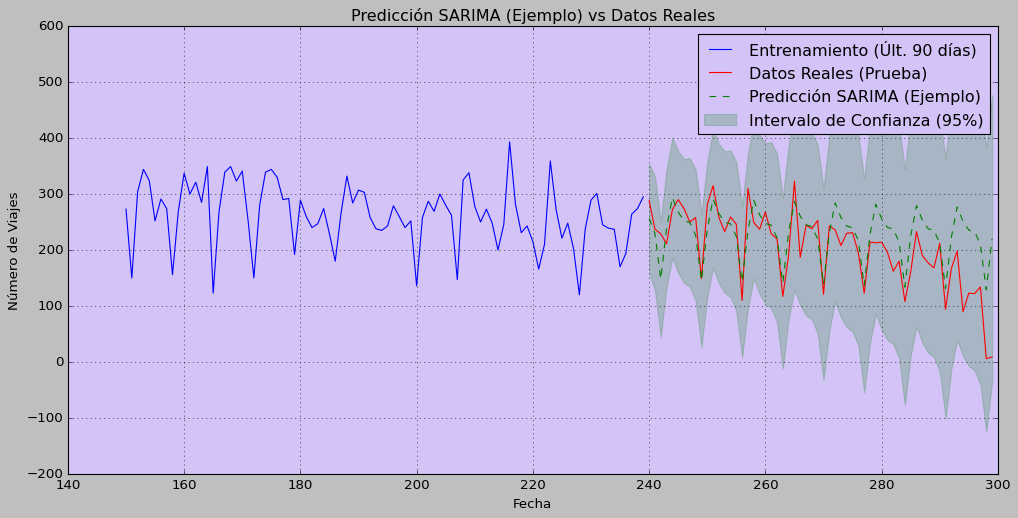

In [ ]:
# Gráfica de Resultados
plt.figure(figsize=(15, 7))
plt.plot(train_data['Viajes'].iloc[-90:], label='Entrenamiento (Últ. 90 días)', color='blue')
plt.plot(test_data['Viajes'], label='Datos Reales (Prueba)', color='red')
plt.plot(predictions_mean, label='Predicción SARIMA (Ejemplo)', color='green', linestyle='--')
plt.fill_between(
    pred_ci.index,
    pred_ci.iloc[:, 0],
    pred_ci.iloc[:, 1],
    color='green',
    alpha=0.2,
    label='Intervalo de Confianza (95%)'
)
plt.title('Predicción SARIMA (Ejemplo) vs Datos Reales')
plt.xlabel('Fecha')
plt.ylabel('Número de Viajes')
plt.legend()
plt.grid(True)

plot_filename = 'sarima_forecast_example.png'
plt.savefig(plot_filename)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Asegurar índices alineados
predictions_mean = predictions_mean.reindex(test_data.index)

#Selección de los primeros 28 días (en la gráfica se observa que el modelo es más ajustado a corto plazo)
real_28 = test_data['Viajes'].iloc[:28]
pred_28 = predictions_mean.iloc[:28]

#Métricas
mse_28 = mean_squared_error(real_28, pred_28)
rmse_28 = np.sqrt(mse_28)

print(f"MSE (primeros 28 días): {mse_28:.2f}")
print(f"RMSE (primeros 28 días): {rmse_28:.2f}")



MSE (primeros 28 días): 1180.85
RMSE (primeros 28 días): 34.36


Estos indicadores nos dicen que:

El modelo se está equivocando en promedio por ±34 viajes por día (RMSE).

El modelo comete errores  amplios (porque los errores se cuadran en MSE), cuyo impacto se observa en 1180.

####**Costo de Movimiento en Vacío**

*ESTE COSTO VARÍA EN CADA RUTA DEPENDIENDO DE LA DISTANCIA*

In [59]:
file_peajes = 'Peajes.csv'
file_mtto = 'BEPENSA.xlsx - Agosto_Cliente 1.csv'

In [60]:
# Distancia estimada de la ruta (BB PLAYA DEL CARMEN/BB CANCUN PLANTA)
# Varía dependiendo de la ruta
DISTANCIA_RUTA_KM = 70

In [61]:
#CÁLCULO DE COMBUSTIBLE (Rendimiento y Precio) ---
df_fuel = pd.read_excel('/content/Enero-febrero 2025 Combustible.xlsx')

In [62]:
df_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13895 entries, 0 to 13894
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Id Grupo Región                      13894 non-null  float64       
 1   Grupo Región                         13894 non-null  object        
 2   Id Región                            13894 non-null  float64       
 3   Región                               13894 non-null  object        
 4   Id Centro costos                     13894 non-null  object        
 5   Centro Costos                        13894 non-null  object        
 6   Num Tarjeta                          13894 non-null  float64       
 7   Id Vehículo                          13894 non-null  object        
 8   Descripción Vehículo                 13894 non-null  object        
 9   No Comprobante                       4328 non-null   float64       
 10  Fecha tran

In [63]:
# Limpieza de datos (quitar signos de $ y comas)
cols_num = ['Precio Unitario Merc', 'Recorrido', 'Cantidad Mercancía']
for col in cols_num:
    df_fuel[col] = df_fuel[col].astype(str).str.replace('$', '').str.replace(',', '')
    df_fuel[col] = pd.to_numeric(df_fuel[col], errors='coerce')

In [64]:
#filtar a region Merida CG
df_fuel = df_fuel[df_fuel['Región'] == 'MERIDA CG'].copy()

In [65]:
#filtro para que el Precio Unitario Merc no incluya 0
df_fuel = df_fuel[df_fuel['Precio Unitario Merc'] > 0].copy()

In [66]:
# Calcular Precio Promedio y Rendimiento de la Flota
precio_diesel_promedio = df_fuel['Precio Unitario Merc'].mean()
precio_diesel_promedio

np.float64(25.83771929824561)

Precio promedio de diésel en Región Mérida CG: $25.837

In [67]:
#filtar el df_filtrado (que incluye solo viajes de Walmart) a Fecha Salida entre Enero y Febrero. VIAJES
df = listado_viajes.copy()
#Filtrado de Datos: Cliente "WAL MART" y Sucursal "MERIDA"
# str.contains permite encontrar "NUEVA WAL MART", "WAL MART DC", etc.
filtro_cliente = df['Nombre Cliente'].str.contains('WAL MART', case=False, na=False)
filtro_sucursal = df['Sucursal'].str.contains('MERIDA', case=False, na=False)

df_filtrado = df[filtro_cliente & filtro_sucursal].copy()

df_filtrado['Fecha Salida'] = pd.to_datetime(df_filtrado['Fecha Salida'])
df_filtrado = df_filtrado[(df_filtrado['Fecha Salida'].dt.month == 1) | (df_filtrado['Fecha Salida'].dt.month == 2)]

In [68]:
#¿Qué Tractocamión se usaron en estos viajes?
unidades = df_filtrado['Tractocamión'].unique()

In [69]:
telemetria = pd.read_excel('/content/Telemetría.xlsx', sheet_name='Report')
#Usando Telemetría filtrar los datos de Período 13 y 14 de los Tractocamiones (Nombre) de unidades
telemetria = telemetria[telemetria['Nombre'].isin(unidades)]
telemetria = telemetria[telemetria['Periodo'].isin([13, 14])]
print('First 5 rows of the Telemetria DataFrame:')
display(telemetria.head())

First 5 rows of the Telemetria DataFrame:


,Nombre,Periodo,Fecha de inicio del periodo,Fecha de fin del periodo,Duración de conducción,Porcentaje de tiempo en conducción,Distancia,Tiempo en ralentí,Porcentaje de tiempo en ralentí,Velocidad máxima
4626,T458,13,2025-01-01,2025-01-31 23:59:59,7 days 00:48:43.440000,23,7286.853027,2 days 08:43:10,25,105
4641,T472,13,2025-01-01,2025-01-31 23:59:59,10 days 12:17:26.548000,34,11666.653320,3 days 14:07:21,25,131
4643,T474,13,2025-01-01,2025-01-31 23:59:59,9 days 13:13:28.878000,31,10824.357422,3 days 21:31:59,29,105
4702,T543,13,2025-01-01,2025-01-31 23:59:59,10 days 00:09:41.960000,32,12273.725586,3 days 17:57:40,27,127
4711,T553,13,2025-01-01,2025-01-31 23:59:59,6 days 01:53:35.740000,20,7490.721680,2 days 13:04:19,30,127


In [70]:
#suma de Distancia
total_km = telemetria['Distancia'].sum()
total_km

np.float64(279512.1094970703)

In [71]:
total_litros = df_fuel['Cantidad Mercancía'].sum()
total_litros

np.float64(66381.78)

In [72]:
rendimiento_real = total_km / total_litros
rendimiento_real

np.float64(4.210675120448267)

In [73]:
rendimiento_uso = 2.8  #proporcionado por profesor Gustavo Santana

2.8 RENDIMIENTO ESTIMADO

In [74]:
costo_diesel_km = precio_diesel_promedio / rendimiento_uso
costo_diesel_km

np.float64(9.227756892230575)

In [75]:
print(f"--- ANÁLISIS DE COMBUSTIBLE ---")
print(f"Precio Diesel Promedio: ${precio_diesel_promedio:.2f} / Litro")
print(f"Rendimiento Real Flota: {rendimiento_uso:.2f} Km/L")
print(f"Costo Diesel por Km: ${costo_diesel_km:.2f}")

--- ANÁLISIS DE COMBUSTIBLE ---
Precio Diesel Promedio: $25.84 / Litro
Rendimiento Real Flota: 2.80 Km/L
Costo Diesel por Km: $9.23


In [76]:
#CÁLCULO DE PEAJES (Ruta Específica) ---
df_peajes = pd.read_csv('/content/Peajes.csv')

In [77]:
casetas_ruta = ['SAN MARTIN', 'SEYBA PLAYA']
df_ruta = df_peajes[df_peajes['Caseta'].isin(casetas_ruta)].copy()

In [78]:
# Limpiar importes
df_ruta['Importe'] = df_ruta['Importe'].astype(str).str.replace('$', '').str.replace(',', '')
df_ruta['Importe'] = pd.to_numeric(df_ruta['Importe'], errors='coerce')

In [79]:
# Calcular costo promedio por cruce (para una ida)
costo_peajes_total = df_ruta.groupby('Caseta')['Importe'].mean().sum()

In [80]:

print(f"\n--- ANÁLISIS DE PEAJES (Ruta BB PLAYA DEL CARMEN/BB CANCUN PLANTA) ---")
print(f"Casetas identificadas: {casetas_ruta}")
print(f"Costo Total Peajes (Est): ${costo_peajes_total:.2f}")


--- ANÁLISIS DE PEAJES (Ruta BB PLAYA DEL CARMEN/BB CANCUN PLANTA) ---
Casetas identificadas: ['SAN MARTIN', 'SEYBA PLAYA']
Costo Total Peajes (Est): $554.82


In [81]:
costo_mtto_km = 5.00 #valor promedio obtenido de hacer la suma de km recorridos por mes (Telemetría) sobre lo
#que se dividió el gasto de mantenimiento automotriz declarado en Tablero_PL

print(f"\n--- COSTO VARIABLE MARGINAL ---")
print(f"Costo Mantenimiento/Llantas: ${costo_mtto_km:.2f} / Km")


--- COSTO VARIABLE MARGINAL ---
Costo Mantenimiento/Llantas: $5.00 / Km


In [82]:

#RESULTADO FINAL: C_VACIO ---
costo_km_total = costo_diesel_km + costo_mtto_km
costo_movimiento_vacio = (DISTANCIA_RUTA_KM * costo_km_total) + costo_peajes_total


print(f"COSTO TOTAL MOVIMIENTO EN VACÍO ($C_vacio$): ${costo_movimiento_vacio:,.2f}")
print()
print(f"Desglose: Combustible (${(DISTANCIA_RUTA_KM * costo_diesel_km):,.2f}) + Mtto (${(DISTANCIA_RUTA_KM * costo_mtto_km):,.2f}) + Peajes (${costo_peajes_total:,.2f})")

COSTO TOTAL MOVIMIENTO EN VACÍO ($C_vacio$): $1,550.76

Desglose: Combustible ($645.94) + Mtto ($350.00) + Peajes ($554.82)


COSTO TOTAL MOVIMIENTO EN VACÍO ($C_vacio$):  $1,550.76

####**Costo Diario de Camión Parado**

In [52]:
file_pl = '/content/Tablero_PL_2024-09_2025-09_v2.xlsx'
df_pl = pd.read_excel(file_pl)

In [53]:
# Definimos los rubros que componen el "Costo de Propiedad" (Fijos)

rubros_fijos = ['Salarios', 'Mantenimiento Automotriz', 'Depreciación', 'Arrendamiento']

In [54]:
ultimo_mes = df_pl['Date'].max() #Para delimitar el cálculo a los datos más recientes

In [55]:
# Filtramos y sumamos
df_costos_fijos = df_pl[
    (df_pl['Rubro'].isin(rubros_fijos)) &
    (df_pl['Date'] == ultimo_mes)
]

total_costos_fijos_mes = df_costos_fijos['Real'].sum()

print(f"--- ANÁLISIS DE COSTOS FIJOS (Mes: {ultimo_mes}) ---")
print(f"Rubros incluidos: {rubros_fijos}")
print(f"Total Costos Fijos Flota: ${total_costos_fijos_mes:,.2f}")

--- ANÁLISIS DE COSTOS FIJOS (Mes: 2025-09) ---
Rubros incluidos: ['Salarios', 'Mantenimiento Automotriz', 'Depreciación', 'Arrendamiento']
Total Costos Fijos Flota: $44,465,276.00


In [56]:
unidades_activas = telemetria["Nombre"].unique()
unidades_activas = len(unidades_activas)
print(f"Total Unidades Activas: {unidades_activas}")

Total Unidades Activas: 376


In [57]:
# CÁLCULO FINAL: C_PARADO
if unidades_activas > 0:
    costo_mensual_unidad = total_costos_fijos_mes / unidades_activas
    costo_diario_parado = costo_mensual_unidad / 30
else:
    costo_diario_parado = 0


print(f"COSTO DIARIO 'CAMIÓN PARADO' ($C_parado$): ${costo_diario_parado:,.2f}")

COSTO DIARIO 'CAMIÓN PARADO' ($C_parado$): $3,941.96


In [83]:
dias_maximos_espera = costo_movimiento_vacio / costo_diario_parado
dias_maximos_espera
#redondear
dias_maximos_espera = np.ceil(dias_maximos_espera)
dias_maximos_espera

np.float64(1.0)

####**Movimiento en vacío por ruta**

In [ ]:
df = pd.read_excel("/content/BEPENSA.xlsx", sheet_name= "Reporte Listado Viajes Ene-Oc")

In [ ]:
#filtrar los registros donde Peso Kgs sea nulo y Total dea 0
df = df[(df['Peso Kgs'].isnull()) & (df['Total'] == 0)]

In [ ]:
#conteo de registros por Ruta
df["Ruta"].value_counts()

,count
Ruta,
WM CEDIS CHALCO/WM BODEGA REMOTA CHALCO,912
WM BODEGA REMOTA CHALCO/WM CEDIS CHALCO,590
WM CEDIS CHALCO/FABRICA DE JABON LA CORONA,338
WM CEDIS CHALCO/ WM CEDIS MEGAPARK,320
WM CEDIS MID TEYA/AURRERA MONTEJO,296
...,...
CEDIS JDV CONVENTO/PROPIMEX AGUASCALIENTES,1
CEDIS JDV CONVENTO/PROPIMEX CELAYA,1
"MEGA EMPACK, TLAJOMULCO/MEGA EMPACK, MERIDA",1


####**CPK**

In [ ]:
telemetria

,Nombre,Periodo,Fecha de inicio del periodo,Fecha de fin del periodo,Duración de conducción,Porcentaje de tiempo en conducción,Distancia,Tiempo en ralentí,Porcentaje de tiempo en ralentí,Velocidad máxima
0,M7,1,2024-01-01,2024-01-31 23:59:59,0 days 00:00:00,0,0.000000,0 days 00:00:00,0,0
1,M8,1,2024-01-01,2024-01-31 23:59:59,6 days 21:56:19.127000,22,865.979980,9 days 08:27:07,57,42
2,M9,1,2024-01-01,2024-01-31 23:59:59,0 days 00:00:00,0,0.000000,0 days 00:00:00,0,0
3,T263,1,2024-01-01,2024-01-31 23:59:59,0 days 00:00:00,0,0.000000,0 days 00:00:00,0,0
4,T290,1,2024-01-01,2024-01-31 23:59:59,3 days 13:15:46.545000,11,1211.847656,0 days 11:01:57,11,92
...,...,...,...,...,...,...,...,...,...,...
7596,T804,20,2025-08-01,2025-08-31 23:59:59,10 days 17:31:37.094000,35,10557.172852,12 days 22:05:07,55,103
7597,T805,20,2025-08-01,2025-08-31 23:59:59,8 days 00:21:57.902000,26,11274.587891,5 days 13:23:57,41,96
7598,T806,20,2025-08-01,2025-08-31 23:59:59,9 days 19:57:52.485000,32,13055.664062,9 days 22:05:30,50,90
7599,T807,20,2025-08-01,2025-08-31 23:59:59,9 days 19:32:30.655000,32,10473.829102,13 days 16:15:21,58,92


In [ ]:
#del df de telemetría, hacer el conteo de Distancia recorrida por mes

telemetria['Mes'] = telemetria['Fecha de inicio del periodo'].dt.to_period('M')
distancia_por_mes = telemetria.groupby('Mes')['Distancia'].sum()
distancia_por_mes

,Distancia
Mes,
2024-01,2.105096e+06
2024-02,2.161072e+06
2024-03,2.452108e+06
2024-04,2.417968e+06
2024-05,2.357978e+06
2024-06,2.327533e+06
2024-07,2.315069e+06
2024-08,2.147350e+06
2024-09,2.009874e+06


In [ ]:
tablero= pd.read_excel("/content/Tablero_PL_2024-09_2025-09_v2.xlsx", sheet_name = "Long PL Meses" )

In [ ]:
#seleccionar solo los datos de Rubro == "2.Costo"
tablero = tablero[tablero["Rubro"] == "2. Costo"]

#renombrar Date a Mes
tablero = tablero.rename(columns={"Date": "Mes"})

#aplicar formato Period[M] a la columna de Mes
tablero['Mes'] = pd.to_datetime(tablero['Mes']).dt.to_period('M')

In [ ]:
#Establecer la columna de Date de tablero como índice
tablero.set_index("Mes", inplace=True)
#seleccionar solo la columna de Rubro y Real
tablero = tablero[["Rubro", "Real"]]

In [ ]:
#hacer merge de tablero y telemetria por fecha
tablero = tablero.merge(distancia_por_mes, left_index=True, right_index=True, how="left")

In [ ]:
tablero

,Rubro,Real,Distancia
Mes,,,
2024-09,2. Costo,75818078,2.009874e+06
2024-10,2. Costo,89355018,2.117929e+06
2024-11,2. Costo,89876527,2.043824e+06
2024-12,2. Costo,71177938,1.995941e+06
2025-01,2. Costo,102219031,1.890033e+06
2025-02,2. Costo,79435136,1.743988e+06
2025-03,2. Costo,92519805,1.960066e+06
2025-04,2. Costo,73142146,1.951275e+06
2025-05,2. Costo,70121047,2.043805e+06


In [ ]:
#agregar una nueva columna que divida Real entre Distancia
tablero["CPK"] = tablero["Real"] / tablero["Distancia"]
tablero

,Rubro,Real,Distancia,CPK
Mes,,,,
2024-09,2. Costo,75818078,2.009874e+06,37.722807
2024-10,2. Costo,89355018,2.117929e+06,42.189802
2024-11,2. Costo,89876527,2.043824e+06,43.974681
2024-12,2. Costo,71177938,1.995941e+06,35.661337
2025-01,2. Costo,102219031,1.890033e+06,54.083199
2025-02,2. Costo,79435136,1.743988e+06,45.547996
2025-03,2. Costo,92519805,1.960066e+06,47.202404
2025-04,2. Costo,73142146,1.951275e+06,37.484291
2025-05,2. Costo,70121047,2.043805e+06,34.309064


In [ ]:
#eliminar nulos en CPK
tablero.dropna(inplace=True)
tablero

,Rubro,Real,Distancia,CPK
Mes,,,,
2024-09,2. Costo,75818078,2.009874e+06,37.722807
2024-10,2. Costo,89355018,2.117929e+06,42.189802
2024-11,2. Costo,89876527,2.043824e+06,43.974681
2024-12,2. Costo,71177938,1.995941e+06,35.661337
2025-01,2. Costo,102219031,1.890033e+06,54.083199
2025-02,2. Costo,79435136,1.743988e+06,45.547996
2025-03,2. Costo,92519805,1.960066e+06,47.202404
2025-04,2. Costo,73142146,1.951275e+06,37.484291
2025-05,2. Costo,70121047,2.043805e+06,34.309064


In [ ]:
CPK_promedio = tablero["CPK"].mean()
CPK_promedio

np.float64(41.76410621847881)

####**Nivel de Servicio**

In [ ]:

METAS_POR_CLUSTER = {
    "Cluster 2 (CRÍTICO)":      98,
    "Cluster 1 (MODERADO)":     90,
    "Cluster 0 (ALTO)": 95,
    "Sin Clasificar / Otro":    98.0
}




In [ ]:
def get_service_level_function(route_name):

    cluster_name = mapa_clusters.get(route_name, "Sin Clasificar / Otro")

    service_level = METAS_POR_CLUSTER.get(cluster_name, 98.0)

    return service_level



In [ ]:
get_service_level_function("BB PLAYA DEL CARMEN/BB CANCUN PLANTA")

98